## Imports and Set Up

In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
from sklearn.impute import SimpleImputer, KNNImputer

In [376]:
warnings.filterwarnings('ignore', category=FutureWarning) 

sns.set(style='whitegrid')
%matplotlib inline

## EDA and Data Processing

In [377]:
file_path = '/Users/naliniramanathan/projects/ml_course/final_project/kaggle/input/cmi-piu'

data_description = pd.read_csv(f'{file_path}/data_dictionary.csv')
train_data = pd.read_csv(f'{file_path}/train.csv')
test_data = pd.read_csv(f'{file_path}/test.csv')

print("Train Data:")
display(train_data.head())
print("Test Data:")
display(test_data.head())
print("Data Description:")
display(data_description.head())

Train Data:


id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  ...  PCIAT-PCIAT_18  PCIAT-PCIAT_19  PCIAT-PCIAT_20  \
0             50.8  ...             4.0             2.0             4.0   
1             46.0  ...             0.0             0.0             0.0   
2             75.6  ...             2.0             1.0             1.0   
3             81.6  ...             3.0             4.0             1.0   
4              NaN  ...             NaN             NaN             NaN   

   PCIAT-PCIAT_Total SDS-Season  SDS-SDS_Total_Raw  SDS-SDS_Total_T  \
0               55.0        NaN                NaN              NaN   
1                0.0       Fall               46.0             64.0   
2               28.0       Fall               38.0             54.0   
3               44.0     Summer               31.0             45.0   
4                NaN        NaN                NaN              NaN   

   PreInt_EduHx-Season PreInt_EduHx-computerinternet_hoursday  sii  
0                 Fall                                    3.0  2.0  
1               Summer                                    0.0  0.0  
2               Summer                                    2.0  0.0  
3               Winter                                    0.0  1.0  
4                  NaN                                    NaN  NaN  

[5 rows x 82 columns]

Test Data:


id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  ...  BIA-BIA_TBW  PAQ_A-Season  PAQ_A-PAQ_A_Total  \
0             50.8  ...      32.6909           NaN                NaN   
1             46.0  ...      27.0552           NaN                NaN   
2             75.6  ...          NaN           NaN                NaN   
3             81.6  ...      45.9966           NaN                NaN   
4              NaN  ...          NaN        Summer               1.04   

   PAQ_C-Season PAQ_C-PAQ_C_Total  SDS-Season  SDS-SDS_Total_Raw  \
0           NaN               NaN         NaN                NaN   
1          Fall             2.340        Fall               46.0   
2        Summer             2.170        Fall               38.0   
3        Winter             2.451      Summer               31.0   
4           NaN               NaN         NaN                NaN   

   SDS-SDS_Total_T PreInt_EduHx-Season  PreInt_EduHx-computerinternet_hoursday  
0              NaN                Fall                                     3.0  
1             64.0              Summer                                     0.0  
2             54.0              Summer                                     2.0  
3             45.0              Winter                                     0.0  
4              NaN                 NaN                                     NaN  

[5 rows x 59 columns]

Data Description:


Instrument                      Field  \
0                          Identifier                         id   
1                        Demographics  Basic_Demos-Enroll_Season   
2                        Demographics            Basic_Demos-Age   
3                        Demographics            Basic_Demos-Sex   
4  Children's Global Assessment Scale                CGAS-Season   

               Description             Type                        Values  \
0         Participant's ID              str                           NaN   
1     Season of enrollment              str  Spring, Summer, Fall, Winter   
2       Age of participant            float                           NaN   
3       Sex of participant  categorical int                           0,1   
4  Season of participation              str  Spring, Summer, Fall, Winter   

       Value Labels  
0               NaN  
1               NaN  
2               NaN  
3  0=Male, 1=Female  
4               NaN

In [378]:
train_features = set(train_data.columns)
test_features = set(test_data.columns)
exclusive_train_columns = sorted(list(train_features - test_features))
display(data_description[data_description['Field'].isin(exclusive_train_columns)])
print(f'Count of columns related to target but absent in test set: {len(exclusive_train_columns) - 1}')

Instrument              Field  \
54  Parent-Child Internet Addiction Test       PCIAT-Season   
55  Parent-Child Internet Addiction Test     PCIAT-PCIAT_01   
56  Parent-Child Internet Addiction Test     PCIAT-PCIAT_02   
57  Parent-Child Internet Addiction Test     PCIAT-PCIAT_03   
58  Parent-Child Internet Addiction Test     PCIAT-PCIAT_04   
59  Parent-Child Internet Addiction Test     PCIAT-PCIAT_05   
60  Parent-Child Internet Addiction Test     PCIAT-PCIAT_06   
61  Parent-Child Internet Addiction Test     PCIAT-PCIAT_07   
62  Parent-Child Internet Addiction Test     PCIAT-PCIAT_08   
63  Parent-Child Internet Addiction Test     PCIAT-PCIAT_09   
64  Parent-Child Internet Addiction Test     PCIAT-PCIAT_10   
65  Parent-Child Internet Addiction Test     PCIAT-PCIAT_11   
66  Parent-Child Internet Addiction Test     PCIAT-PCIAT_12   
67  Parent-Child Internet Addiction Test     PCIAT-PCIAT_13   
68  Parent-Child Internet Addiction Test     PCIAT-PCIAT_14   
69  Parent-Child Internet Addiction Test     PCIAT-PCIAT_15   
70  Parent-Child Internet Addiction Test     PCIAT-PCIAT_16   
71  Parent-Child Internet Addiction Test     PCIAT-PCIAT_17   
72  Parent-Child Internet Addiction Test     PCIAT-PCIAT_18   
73  Parent-Child Internet Addiction Test     PCIAT-PCIAT_19   
74  Parent-Child Internet Addiction Test     PCIAT-PCIAT_20   
75  Parent-Child Internet Addiction Test  PCIAT-PCIAT_Total   

                                          Description             Type  \
54                            Season of participation              str   
55  How often does your child disobey time limits ...  categorical int   
56  How often does your child neglect household ch...  categorical int   
57  How often does your child prefer to spend time...  categorical int   
58  How often does your child form new relationshi...  categorical int   
59  How often do you complain about the amount of ...  categorical int   
60  How often do your child's grades suffer becaus...  categorical int   
61  How often does your child check his or her e-m...  categorical int   
62  How often does your child seem withdrawn from ...  categorical int   
63  How often does your child become defensive or ...  categorical int   
64  How often have you caught your child sneaking ...  categorical int   
65  How often does your child spend time along in ...  categorical int   
66  How often does your child receive strange phon...  categorical int   
67  How often does your child snap, yell, or act a...  categorical int   
68  How often does your child seem more tired and ...  categorical int   
69  How often does your child seem preoccupied wit...  categorical int   
70  How often does your child throw tantrums with ...  categorical int   
71  How often does your child choose to spend time...  categorical int   
72  How often does your child become angry or bell...  categorical int   
73  How often does your child choose to spend more...  categorical int   
74  How often does your child feel depressed, mood...  categorical int   
75                                        Total Score              int   

                          Values  \
54  Spring, Summer, Fall, Winter   
55                   0,1,2,3,4,5   
56                   0,1,2,3,4,5   
57                   0,1,2,3,4,5   
58                   0,1,2,3,4,5   
59                   0,1,2,3,4,5   
60                   0,1,2,3,4,5   
61                   0,1,2,3,4,5   
62                   0,1,2,3,4,5   
63                   0,1,2,3,4,5   
64                   0,1,2,3,4,5   
65                   0,1,2,3,4,5   
66                   0,1,2,3,4,5   
67                   0,1,2,3,4,5   
68                   0,1,2,3,4,5   
69                   0,1,2,3,4,5   
70                   0,1,2,3,4,5   
71                   0,1,2,3,4,5   
72                   0,1,2,3,4,5   
73                   0,1,2,3,4,5   
74                   0,1,2,3,4,5   
75                           NaN   

                                         Value L

Count of columns related to target but absent in test set: 22


In [379]:
sii_related_data = train_data[train_data['sii'].notna()][exclusive_train_columns]
sii_related_data[sii_related_data.isna().any(axis=1)].head().style.applymap(
    lambda val: 'background-color: #ff0000' if pd.isna(val) else ''
)

In [380]:
pciat_items = [f'PCIAT-PCIAT_{str(i+1).zfill(2)}' for i in range(20)]
recalculated_total = sii_related_data[pciat_items].sum(axis=1, skipna=True)
(recalculated_total == sii_related_data['PCIAT-PCIAT_Total']).all()

True

In [381]:
def adjust_sii_score(row):
    if pd.isna(row['PCIAT-PCIAT_Total']):
        return np.nan
    max_potential_score = row['PCIAT-PCIAT_Total'] + row[pciat_items].isna().sum() * 5
    if row['PCIAT-PCIAT_Total'] <= 30 and max_potential_score <= 30:
        return 0
    elif 31 <= row['PCIAT-PCIAT_Total'] <= 49 and max_potential_score <= 49:
        return 1
    elif 50 <= row['PCIAT-PCIAT_Total'] <= 79 and max_potential_score <= 79:
        return 2
    elif row['PCIAT-PCIAT_Total'] >= 80 and max_potential_score >= 80:
        return 3
    return np.nan

train_data['revised_sii'] = train_data.apply(adjust_sii_score, axis=1)

In [382]:
discrepancy_rows = train_data[
    (train_data['revised_sii'] != train_data['sii']) & train_data['sii'].notna()
]
discrepancy_rows[pciat_items + ['PCIAT-PCIAT_Total', 'sii', 'revised_sii']].style.applymap(
    lambda cell: 'background-color: #ff0000' if pd.isna(cell) else ''
)

In [383]:
# Drop rows where 'revised_sii' is NaN
train_data = train_data.dropna(subset=['revised_sii'])

# Map and categorize 'sii'
train_data['sii'] = train_data['revised_sii']
train_data['total_full_responses'] = train_data['PCIAT-PCIAT_Total'].where(
    train_data[pciat_items].notna().all(axis=1), np.nan
)

# Removed these for now since it's less necessary for training

# sii_labels = {0: '0 (None)', 1: '1 (Mild)', 2: '2 (Moderate)', 3: '3 (Severe)'}
# train_data['sii'] = train_data['sii'].map(sii_labels).fillna('Missing')

# sii_levels = ['0 (None)', '1 (Mild)', '2 (Moderate)', '3 (Severe)']
# train_data['sii'] = pd.Categorical(train_data['sii'], categories=sii_levels, ordered=True)

# Drop the 'revised_sii' column after processing
train_data.drop(columns='id', inplace=True)
train_data.drop(columns='revised_sii', inplace=True)

### Distributions

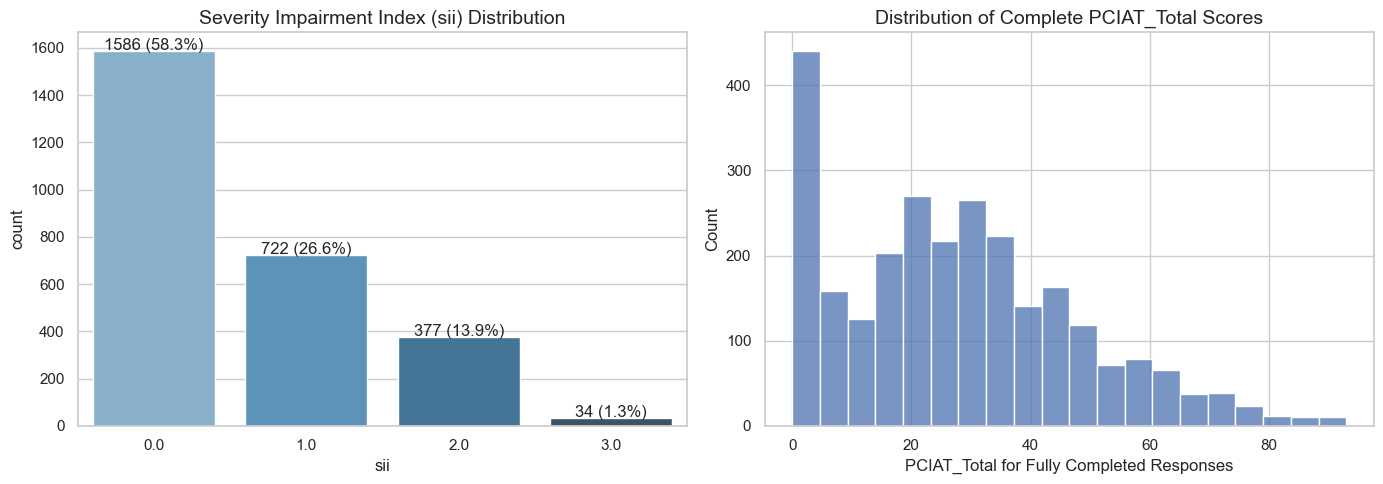

In [384]:
sii_distribution = train_data['sii'].value_counts().reset_index()
sii_distribution.columns = ['sii', 'count']
total_counts = sii_distribution['count'].sum()
sii_distribution['percentage'] = (sii_distribution['count'] / total_counts) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot of sii distribution
sns.barplot(x='sii', y='count', data=sii_distribution, palette='Blues_d', ax=axes[0])
axes[0].set_title('Severity Impairment Index (sii) Distribution', fontsize=14)
for bar in axes[0].patches:
    height = bar.get_height()
    pct = sii_distribution.loc[sii_distribution['count'] == height, 'percentage'].values[0]
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        height + 5, f'{int(height)} ({pct:.1f}%)',
        ha="center", fontsize=12
    )

# Histogram of PCIAT_Total for complete responses
sns.histplot(train_data['total_full_responses'].dropna(), bins=20, ax=axes[1])
axes[1].set_title('Distribution of Complete PCIAT_Total Scores', fontsize=14)
axes[1].set_xlabel('PCIAT_Total for Fully Completed Responses')

plt.tight_layout()
plt.show()

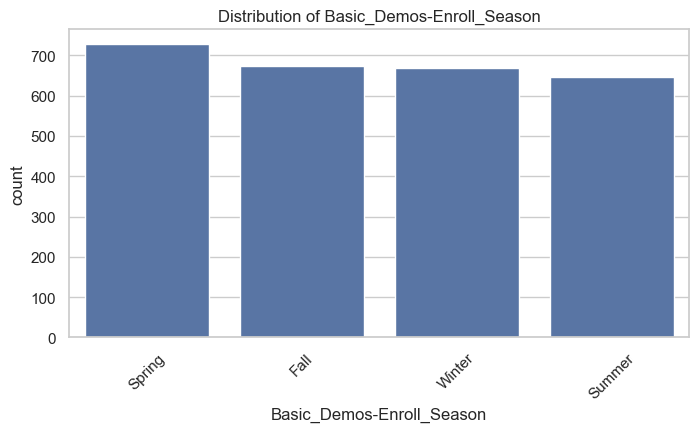

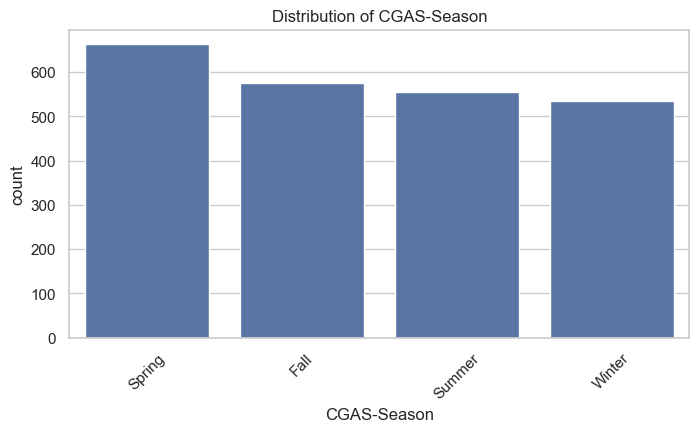

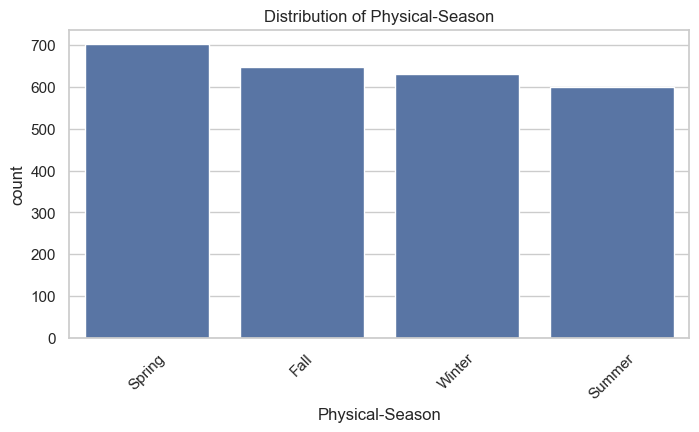

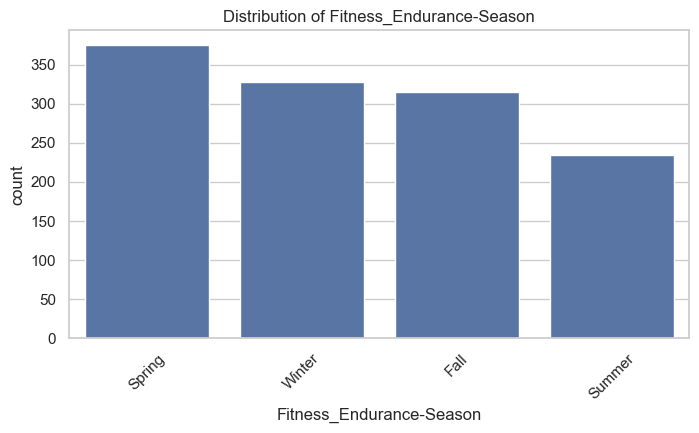

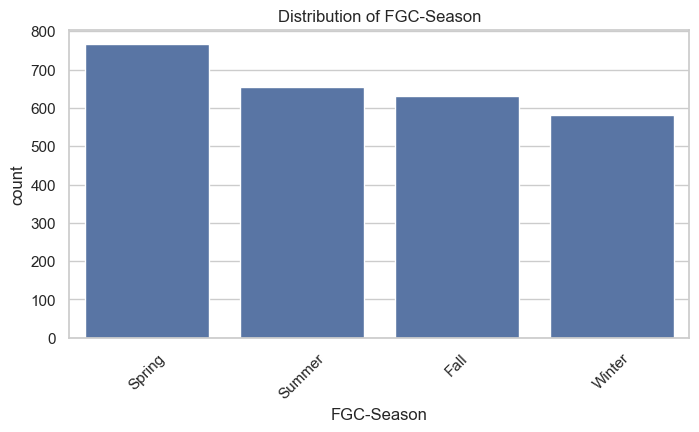

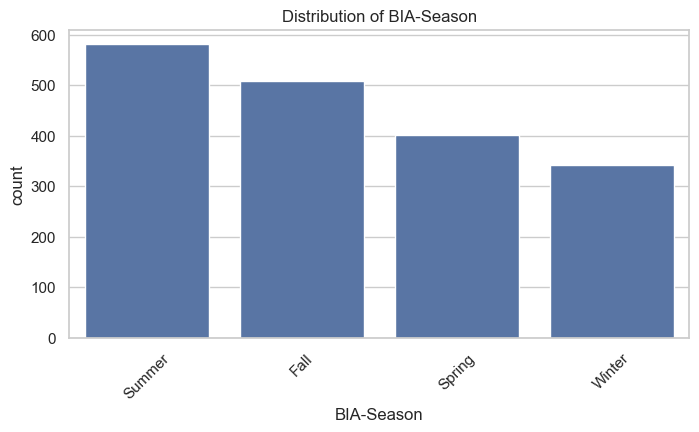

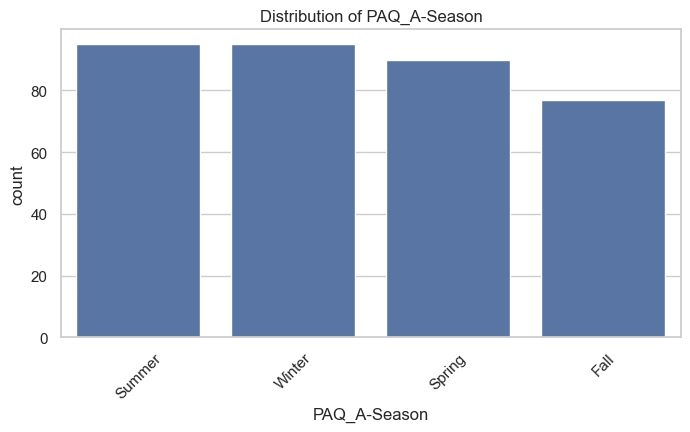

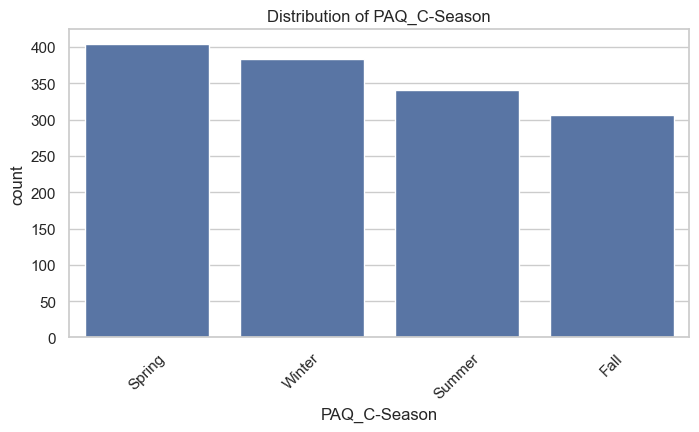

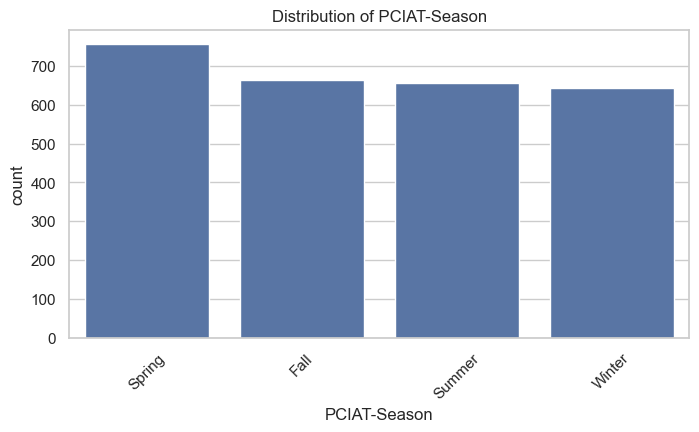

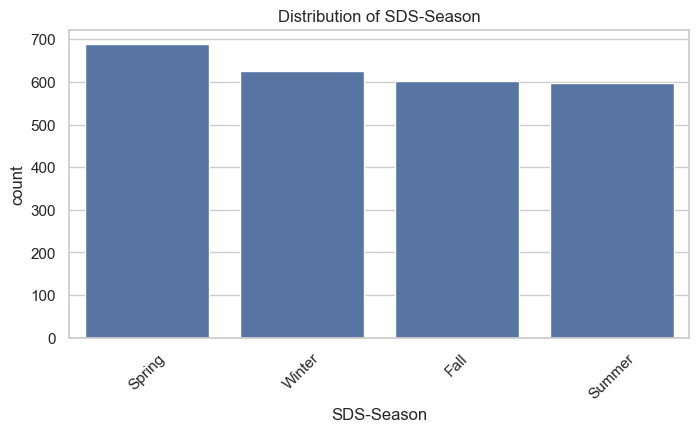

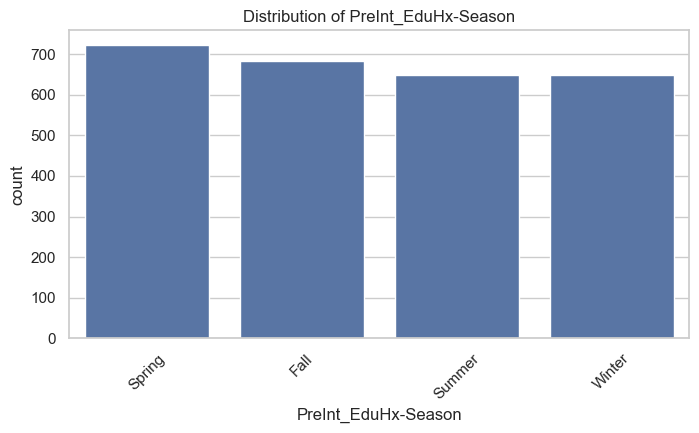

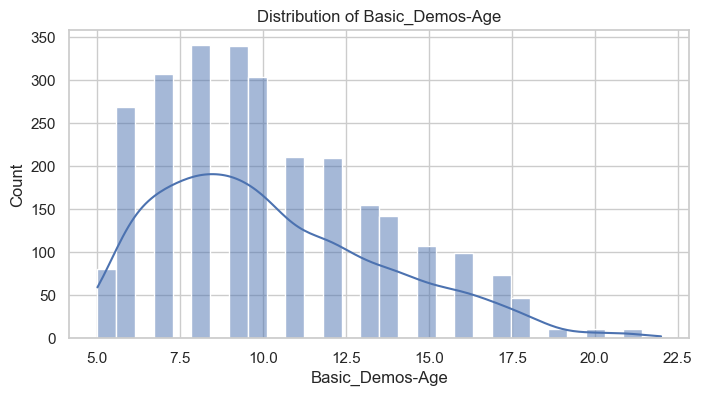

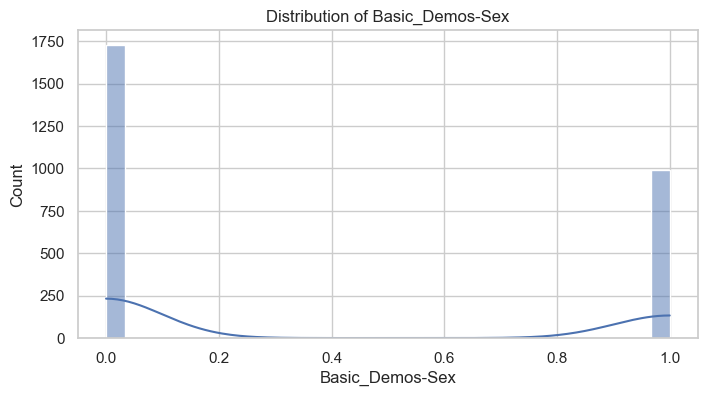

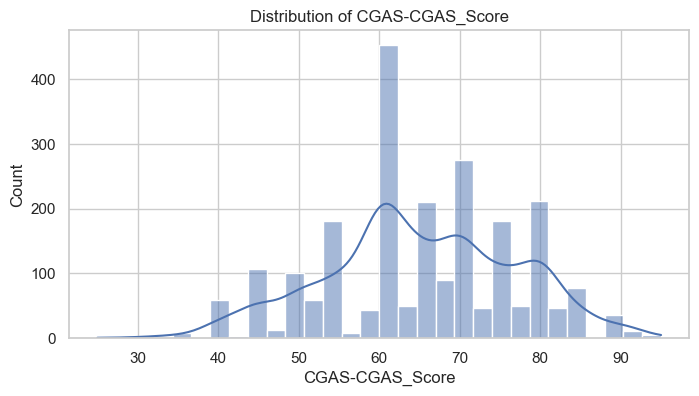

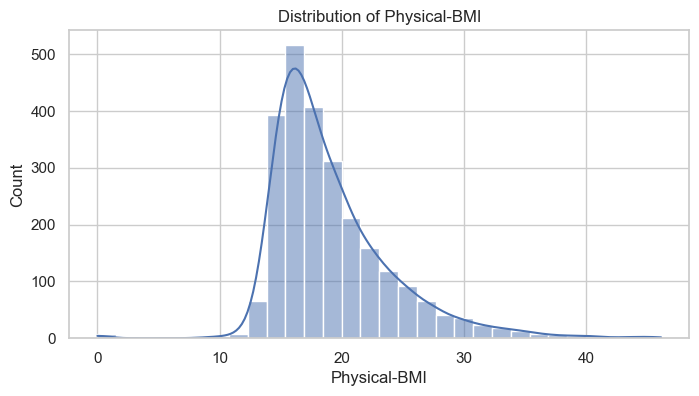

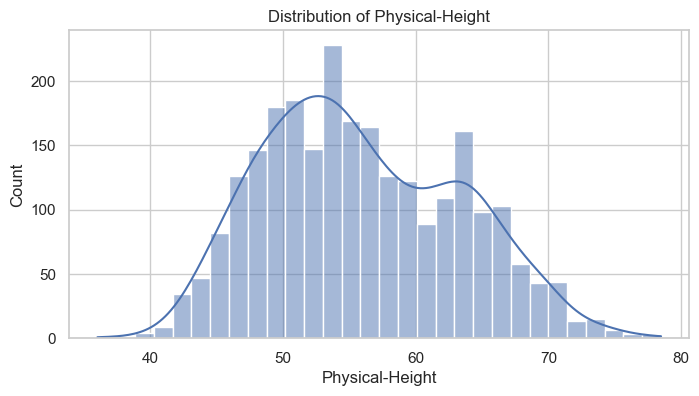

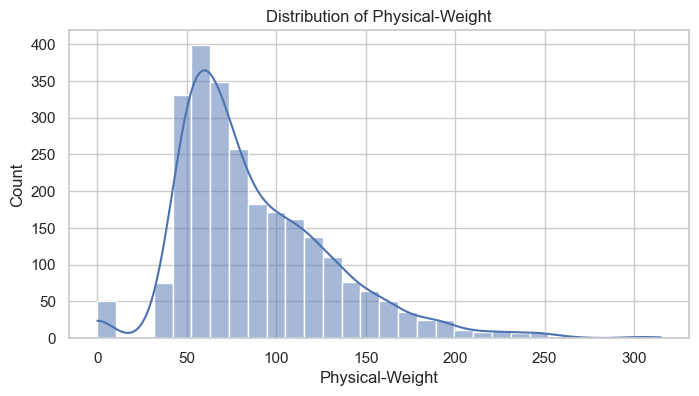

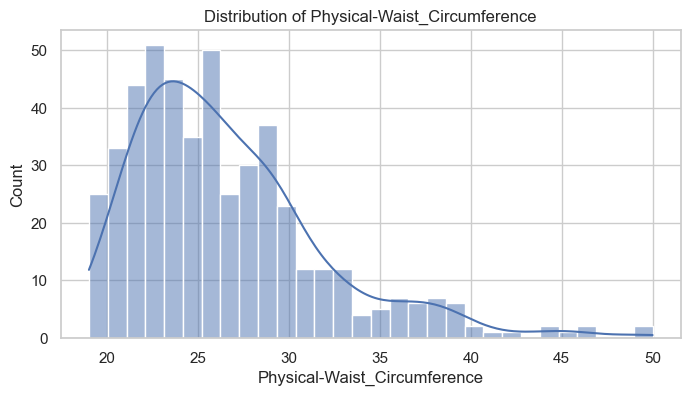

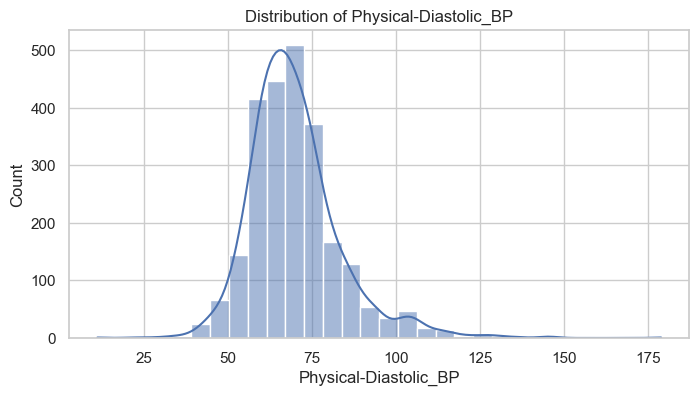

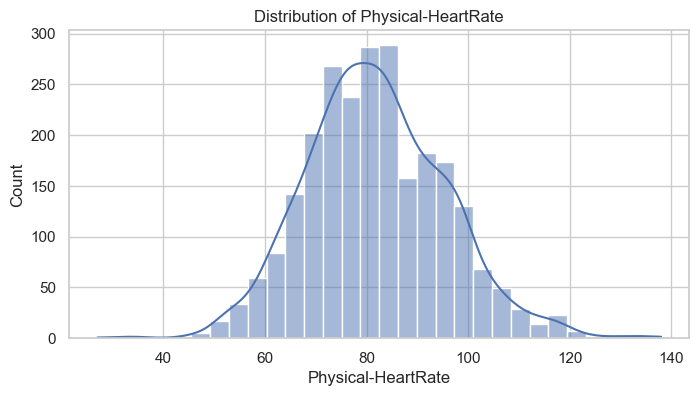

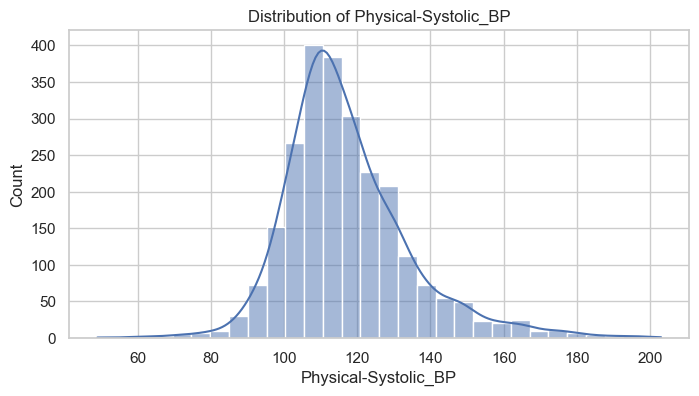

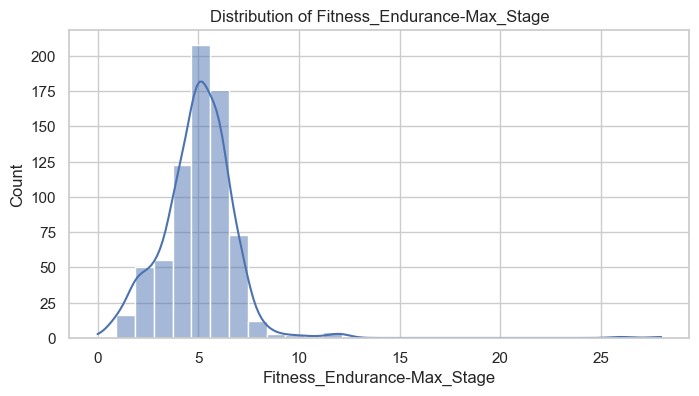

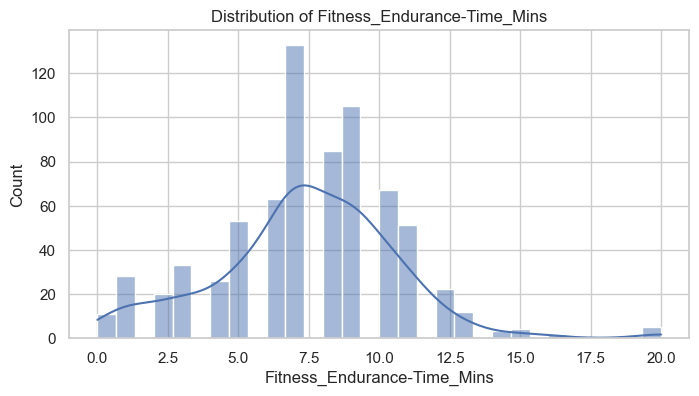

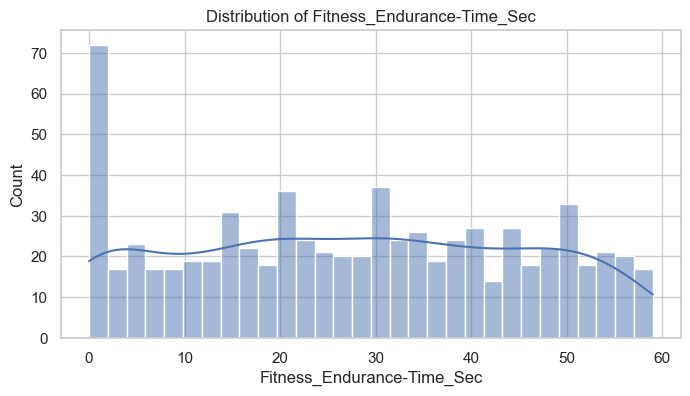

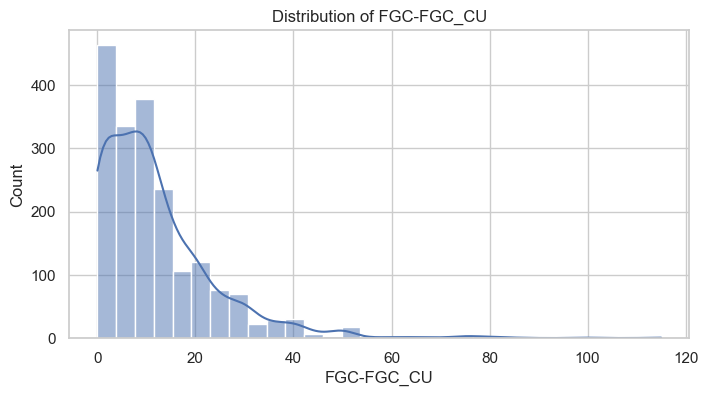

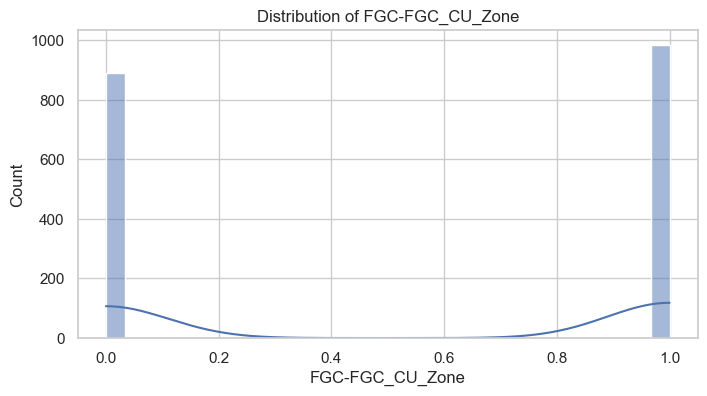

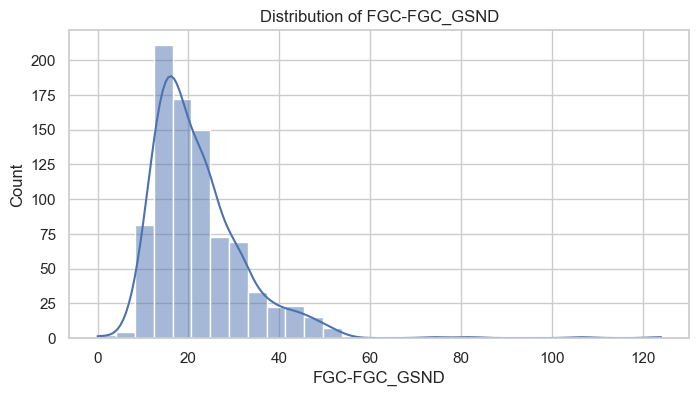

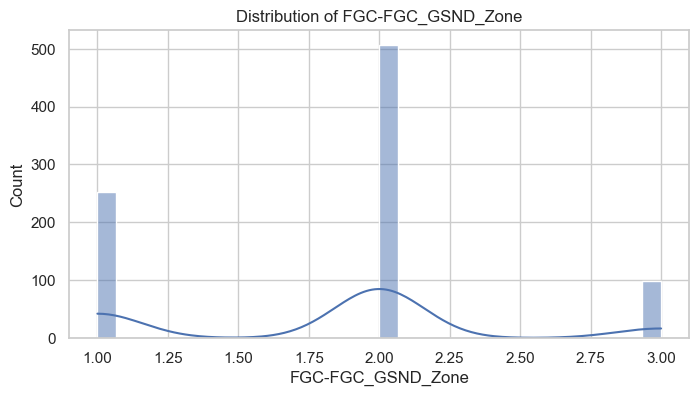

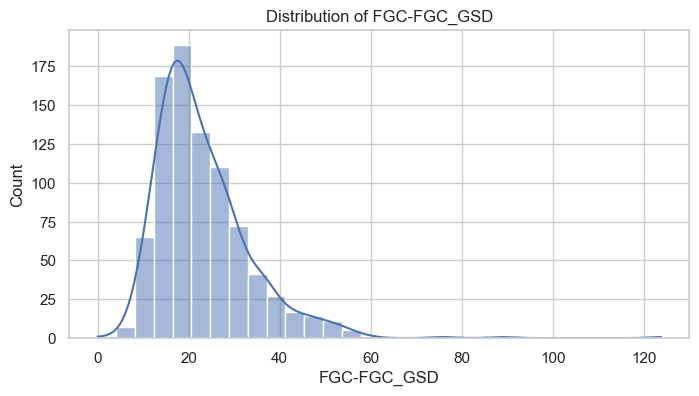

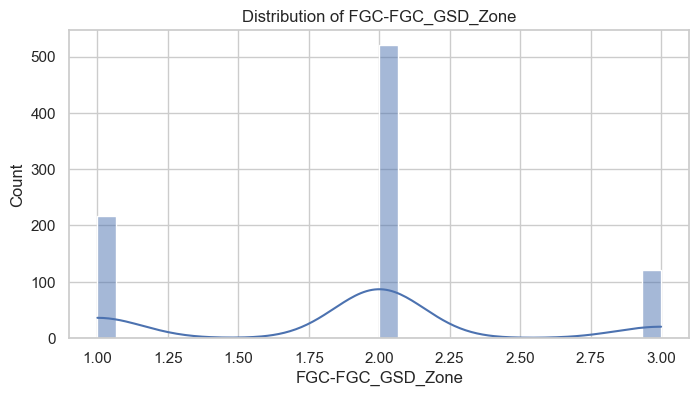

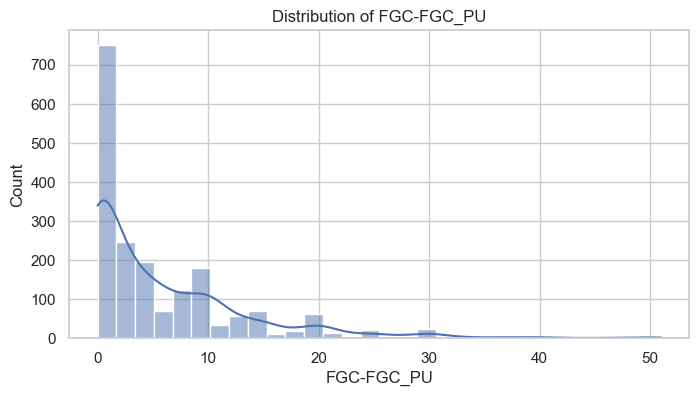

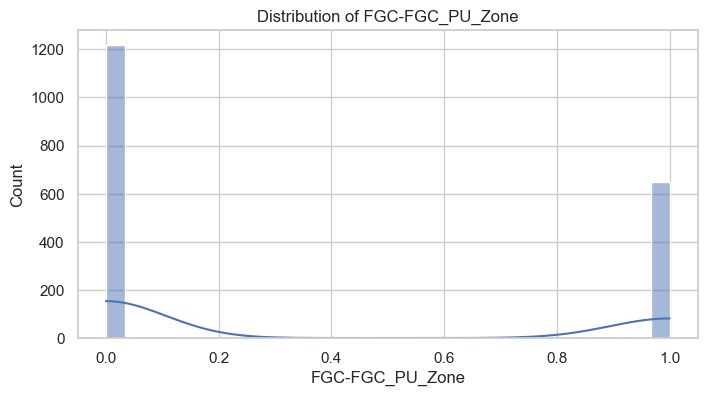

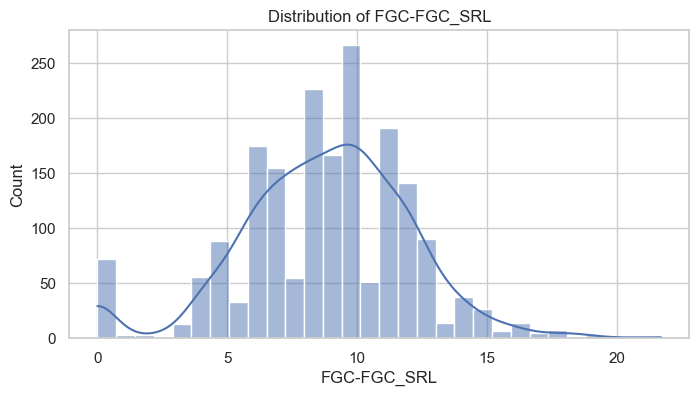

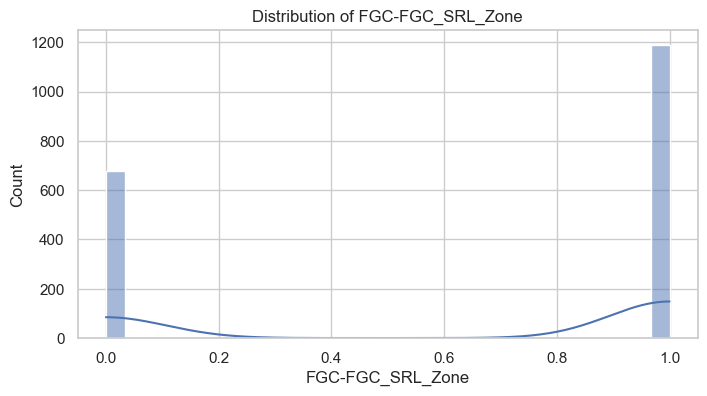

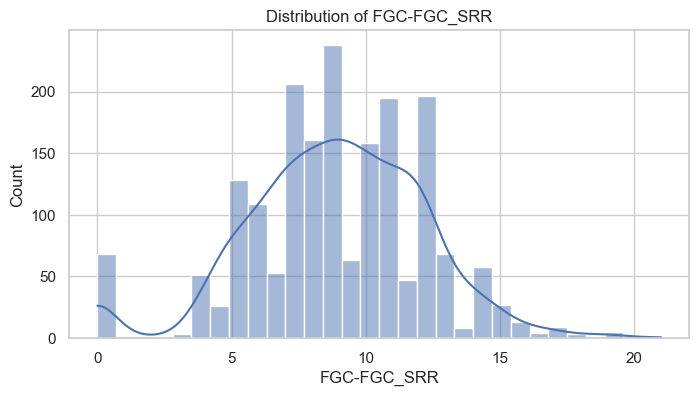

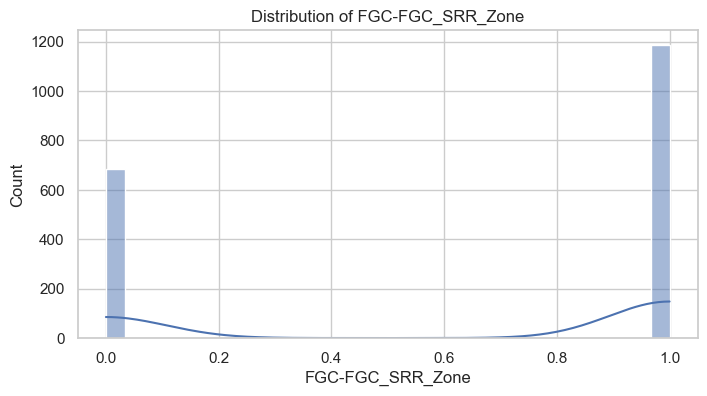

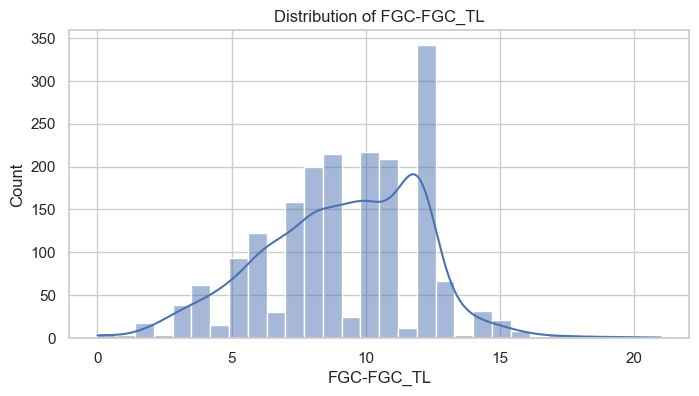

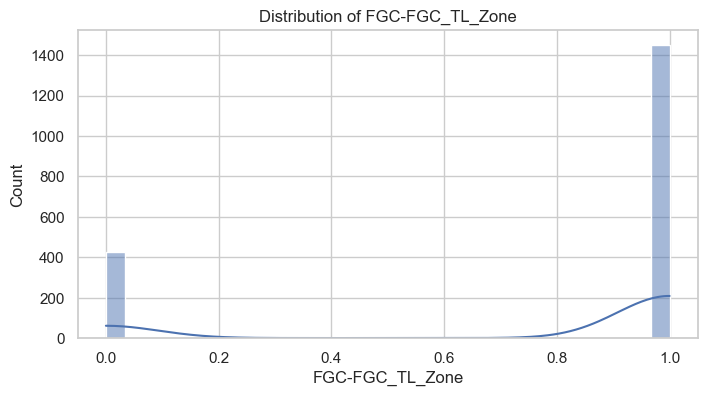

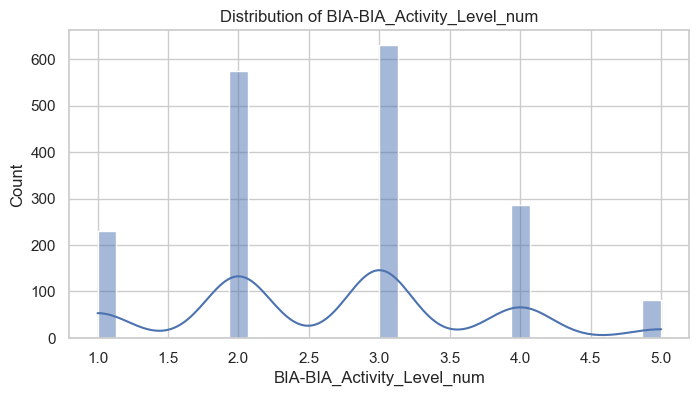

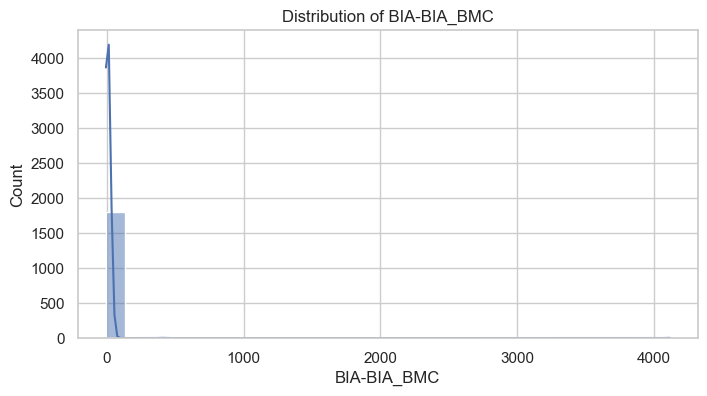

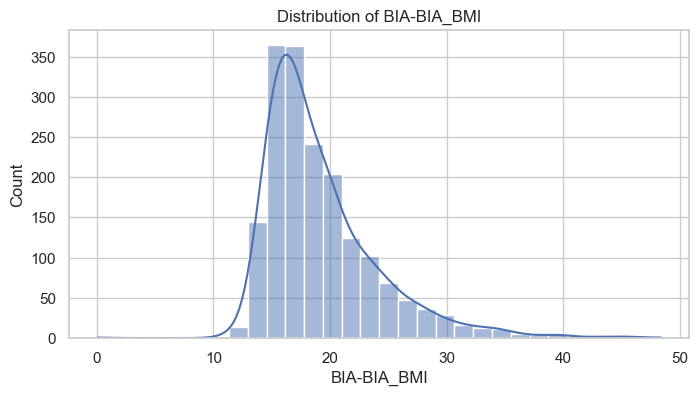

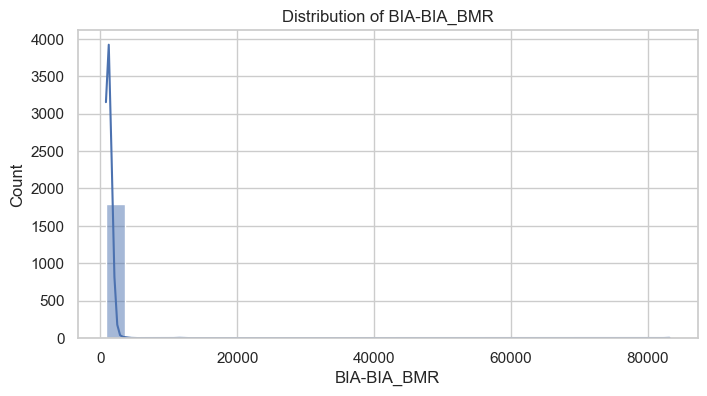

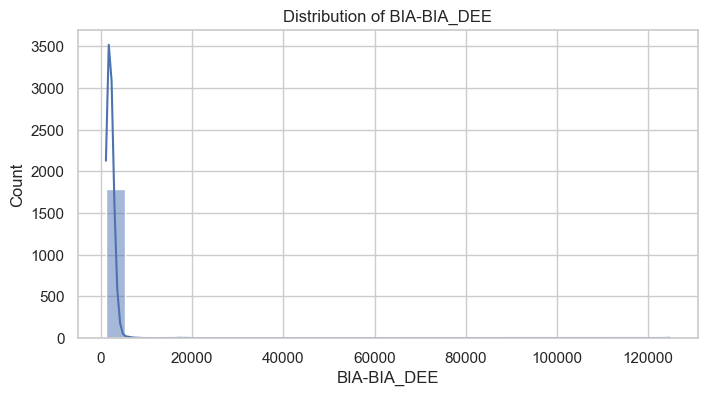

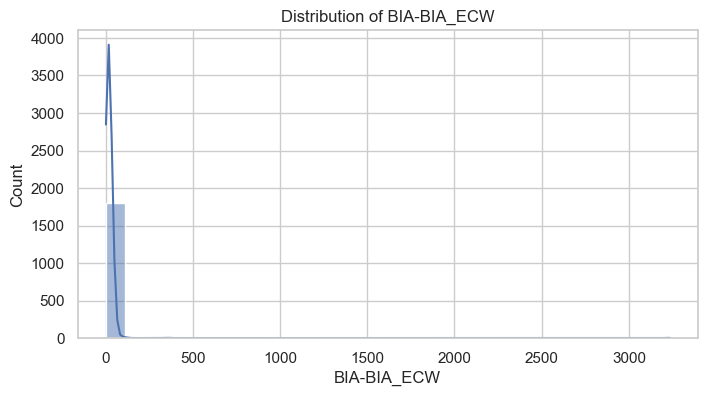

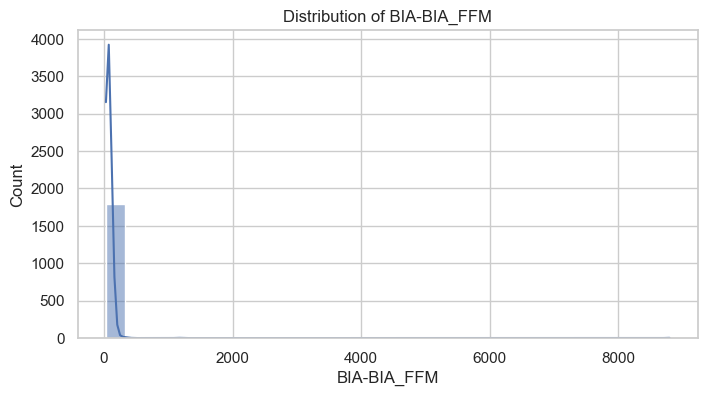

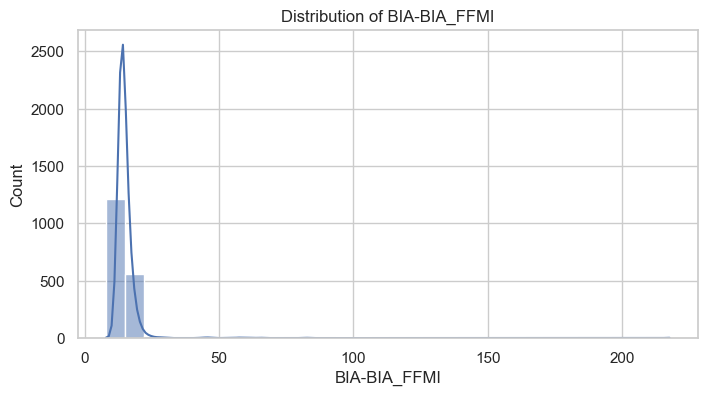

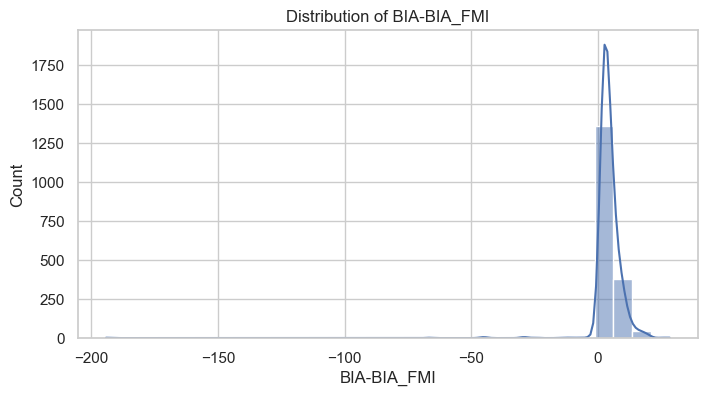

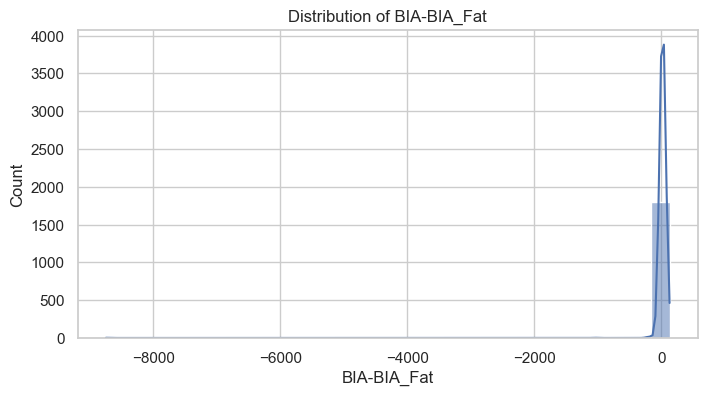

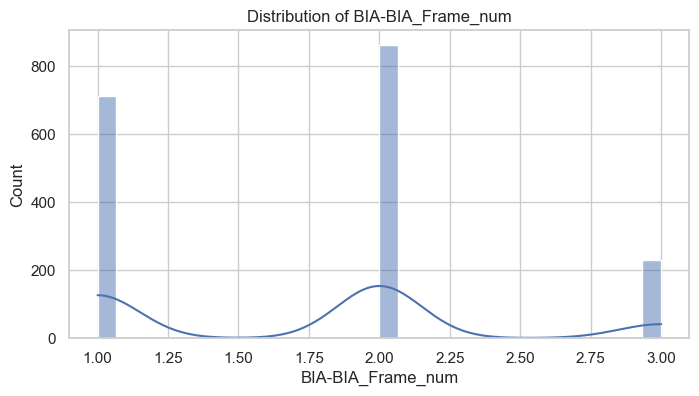

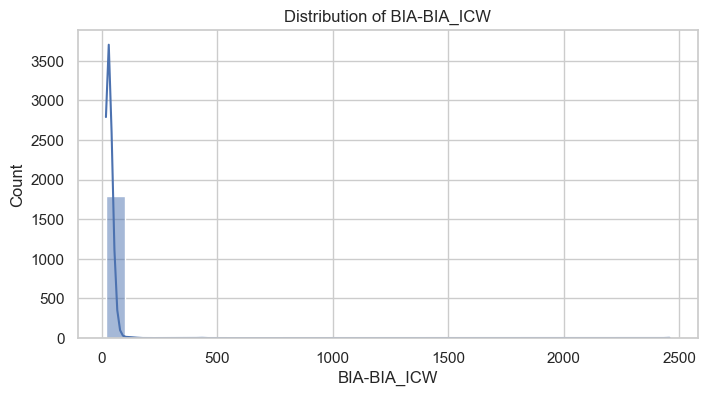

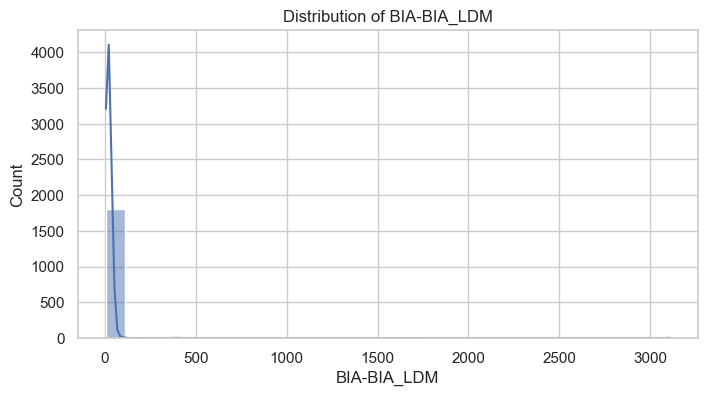

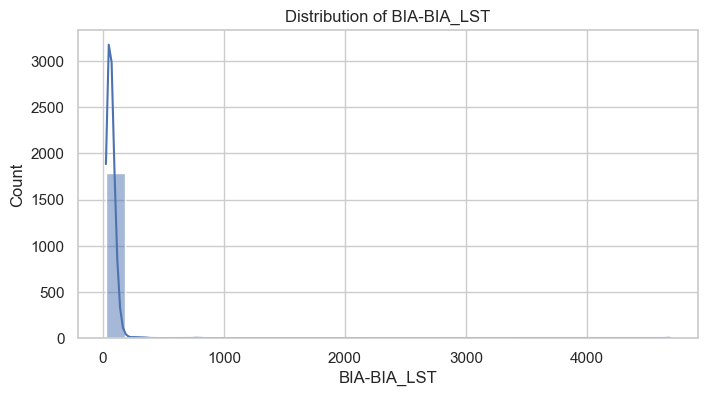

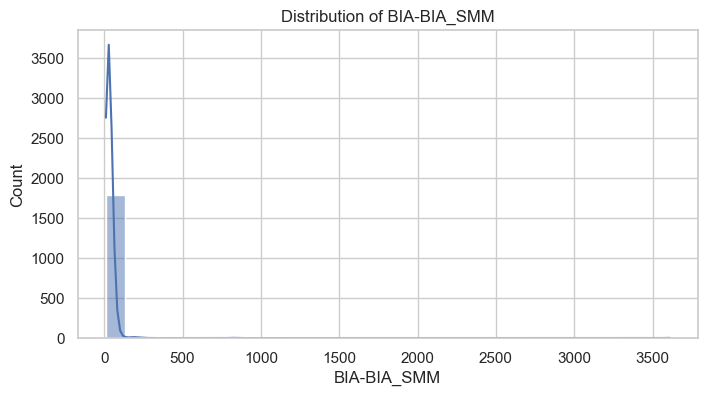

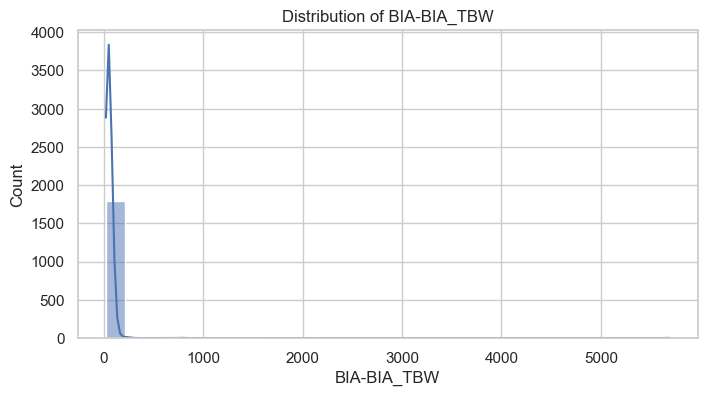

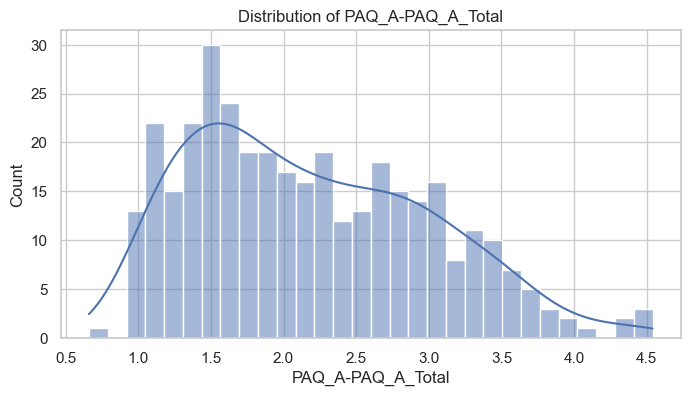

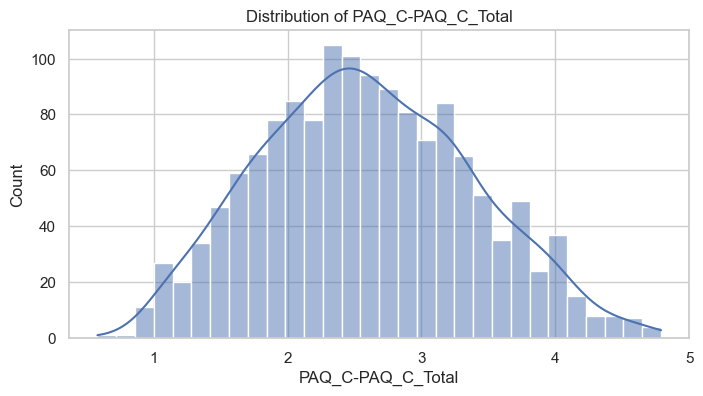

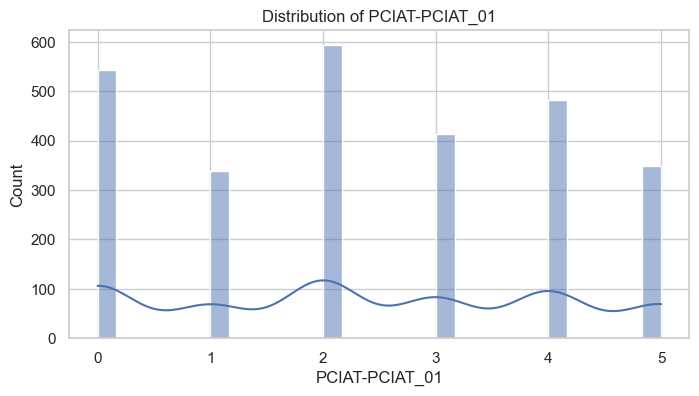

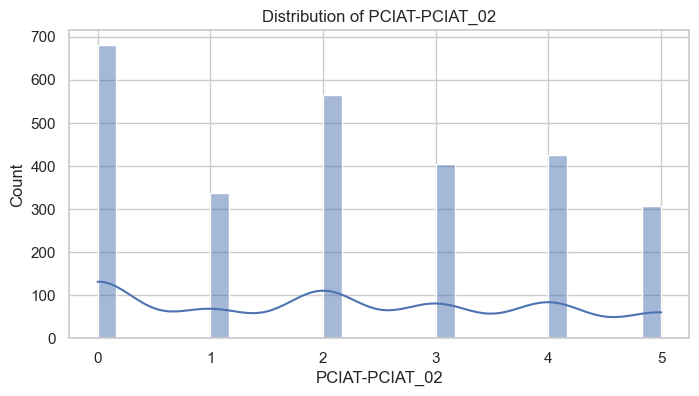

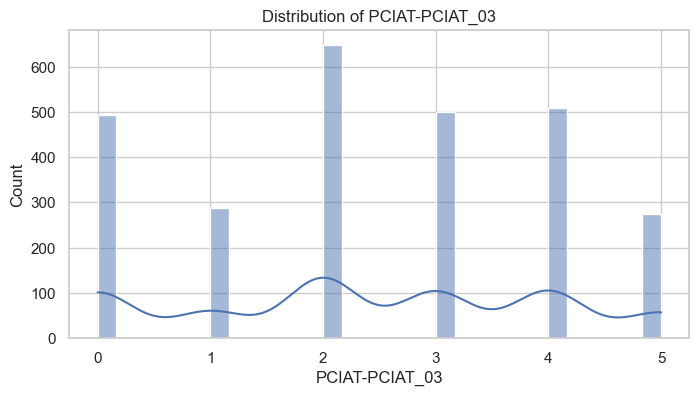

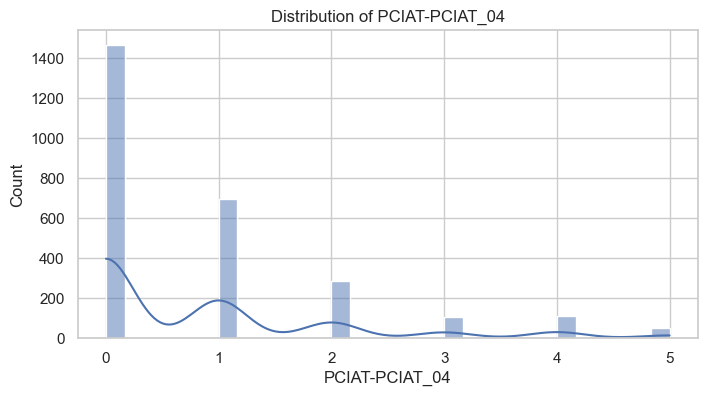

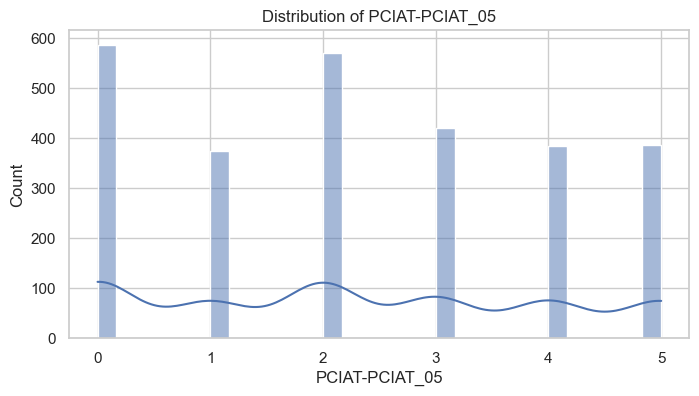

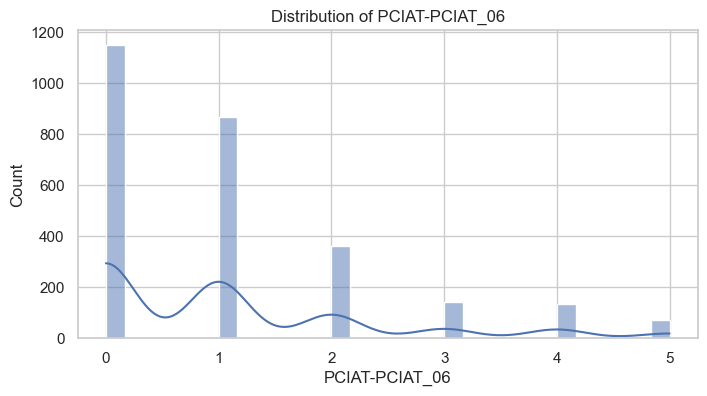

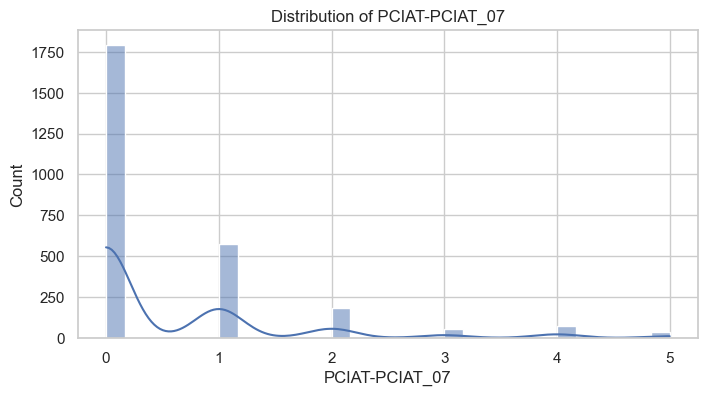

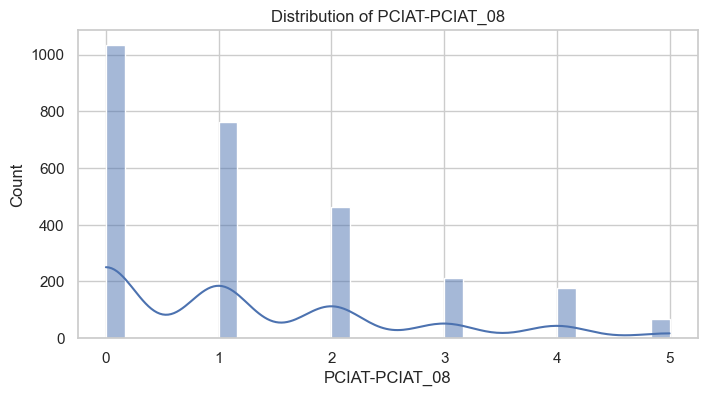

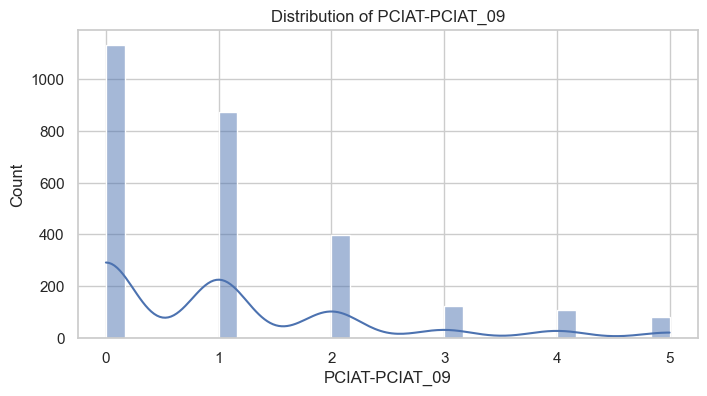

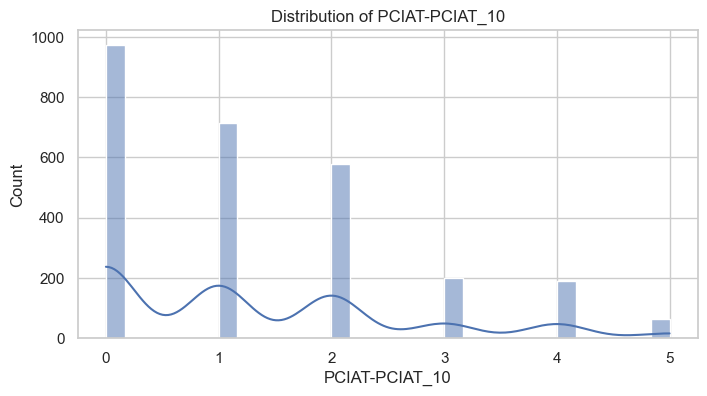

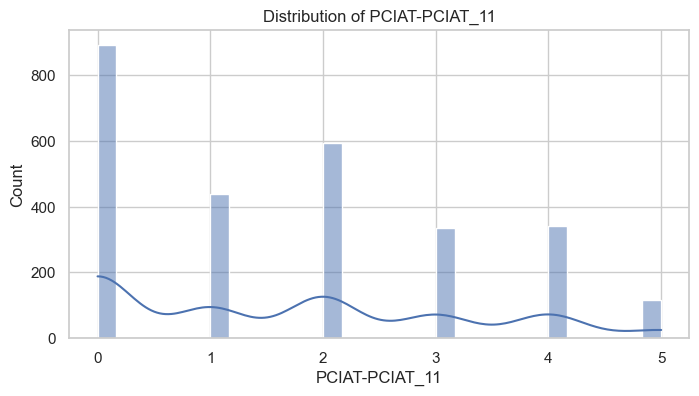

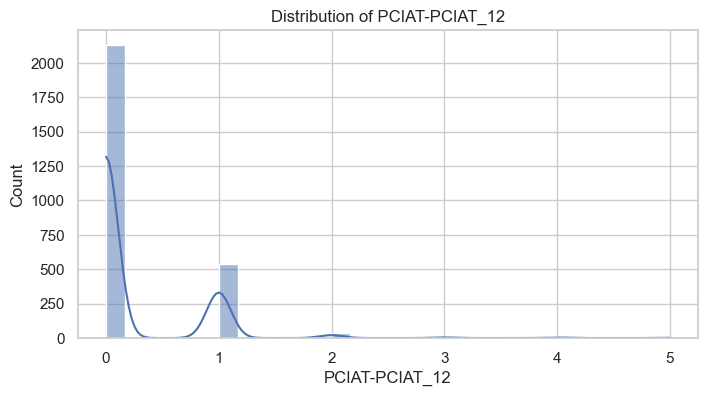

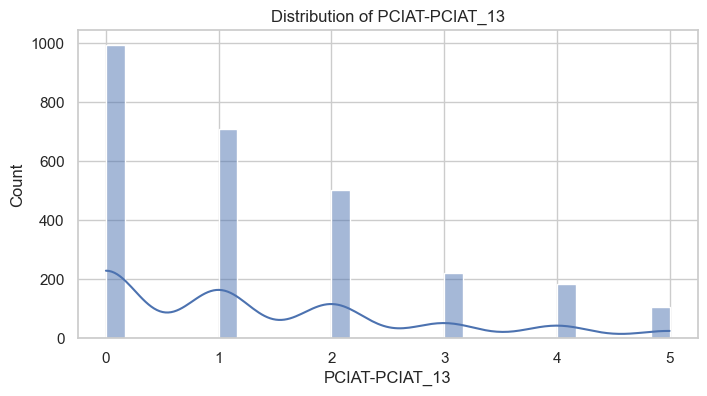

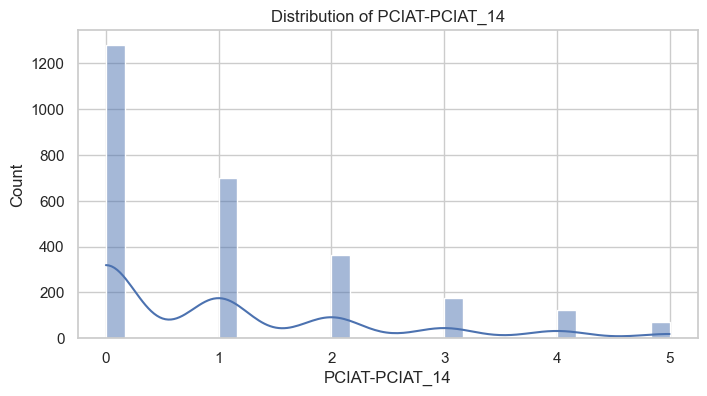

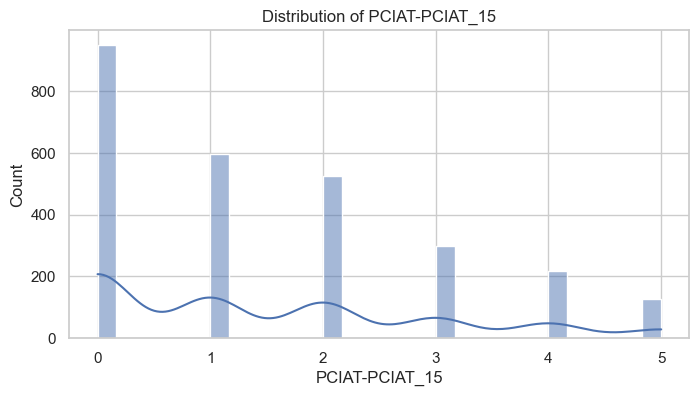

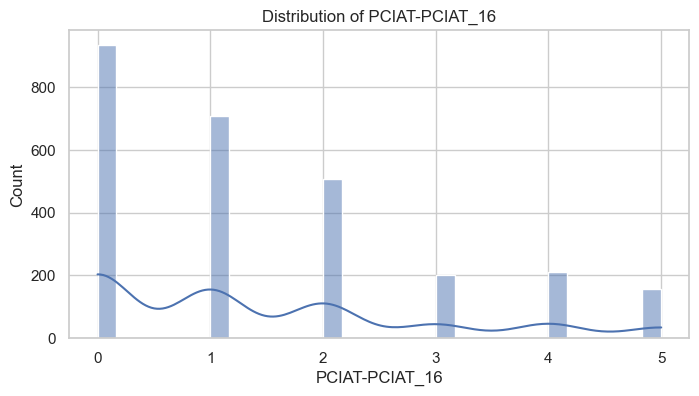

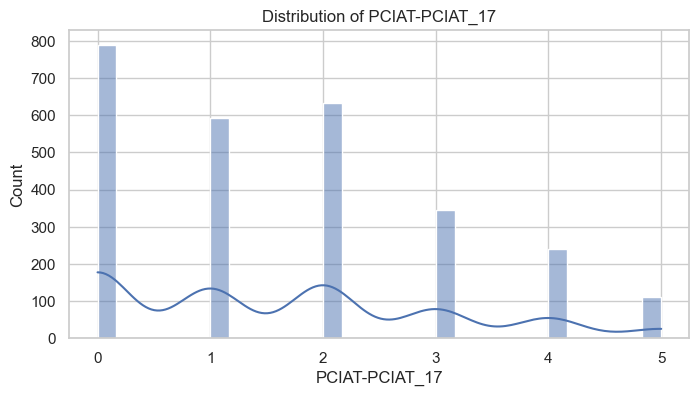

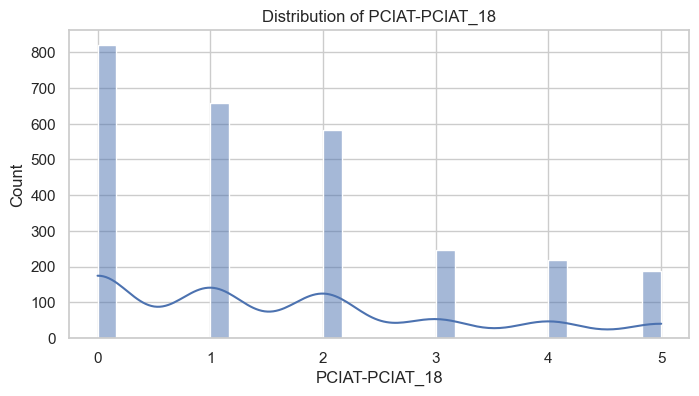

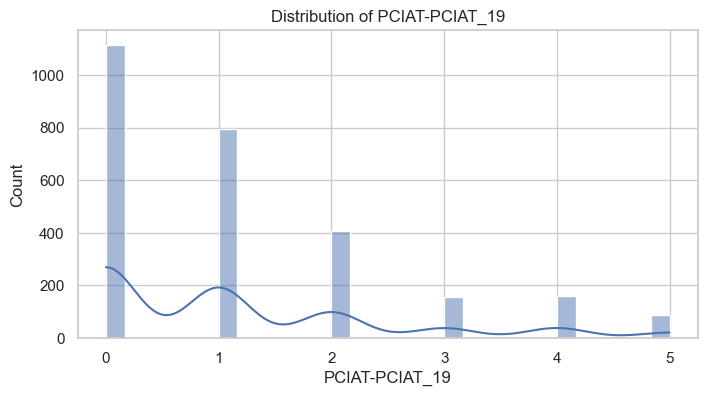

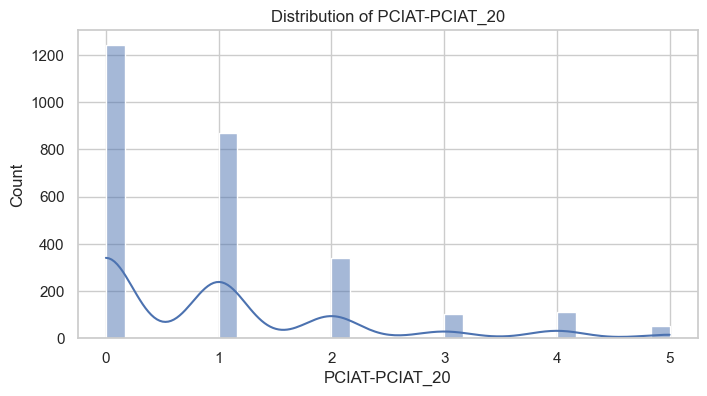

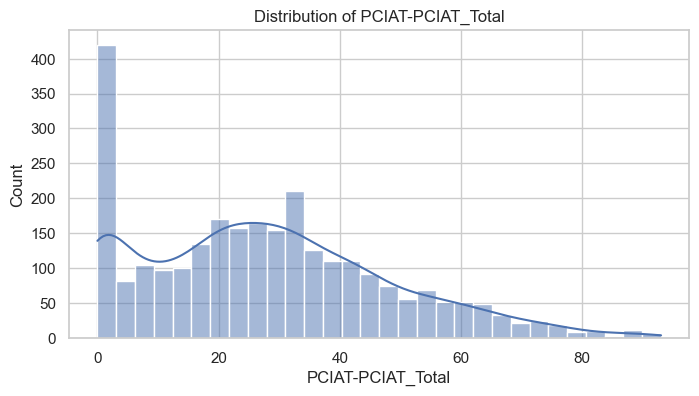

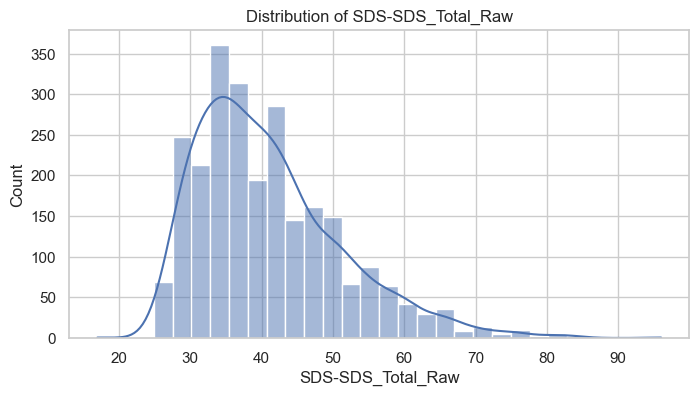

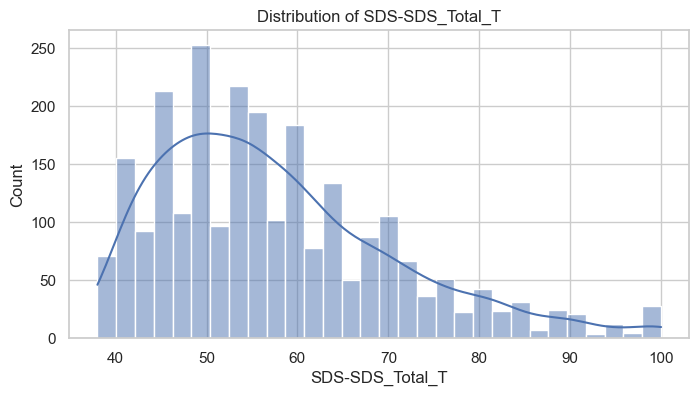

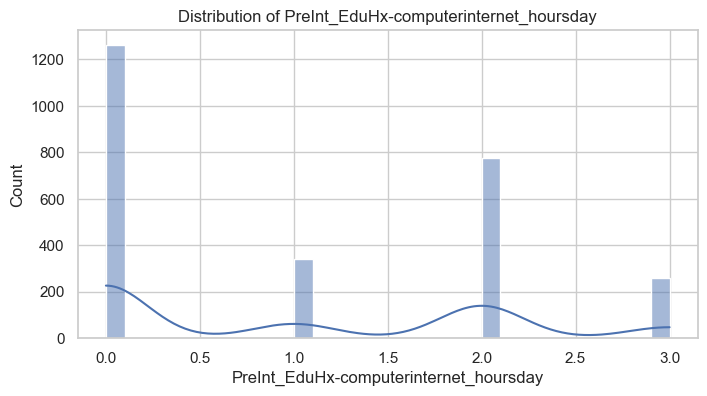

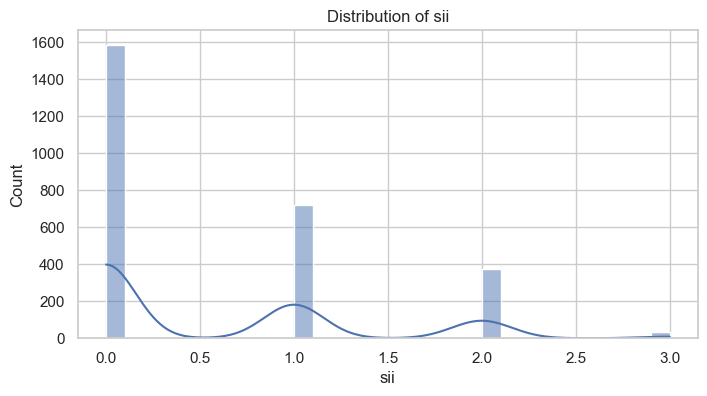

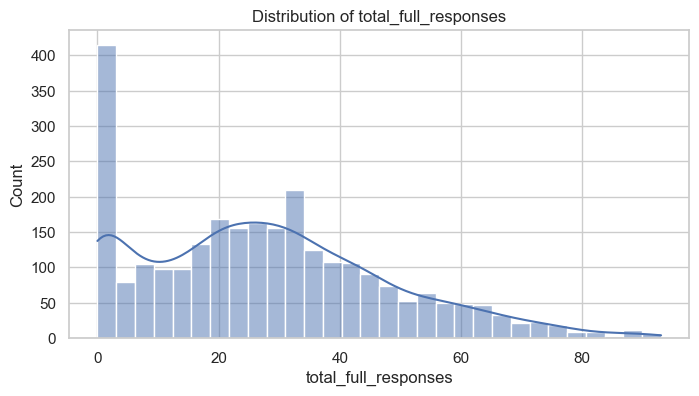

In [385]:
categorical_cols = train_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_data, x=col, order=train_data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=train_data, x=col, kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

### Imputing

In [386]:
train_data = train_data.drop(columns=exclusive_train_columns)
# Check for missing values and duplicates
print("\nMissing Values in Training Set:")
print(train_data.isnull().sum())
#print("\nMissing Values in Test Set:")
#print(test_data.isnull().sum())
#print("\nDuplicates in Training Set:", train_data.duplicated().sum())
#print("Duplicates in Test Set:", test_data.duplicated().sum())


Missing Values in Training Set:
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                                391
CGAS-CGAS_Score                            391
Physical-Season                            140
Physical-BMI                               206
Physical-Height                            203
Physical-Weight                            162
Physical-Waist_Circumference              2239
Physical-Diastolic_BP                      255
Physical-HeartRate                         247
Physical-Systolic_BP                       255
Fitness_Endurance-Season                  1466
Fitness_Endurance-Max_Stage               1993
Fitness_Endurance-Time_Mins               1996
Fitness_Endurance-Time_Sec                1996
FGC-Season                                  87
FGC-FGC_CU                                 809
FGC-FGC_CU_Zone                            844
FGC-FGC_GSND               

In [387]:
missing_summary = pd.DataFrame({
    'Total Values': train_data.shape[0],
    'Missing Values': train_data.isnull().sum(),
    'Missing Percentage (%)': (train_data.isnull().sum() / train_data.shape[0]) * 100
})

missing_summary

Total Values  Missing Values  \
Basic_Demos-Enroll_Season                       2719               0   
Basic_Demos-Age                                 2719               0   
Basic_Demos-Sex                                 2719               0   
CGAS-Season                                     2719             391   
CGAS-CGAS_Score                                 2719             391   
Physical-Season                                 2719             140   
Physical-BMI                                    2719             206   
Physical-Height                                 2719             203   
Physical-Weight                                 2719             162   
Physical-Waist_Circumference                    2719            2239   
Physical-Diastolic_BP                           2719             255   
Physical-HeartRate                              2719             247   
Physical-Systolic_BP                            2719             255   
Fitness_Endurance-Season                        2719            1466   
Fitness_Endurance-Max_Stage                     2719            1993   
Fitness_Endurance-Time_Mins                     2719            1996   
Fitness_Endurance-Time_Sec                      2719            1996   
FGC-Season                                      2719              87   
FGC-FGC_CU                                      2719             809   
FGC-FGC_CU_Zone                                 2719             844   
FGC-FGC_GSND                                    2719            1853   
FGC-FGC_GSND_Zone                               2719            1861   
FGC-FGC_GSD                                     2719            1854   
FGC-FGC_GSD_Zone                                2719            1861   
FGC-FGC_PU                                      2719             819   
FGC-FGC_PU_Zone                                 2719             853   
FGC-FGC_SRL                                     2719             817   
FGC-FGC_SRL_Zone                                2719             851   
FGC-FGC_SRR                                     2719             815   
FGC-FGC_SRR_Zone                                2719             849   
FGC-FGC_TL                                      2719             809   
FGC-FGC_TL_Zone                                 2719             843   
BIA-Season                                      2719             886   
BIA-BIA_Activity_Level_num                      2719             917   
BIA-BIA_BMC                                     2719             917   
BIA-BIA_BMI                                     2719             917   
BIA-BIA_BMR                                     2719             917   
BIA-BIA_DEE                                     2719             917   
BIA-BIA_ECW                                     2719             917   
BIA-BIA_FFM                                     2719             917   
BIA-BIA_FFMI                                    2719             917   
BIA-BIA_FMI                                     2719             917   
BIA-BIA_Fat                                     2719             917   
BIA-BIA_Frame_num                               2719             917   
BIA-BIA_ICW                                     2719             917   
BIA-BIA_LDM                                     2719             917   
BIA-BIA_LST                                     2719             917   
BIA-BIA_SMM                                     2719             917   
BIA-BIA_TBW                                     2719             917   
PAQ_A-Season                                    2719            2362   
PAQ_A-PAQ_A_Total                               2719            2362   
PAQ_C-Season                                    2719            1284   
PAQ_C-PAQ_C_Total                               2719            1284   
SDS-Season                                      2719             206   
SDS-SDS_Total_Raw                               2719             206   
SDS-SDS_

In [388]:
# categorical_cols = train_data.select_dtypes(include=['object']).columns

# label_encoders = {}
# for col in categorical_cols:
#     label_encoders[col] = LabelEncoder()
#     train_data[col] = label_encoders[col].fit_transform(train_data[col].astype(str))

# print("Categorical Columns Transformed using Label Encoding:")
# print(train_data[categorical_cols].head())

# print("\nRemaining Categorical Columns:", train_data.select_dtypes(include=['object']).columns)

In [389]:
categorical_cols = train_data.select_dtypes(include=['object']).columns #sii (outcome var) is categorical but we are encoding that differently
print(categorical_cols)

train_data = pd.get_dummies(train_data, columns = categorical_cols, drop_first=True, dtype='int')

print("One-Hot Encoding applied to categorical columns.")
print(train_data.head())

Index(['Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
       'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season',
       'PAQ_C-Season', 'SDS-Season', 'PreInt_EduHx-Season'],
      dtype='object')
One-Hot Encoding applied to categorical columns.
   Basic_Demos-Age  Basic_Demos-Sex  CGAS-CGAS_Score  Physical-BMI  \
0                5                0             51.0     16.877316   
1                9                0              NaN     14.035590   
2               10                1             71.0     16.648696   
3                9                0             71.0     18.292347   
5               13                1             50.0     22.279952   

   Physical-Height  Physical-Weight  Physical-Waist_Circumference  \
0             46.0             50.8                           NaN   
1             48.0             46.0                          22.0   
2             56.5             75.6                           NaN   
3             56.0    

In [390]:
def impute_missing_values(df, additional_cols=[], categorical_cols=[]):
    imputer = KNNImputer(n_neighbors=5)
    numeric_columns = list(df.select_dtypes(include=['float64', 'int64']).columns)
    categorical_cols_f = [col for col in df.columns if any(col.startswith(prefix) for prefix in categorical_cols)]
    numeric_columns = [col for col in numeric_columns if col not in categorical_cols_f]
    numeric_columns += additional_cols
    imputed_array = imputer.fit_transform(df[numeric_columns])
    imputed_df = pd.DataFrame(imputed_array, columns=numeric_columns)
    for col in categorical_cols_f:
        imputed_df[col] = df[col]
    return imputed_df

In [391]:
train_data = impute_missing_values(train_data, ['sii'], list(categorical_cols))
train_data['sii'] = train_data['sii'].round().astype(int)
print("Remaining Missing Values:")
print(train_data.isna().sum())

KeyError: "['sii'] not in index"

In [ ]:
# For this version, we'll adjust the categorical columns so they're all 0 (but for other models these don't need to be imputed)
train_data = train_data.fillna(0)
print(train_data.isna().sum())

Basic_Demos-Age               0
Basic_Demos-Sex               0
CGAS-CGAS_Score               0
Physical-BMI                  0
Physical-Height               0
                             ..
SDS-Season_Summer             0
SDS-Season_Winter             0
PreInt_EduHx-Season_Spring    0
PreInt_EduHx-Season_Summer    0
PreInt_EduHx-Season_Winter    0
Length: 81, dtype: int64


In [ ]:
# low_missing_cols = ['PreInt_EduHx-computerinternet_hoursday', 'FGC-Season']
# selected_cols = [col for col in train_data.columns if any(col.startswith(prefix) for prefix in low_missing_cols)]

# for col in selected_cols:
#     if train_data[col].dtype == 'object':
#         train_data[col].fillna(train_data[col].mode()[0], inplace=True)
#     else:  
#         train_data[col].fillna(train_data[col].median(), inplace=True)

# moderate_missing_cols = ['Physical-BMI', 'Physical-Systolic_BP', 'FGC-FGC_CU']
# for col in moderate_missing_cols:
#     train_data[col].fillna(train_data[col].median(), inplace=True)

# # High missingness (>30%) - Using KNN Imputer for Numerical
# high_missing_cols = ['BIA-BIA_Activity_Level_num', 'PAQ_A-PAQ_A_Total']
# numerical_high_missing = [col for col in high_missing_cols if train_data[col].dtype != 'object']

# knn_imputer = KNNImputer(n_neighbors=5)
# train_data[numerical_high_missing] = knn_imputer.fit_transform(train_data[numerical_high_missing])

# # Drop columns with extreme missingness if they are non-essential
# threshold = 70  # Percentage threshold
# columns_to_drop = [col for col in train_data.columns if train_data[col].isnull().mean() * 100 > threshold]
# train_data.drop(columns=columns_to_drop, axis=1, inplace=True)

# # Verify missing values are handled
# print("Remaining Missing Values:")
# print(train_data.isnull().sum())

In [ ]:
# numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
# for col in numerical_cols:
#     train_data[col].fillna(train_data[col].mean(), inplace=True)

# categorical_cols = train_data.select_dtypes(include=['object']).columns
# for col in categorical_cols:
#     train_data[col].fillna(train_data[col].mode()[0], inplace=True)

# print("Missing Values After Imputation:")
# print(train_data.isnull().sum())

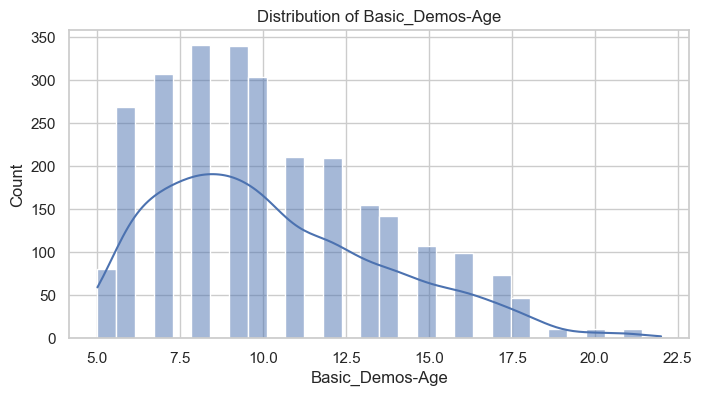

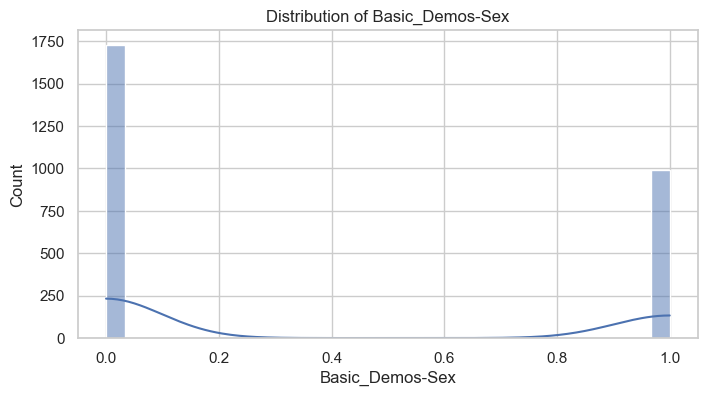

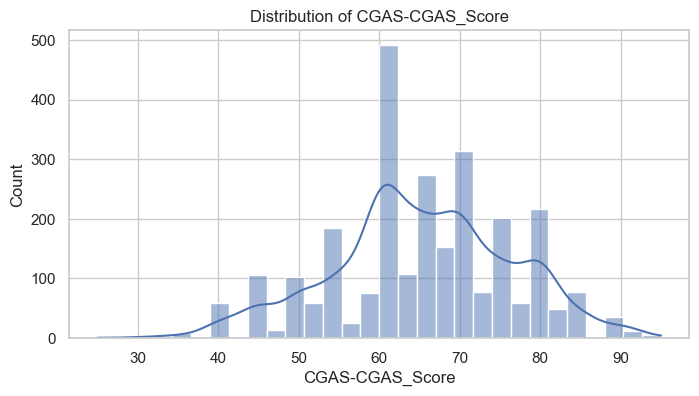

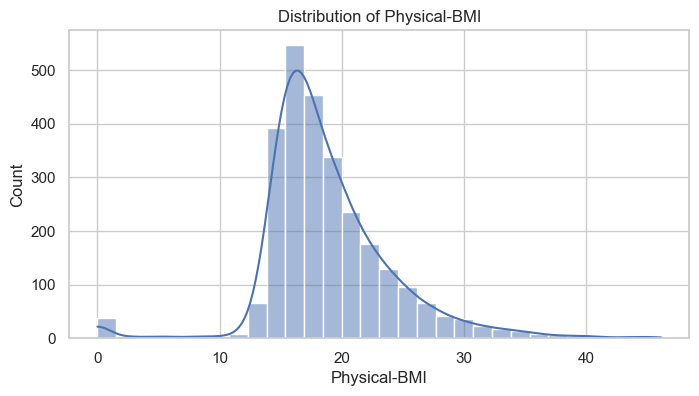

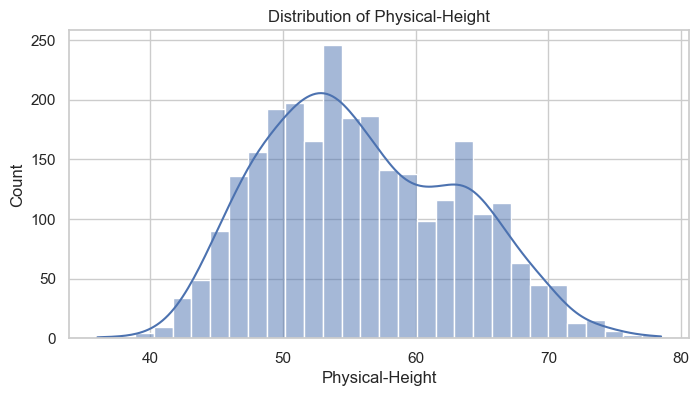

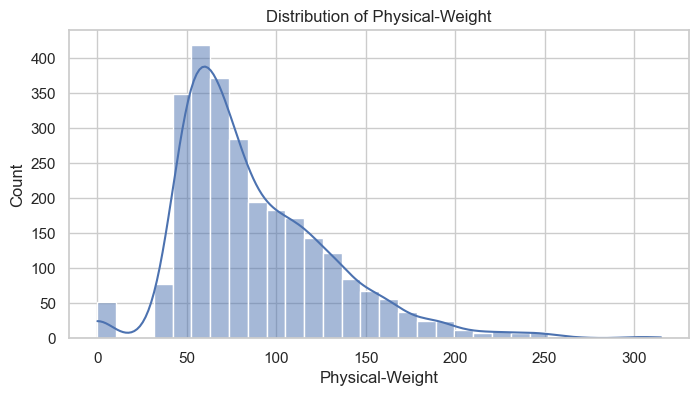

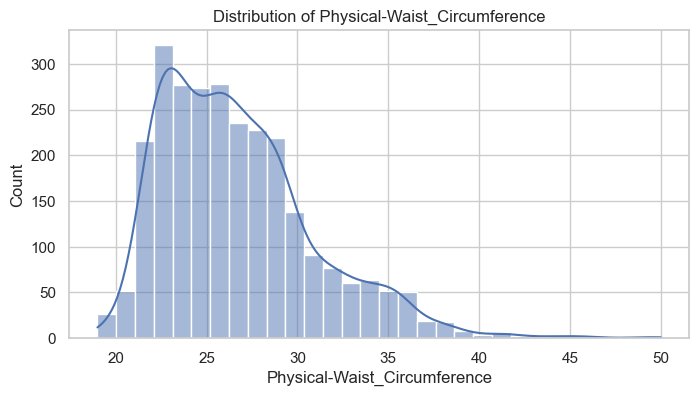

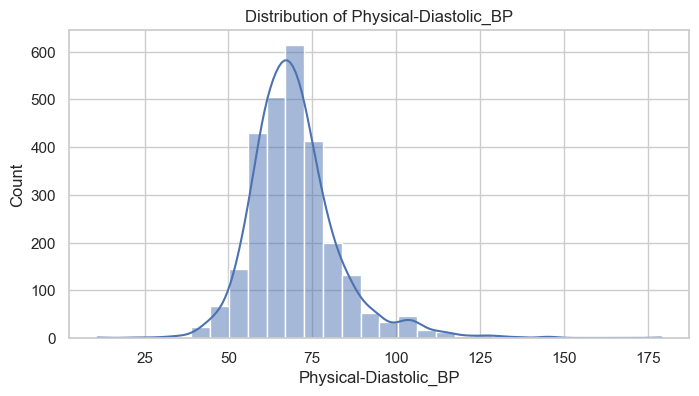

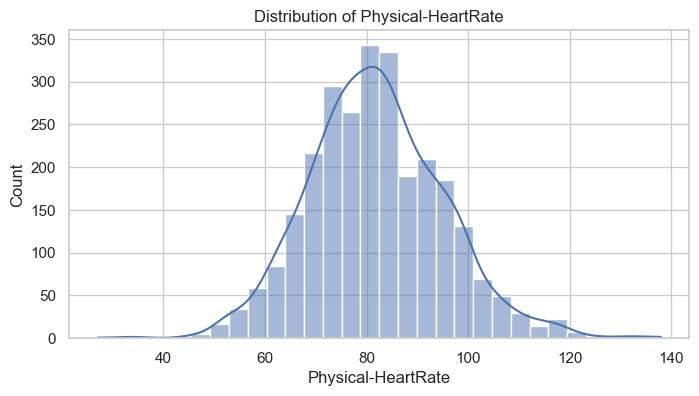

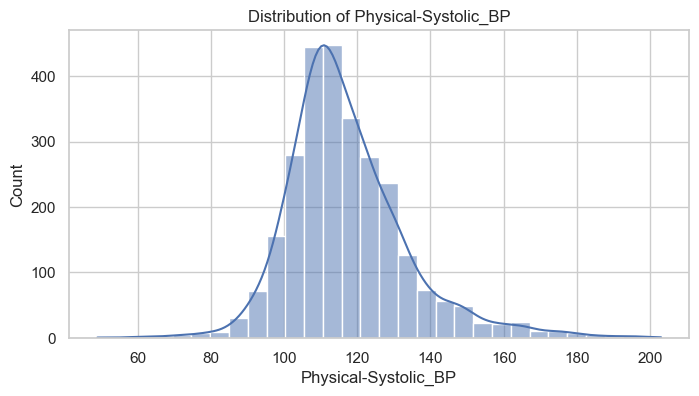

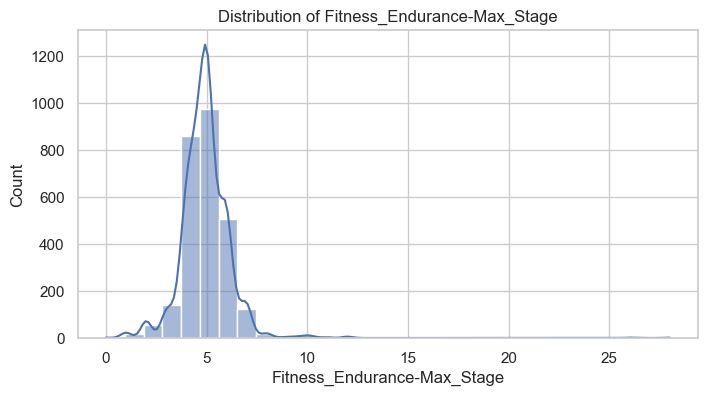

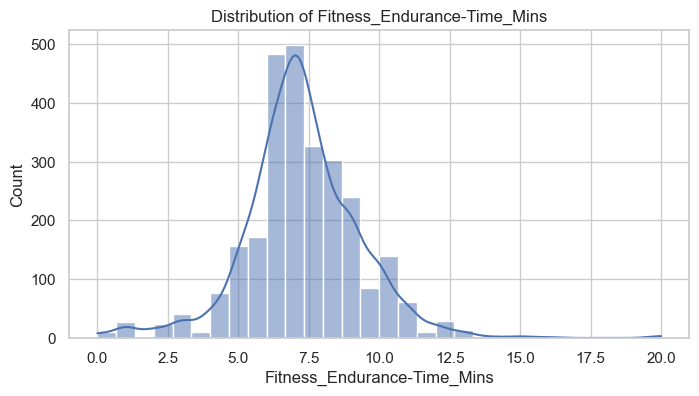

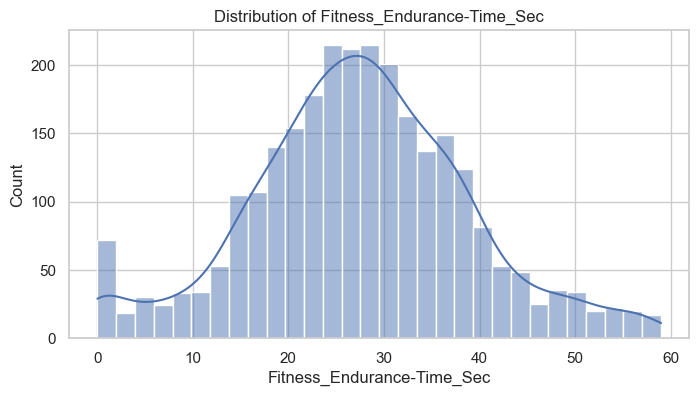

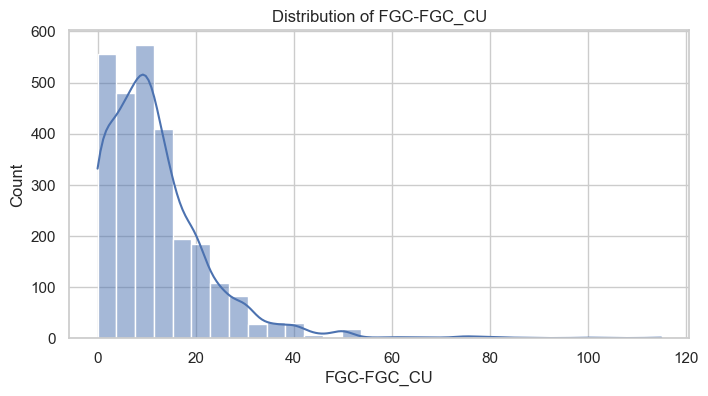

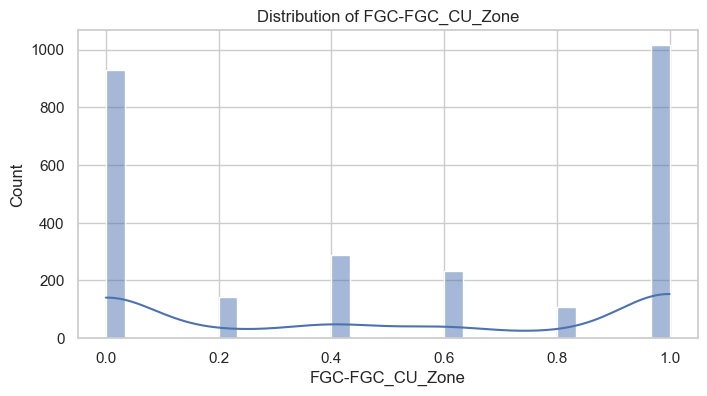

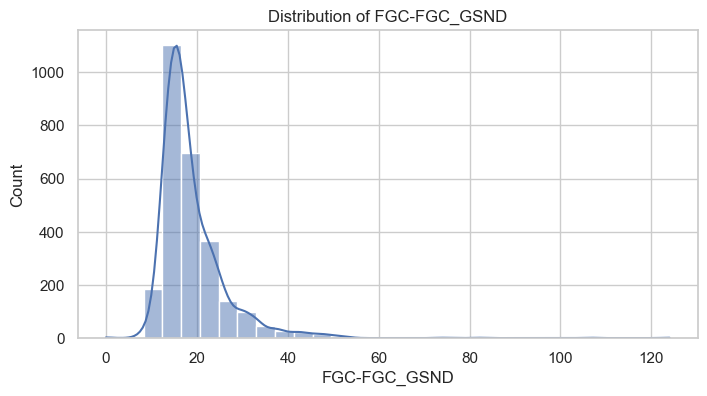

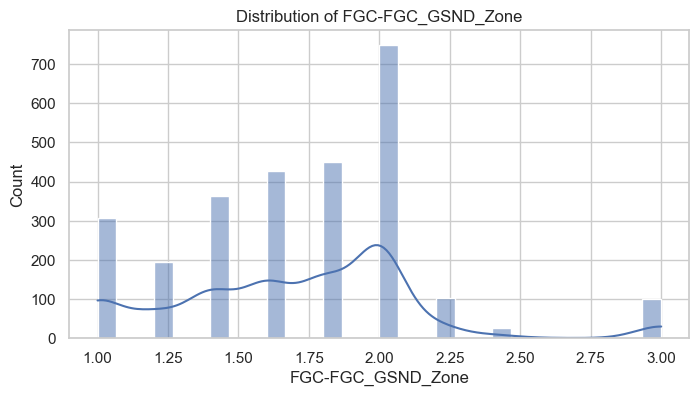

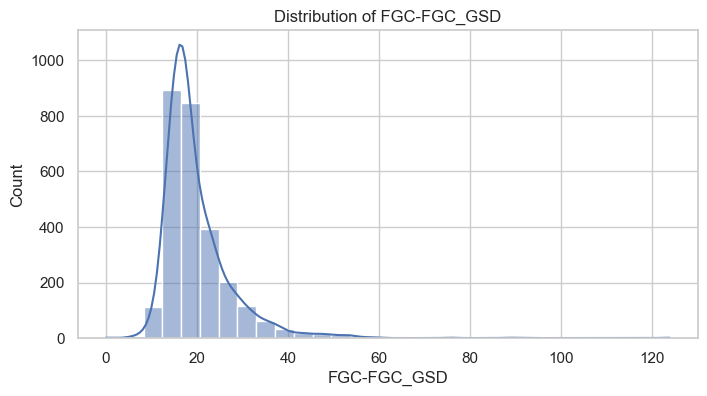

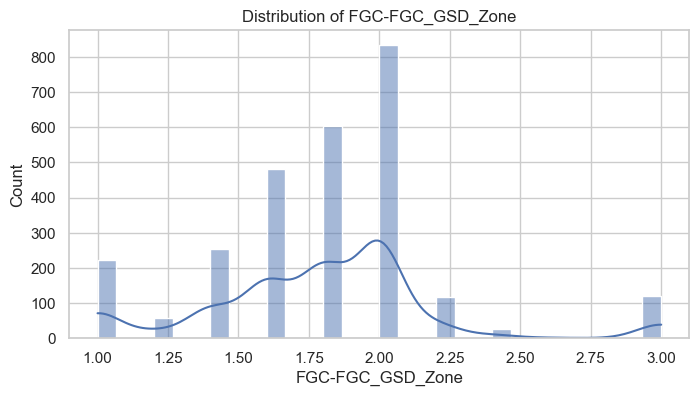

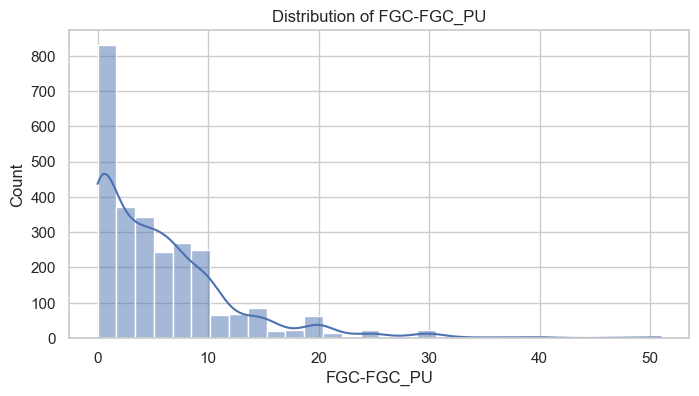

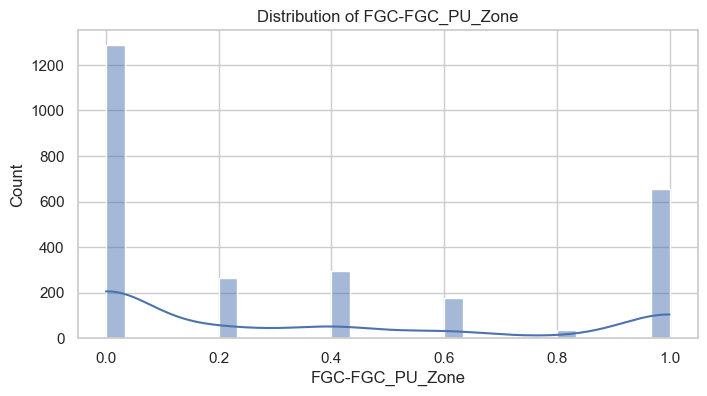

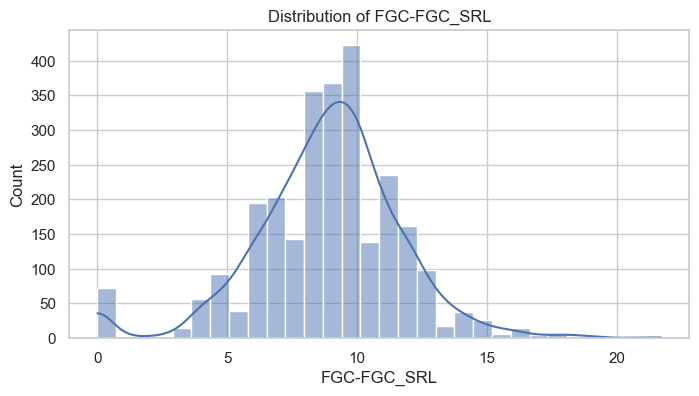

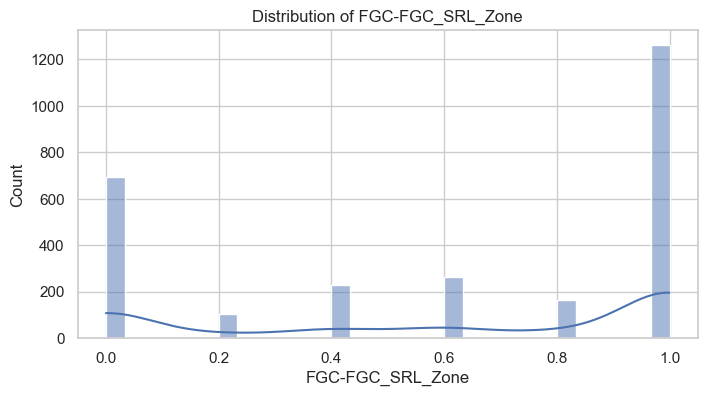

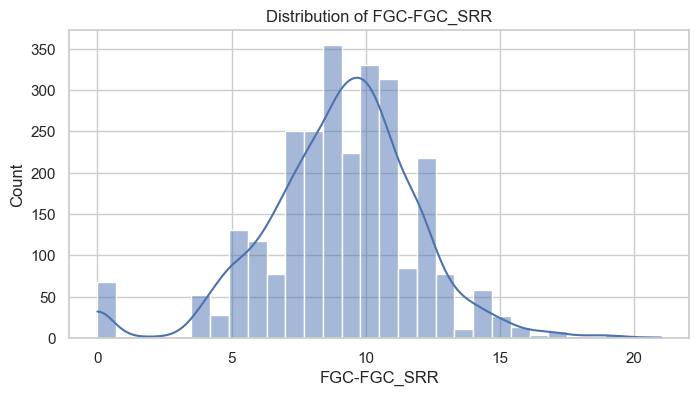

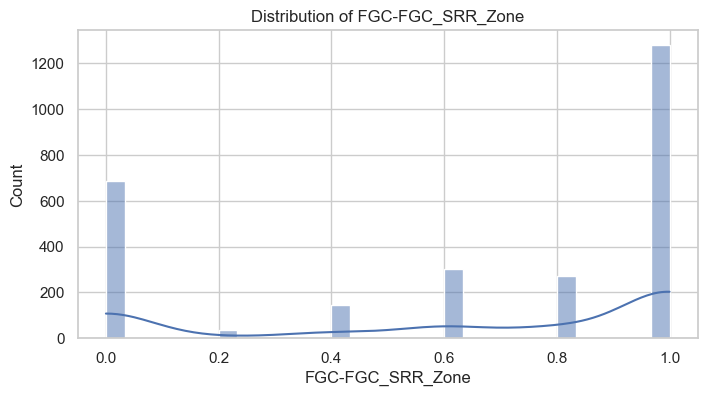

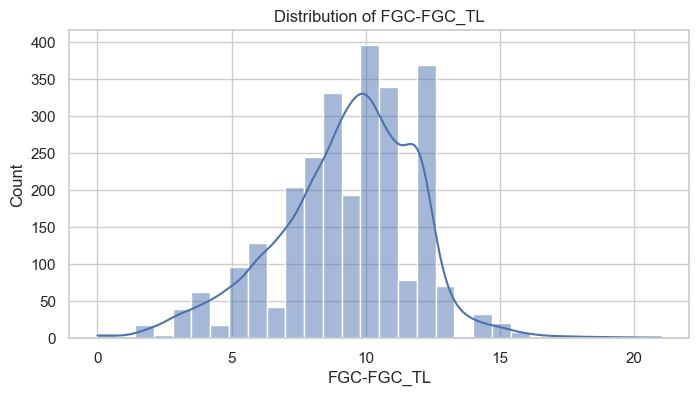

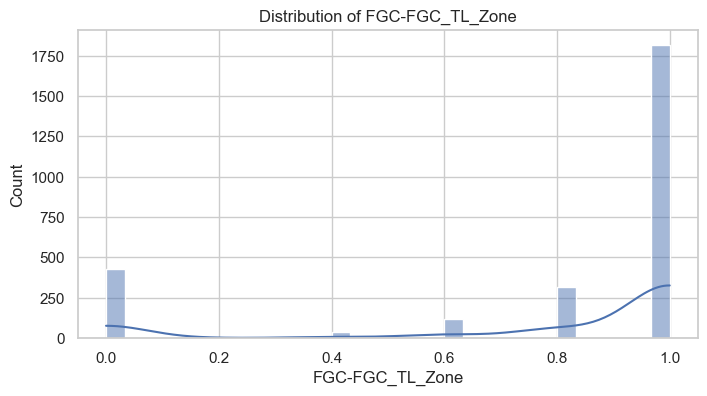

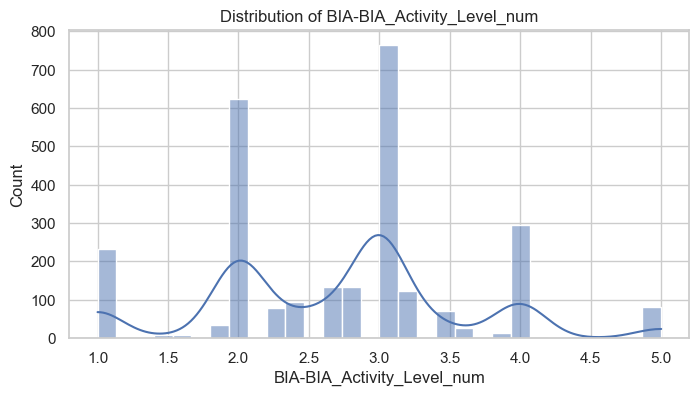

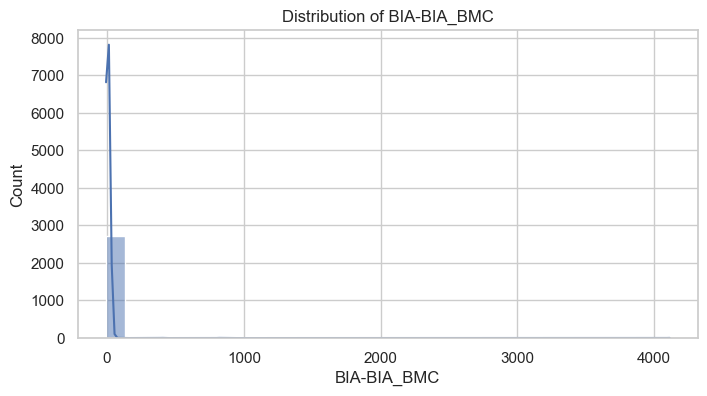

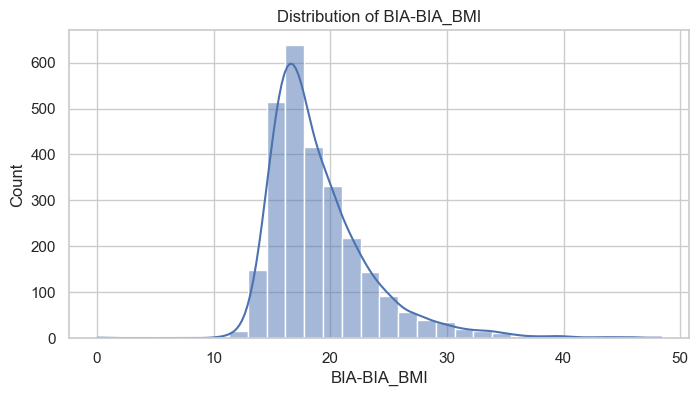

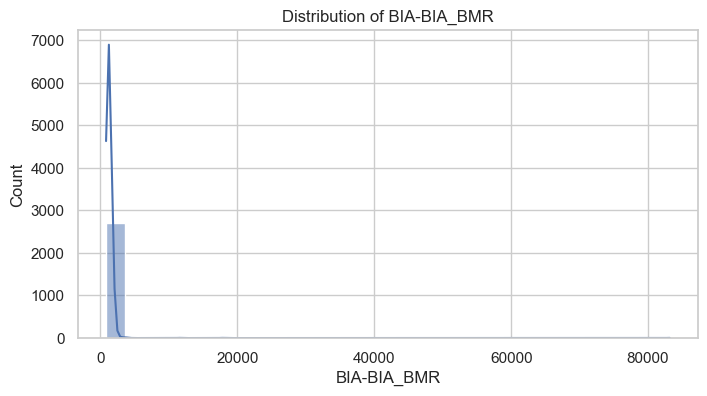

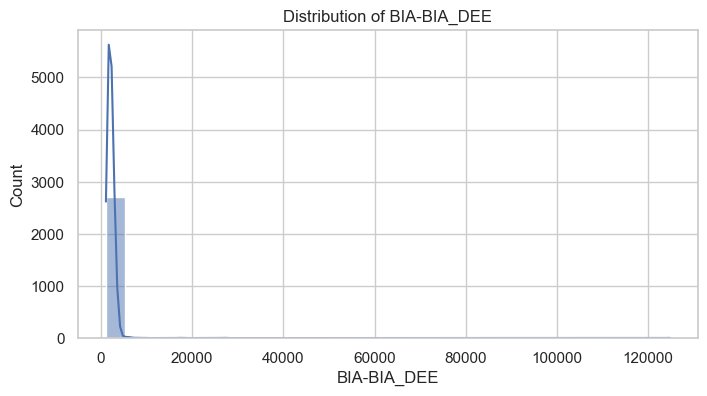

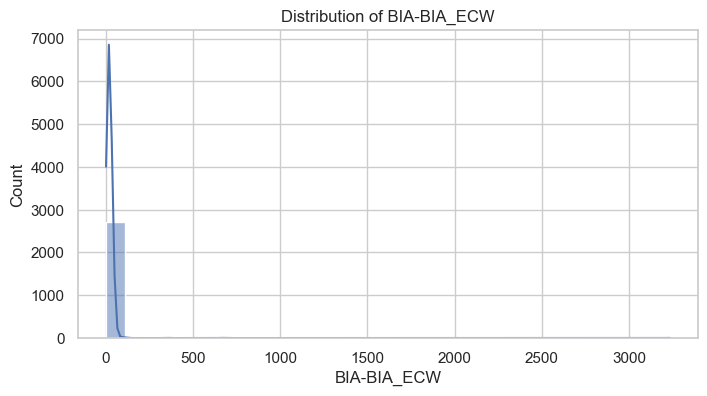

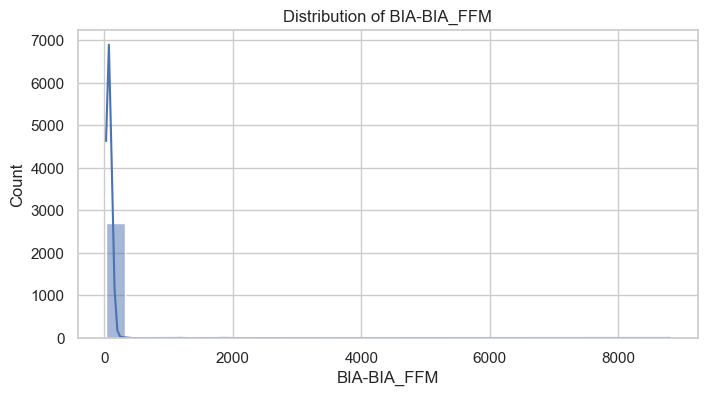

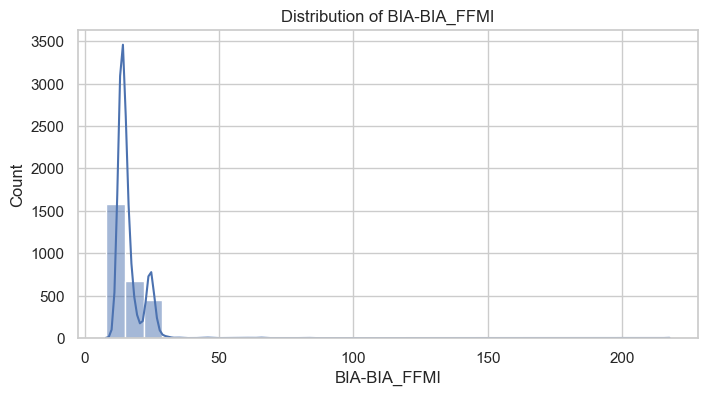

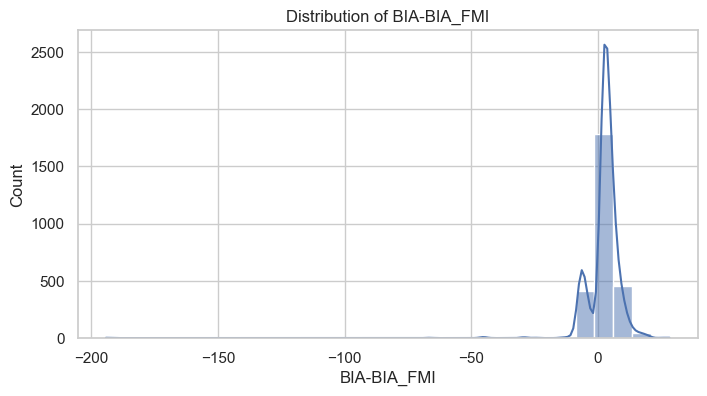

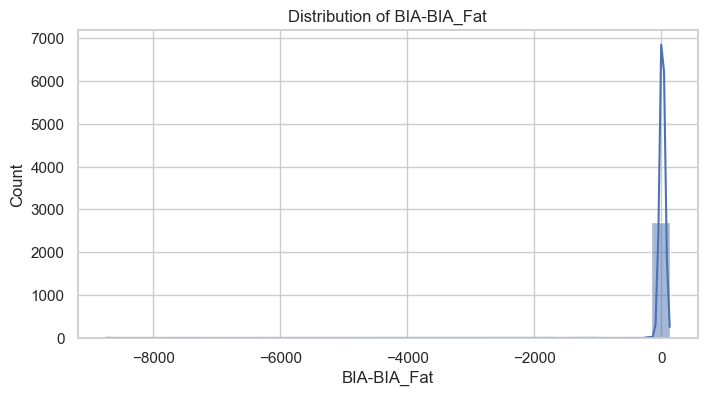

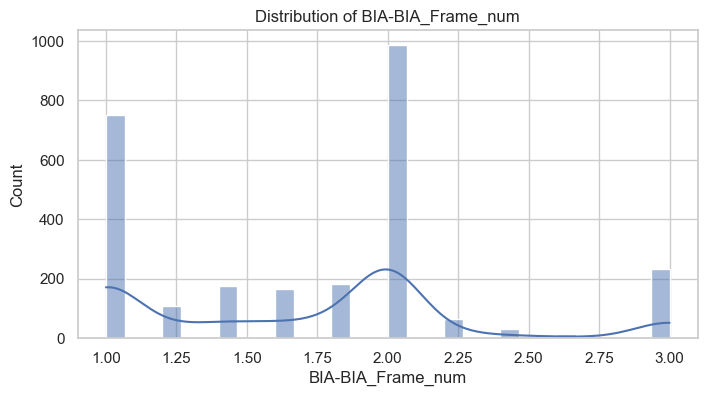

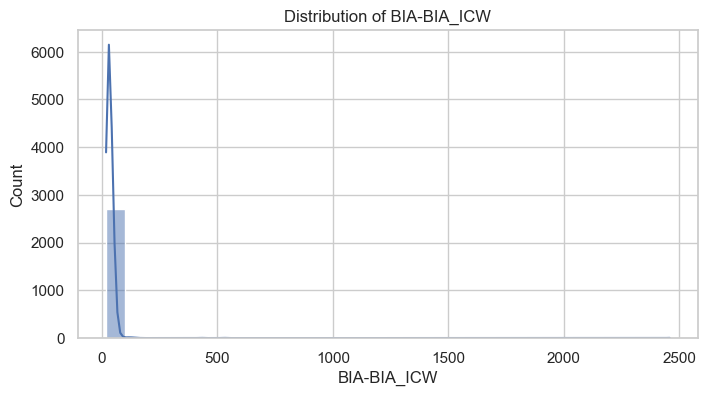

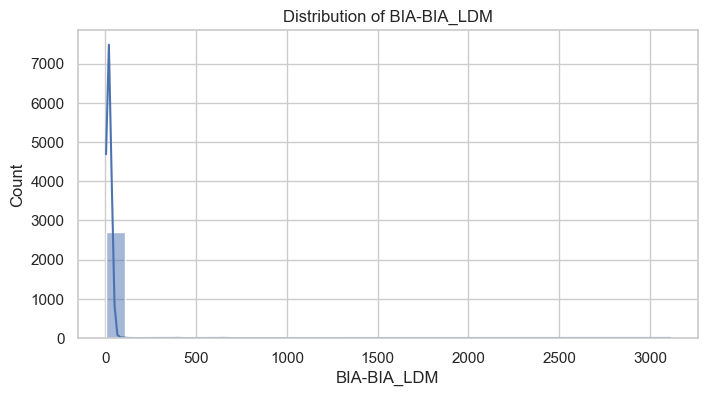

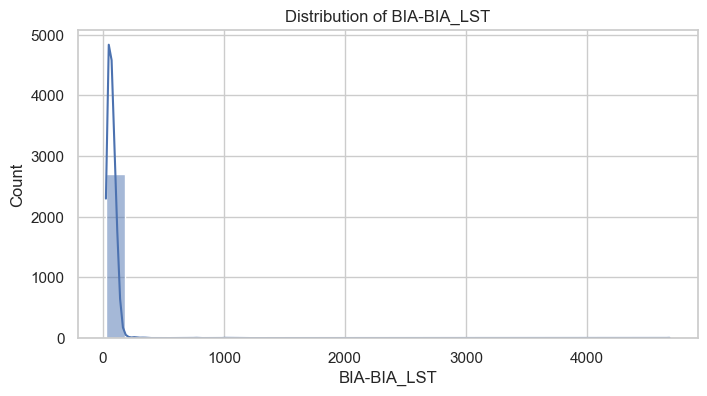

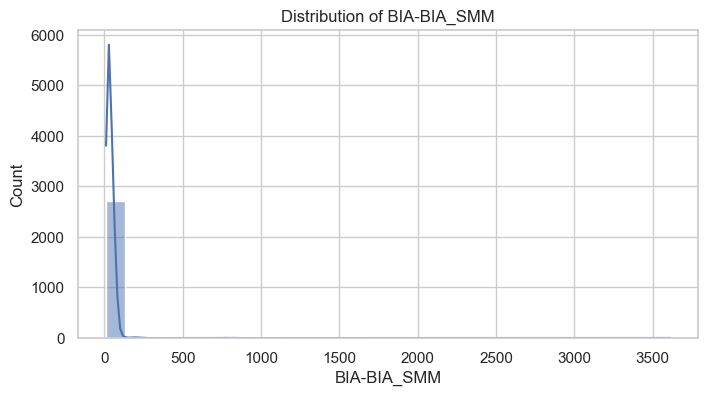

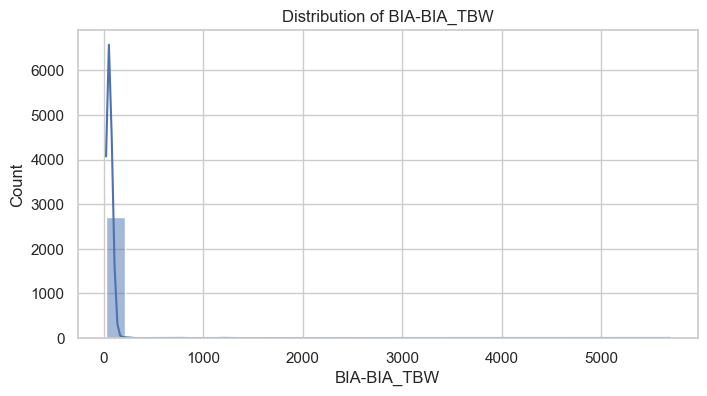

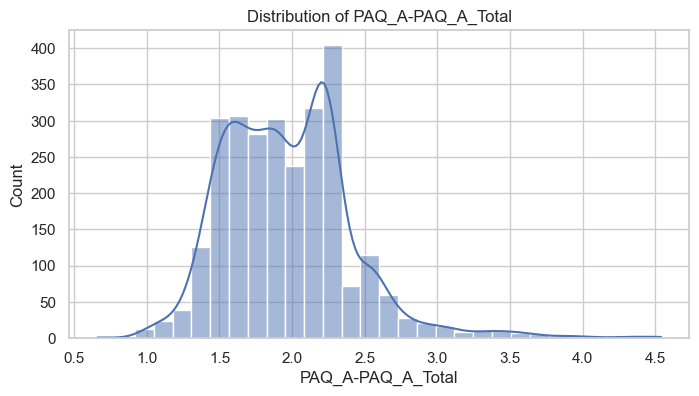

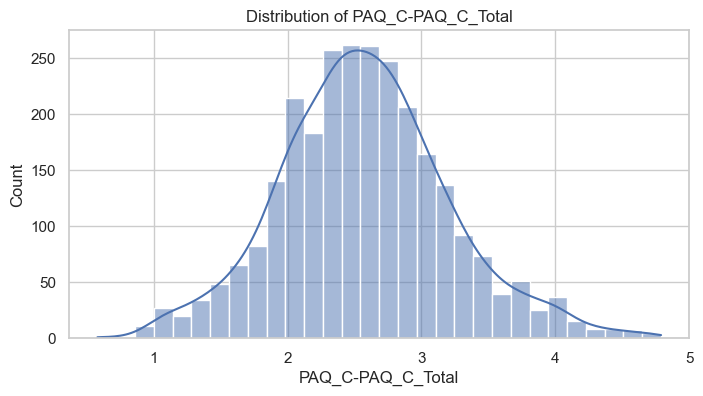

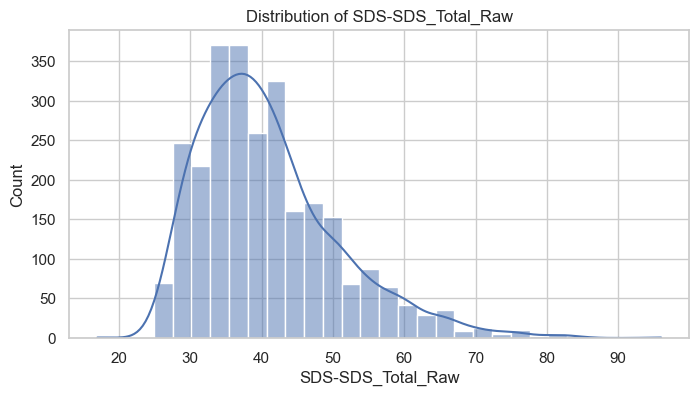

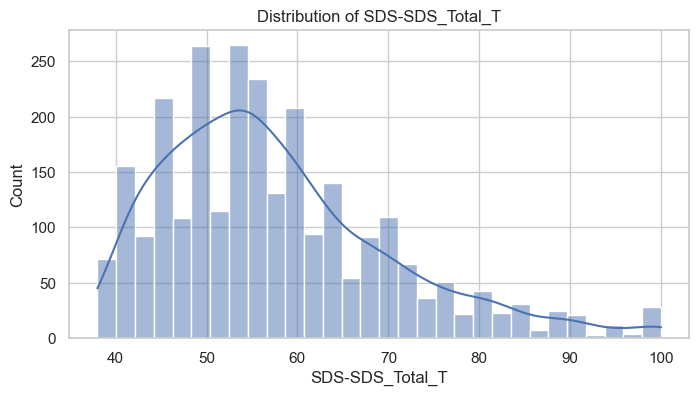

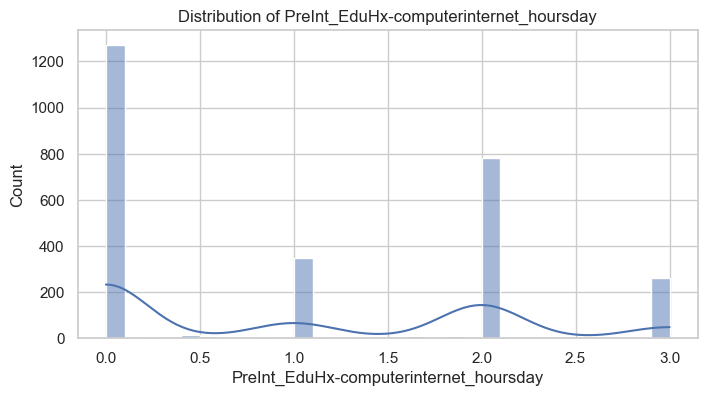

ValueError: If using all scalar values, you must pass an index

<Figure size 800x400 with 0 Axes>

In [ ]:
# print("Unique values for label-encoded columns:")
# for col in label_encoders.keys():
#     unique_values = train_data[col].unique()
#     print(f"Column: {col}")
#     print(f"Unique Values ({len(unique_values)}): {unique_values}\n")

Unique values for label-encoded columns:


In [ ]:
# print("Label Encoder Mappings:")
# for col, encoder in label_encoders.items():
#     print(f"Column: {col}")
#     label_mapping = {index: label for index, label in enumerate(encoder.classes_)}
#     print(f"Mapping: {label_mapping}\n")

Label Encoder Mappings:


In [ ]:
# train_data['FGC-FGC_CU_Zone'].value_counts()

FGC-FGC_CU_Zone
1.000000    985
0.000000    890
0.525333    844
Name: count, dtype: int64

In [ ]:
if 'sii_numeric' not in train_data.columns:
    sii_numeric_mapping = {'0 (None)': 0, '1 (Mild)': 1, '2 (Moderate)': 2, '3 (Severe)': 3}
    train_data['sii_numeric'] = train_data['sii'].map(sii_numeric_mapping)

numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
numerical_corr = train_data[numerical_cols].corrwith(train_data['sii_numeric']).sort_values(ascending=False)

print("Numerical Correlations with 'sii_numeric':")
print(numerical_corr)

Numerical Correlations with 'sii_numeric':
total_full_responses                      0.884924
Basic_Demos-Age                           0.367523
Physical-Height                           0.361420
PreInt_EduHx-computerinternet_hoursday    0.331107
Physical-Weight                           0.316955
SDS-SDS_Total_T                           0.222717
SDS-SDS_Total_Raw                         0.219741
Physical-BMI                              0.213262
FGC-FGC_CU                                0.201034
BIA-BIA_BMI                               0.183901
FGC-FGC_PU                                0.147872
BIA-BIA_Frame_num                         0.133985
Physical-Systolic_BP                      0.130342
FGC-FGC_GSD                               0.101774
FGC-FGC_GSND                              0.093586
FGC-FGC_TL                                0.089676
BIA-BIA_FFMI                              0.083428
BIA-BIA_FMI                               0.061508
BIA-BIA_LST                            

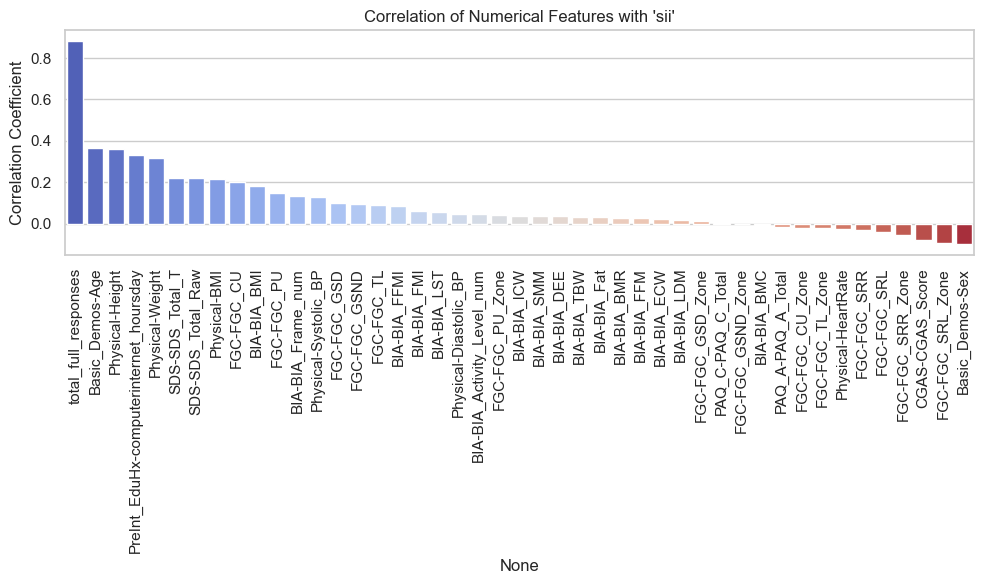

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=numerical_corr.index, y=numerical_corr.values, palette="coolwarm")
plt.title("Correlation of Numerical Features with 'sii'")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

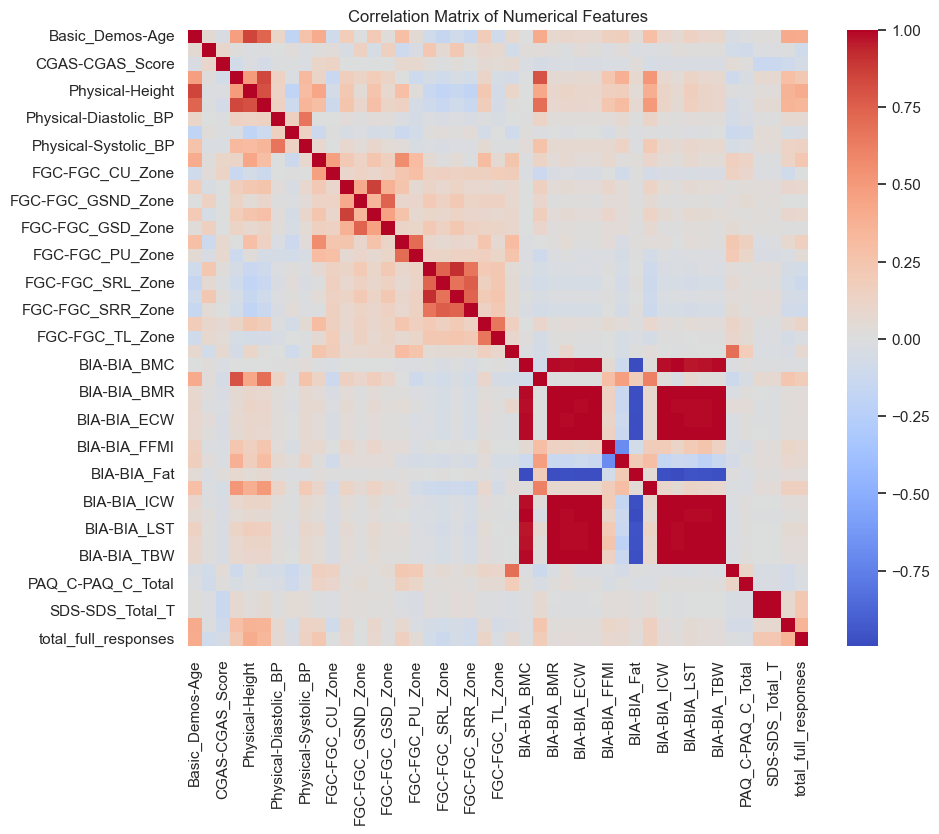

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[numerical_cols].corr(), cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

### Relationship between Target Variable and Demos

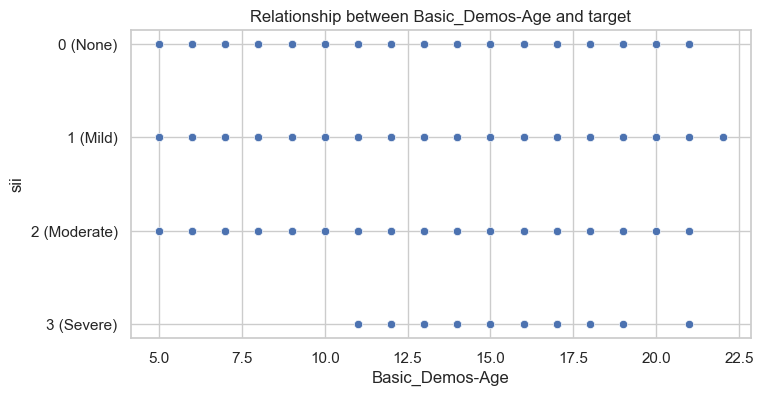

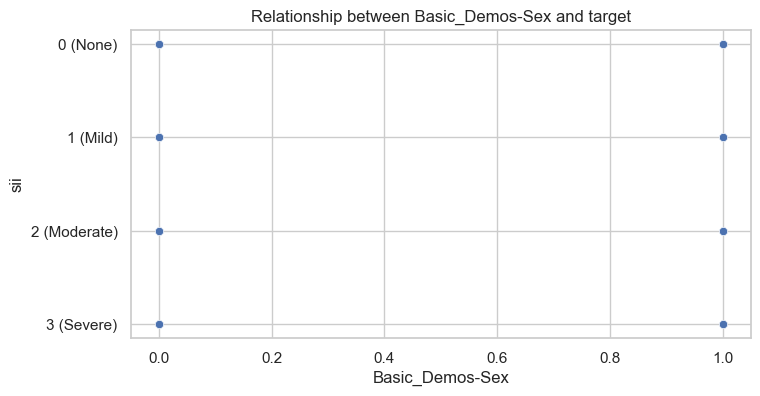

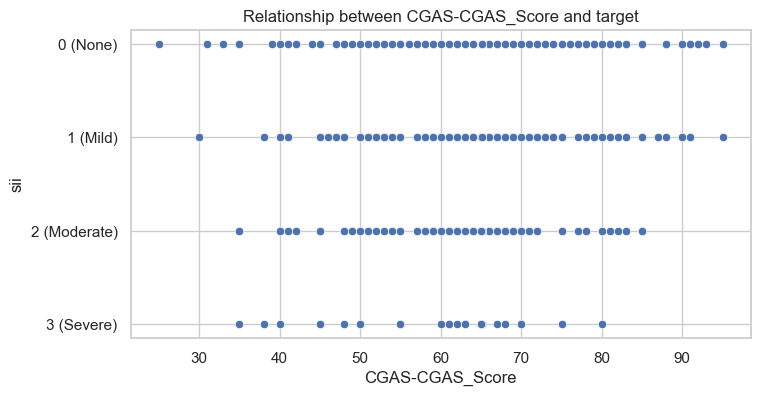

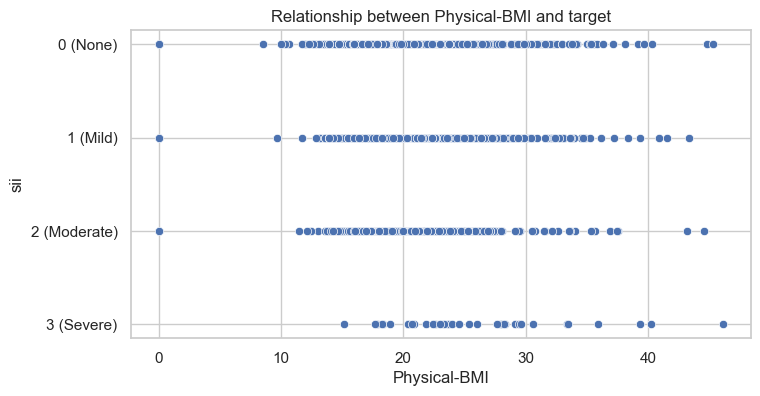

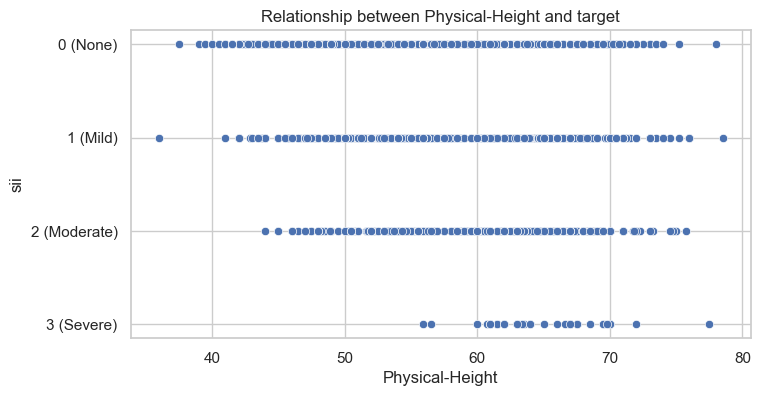

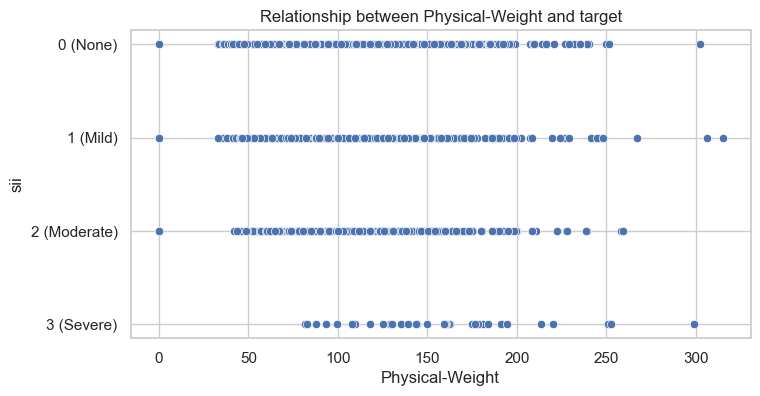

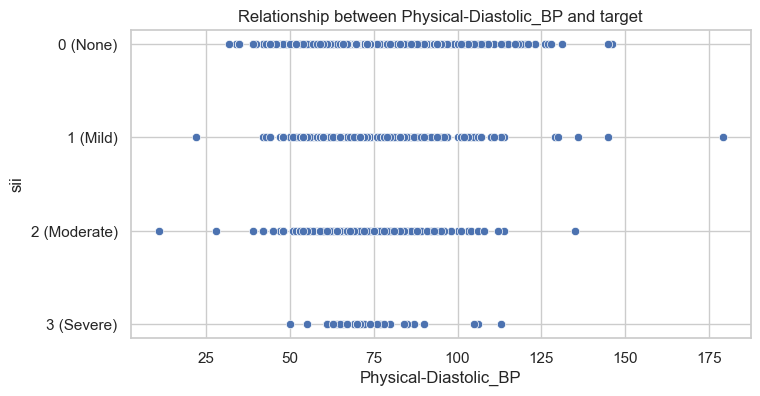

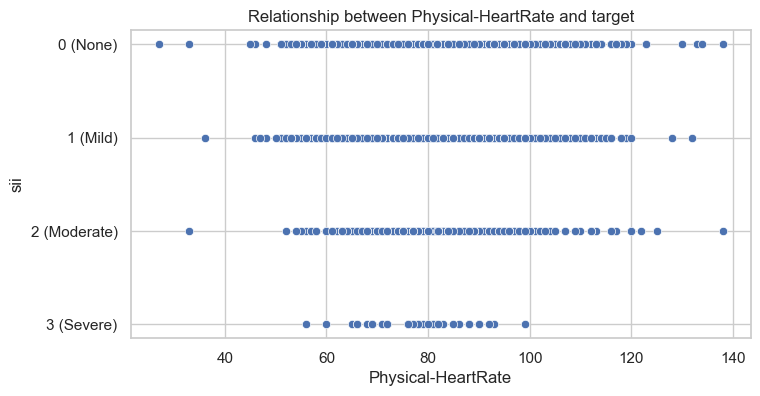

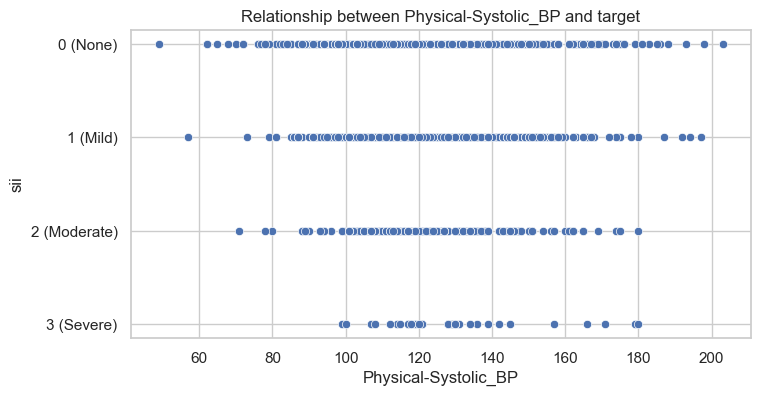

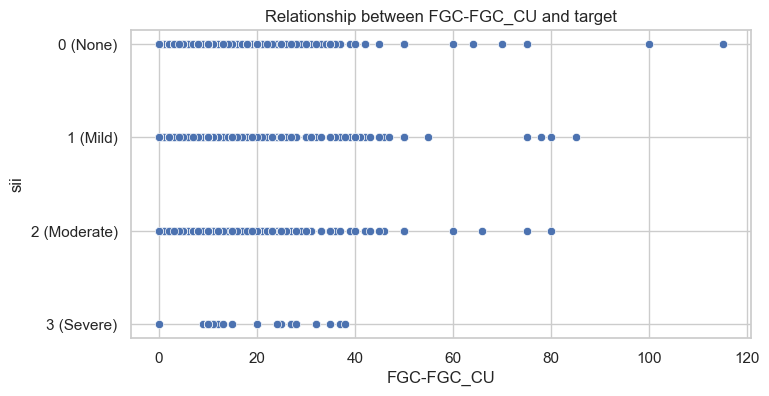

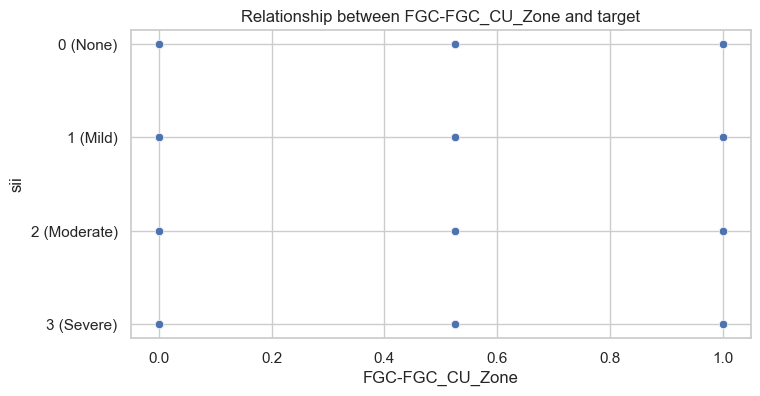

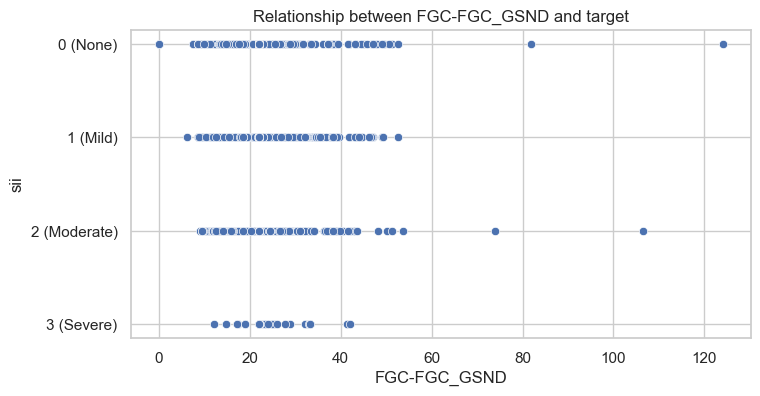

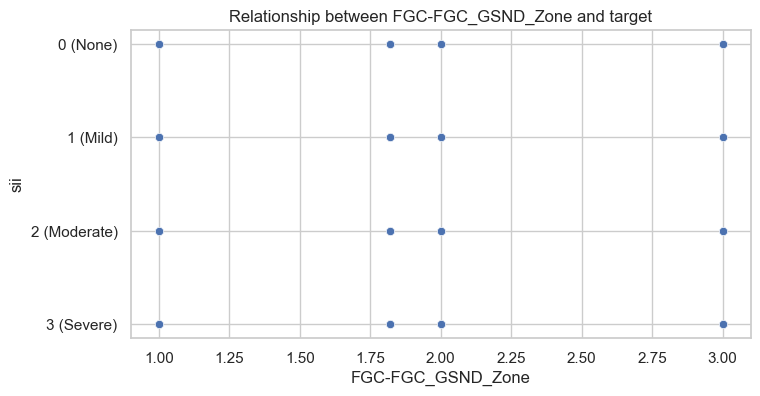

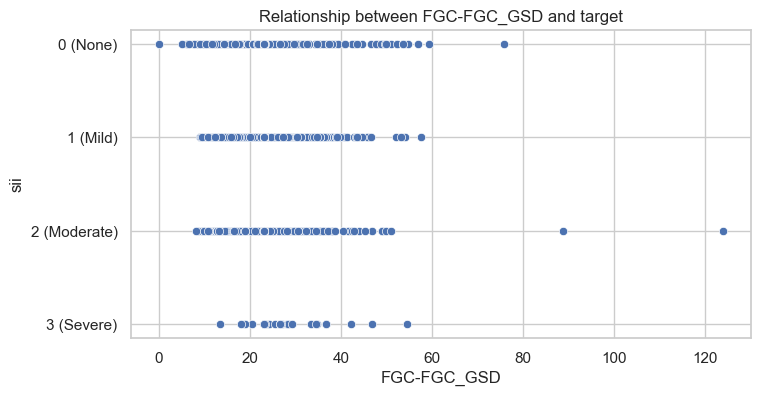

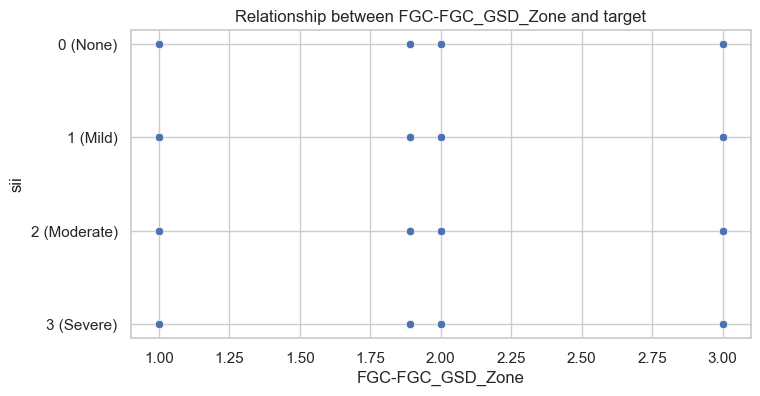

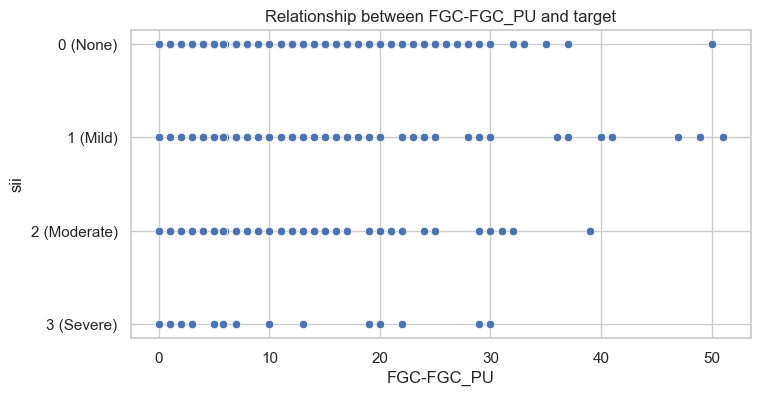

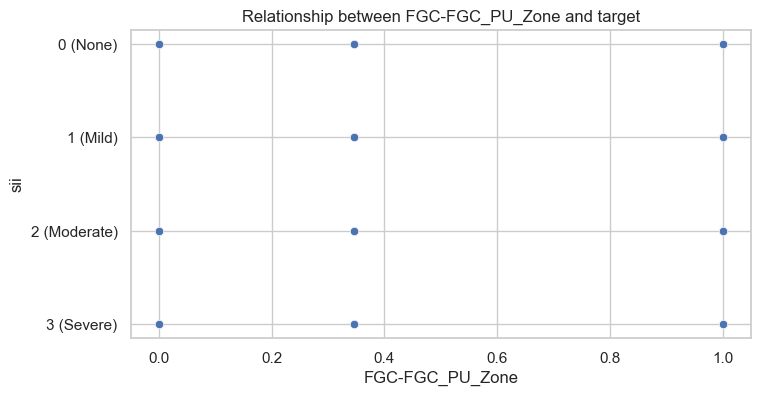

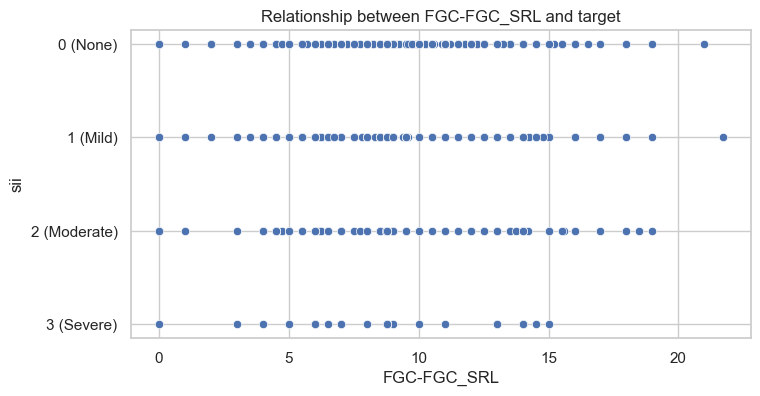

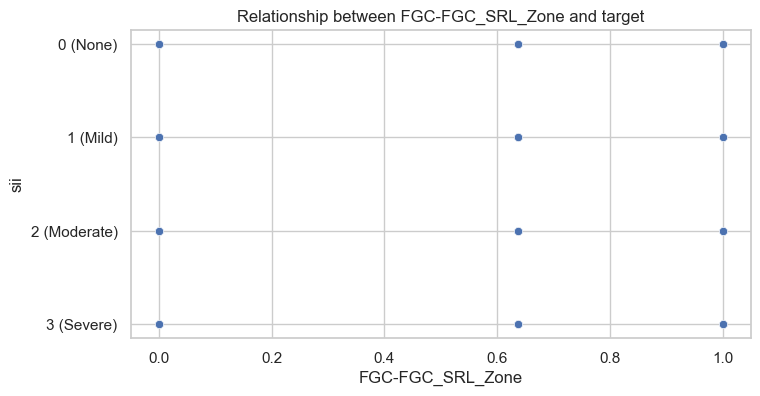

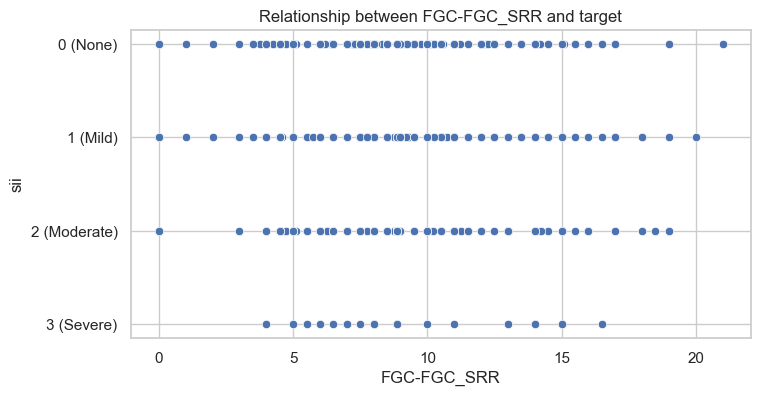

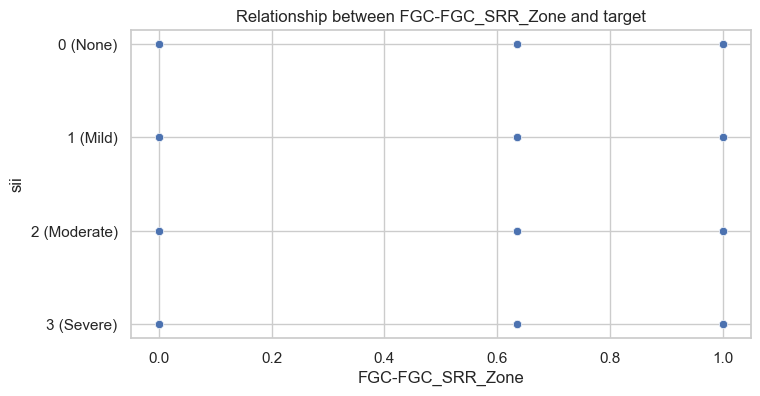

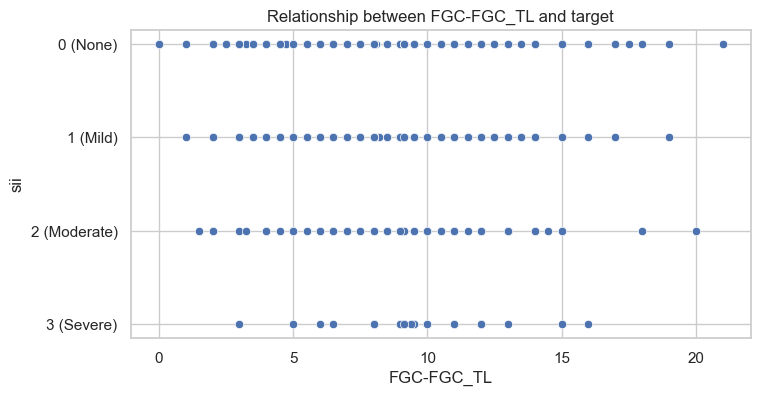

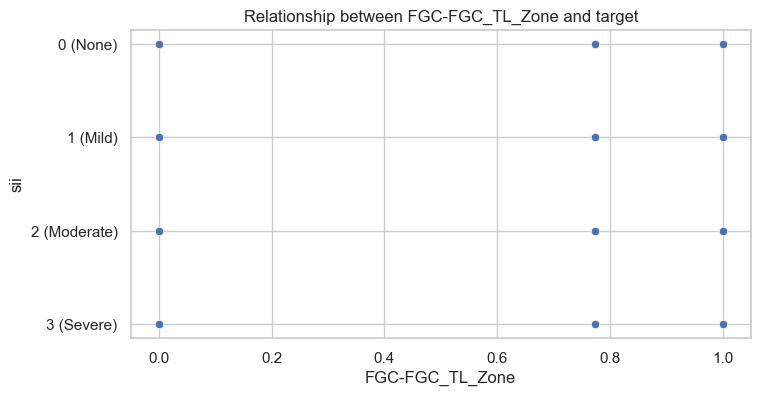

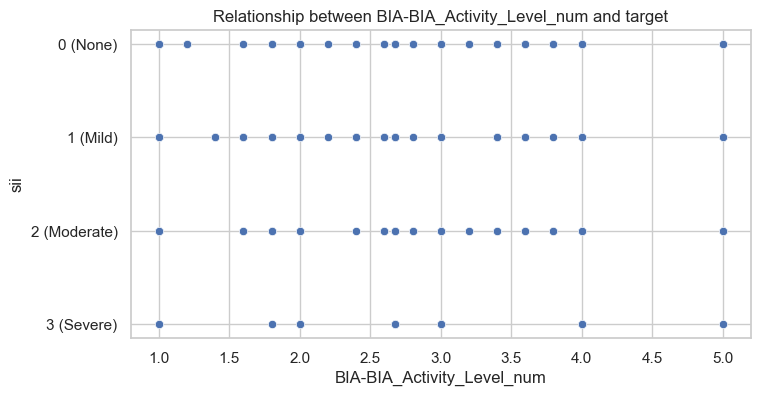

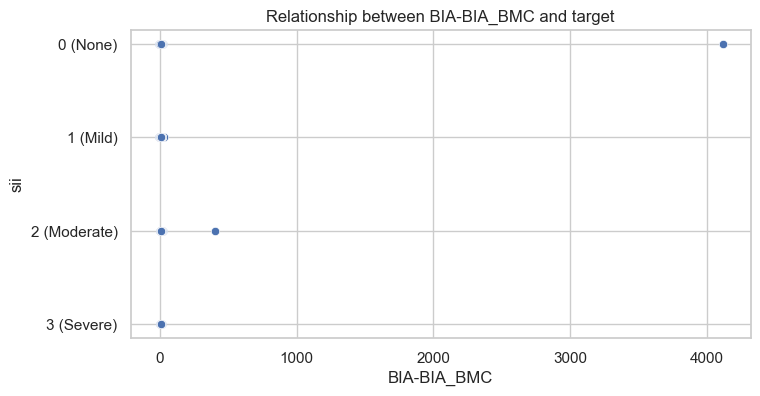

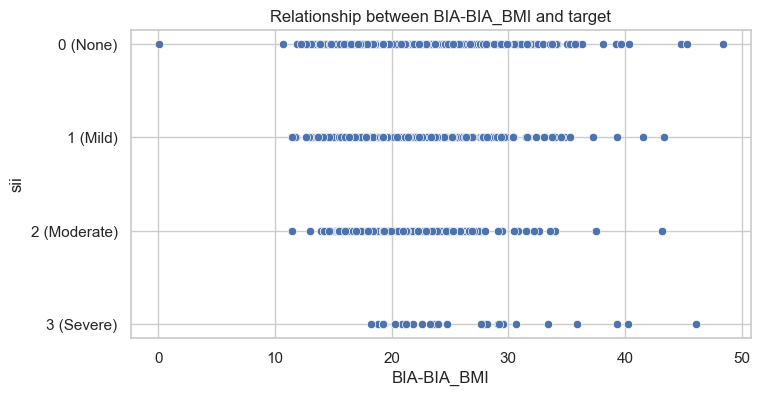

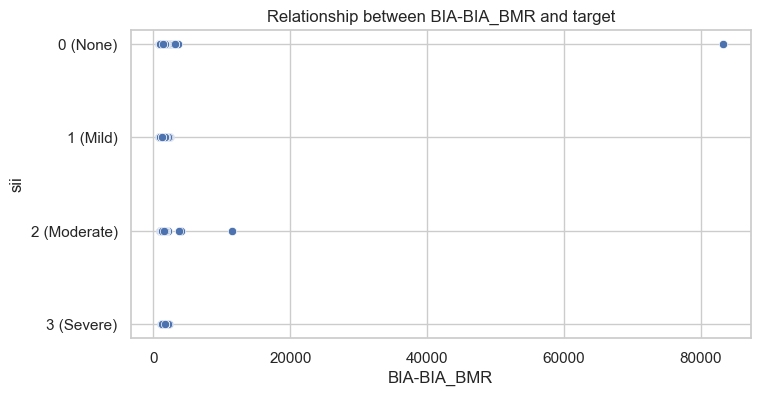

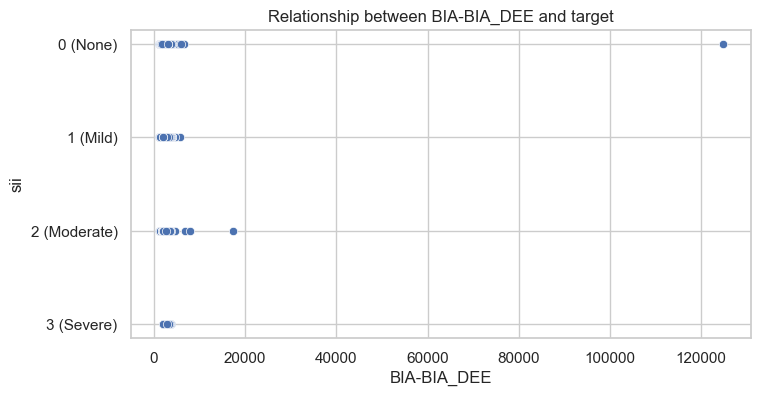

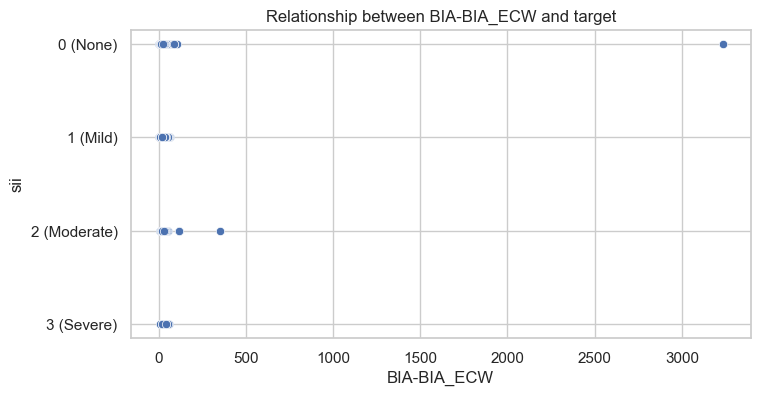

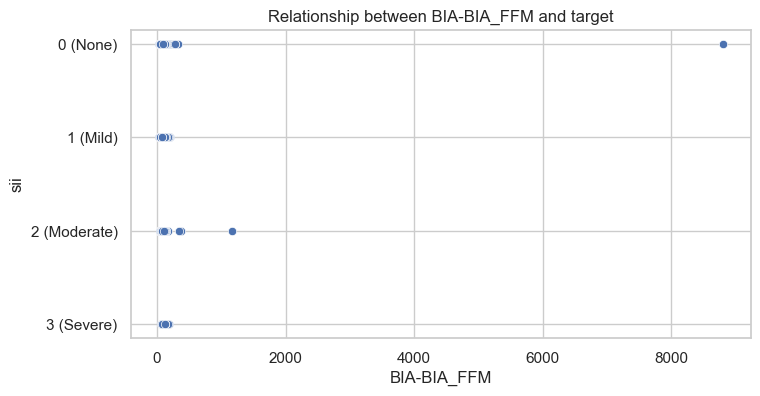

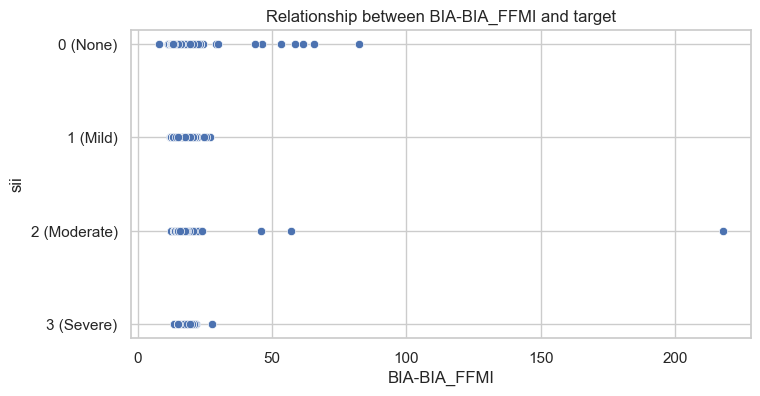

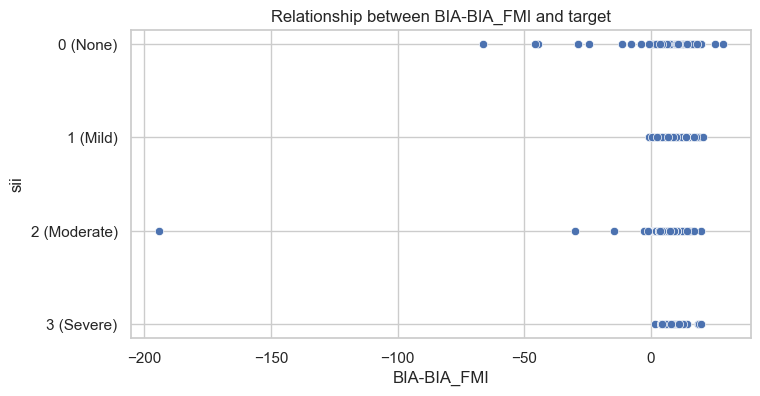

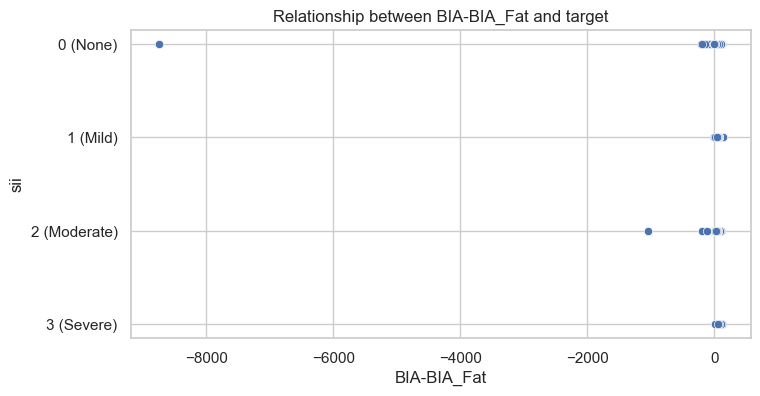

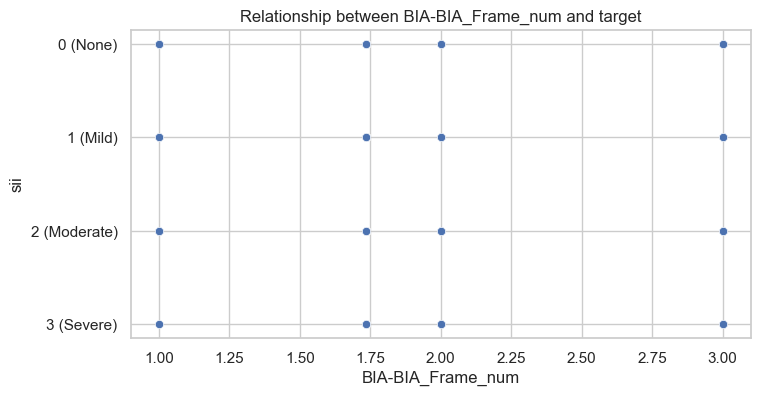

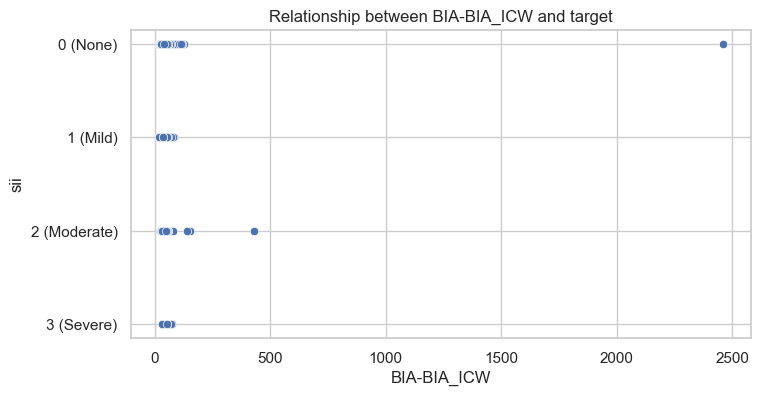

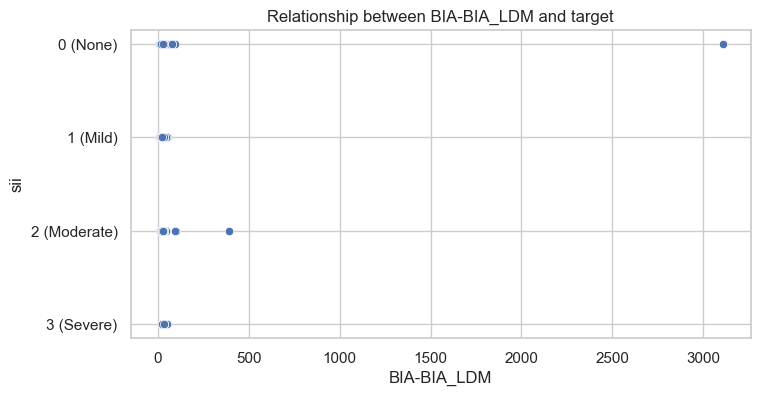

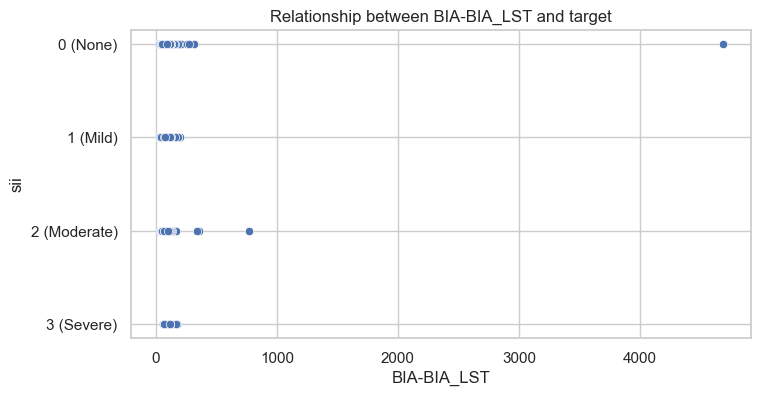

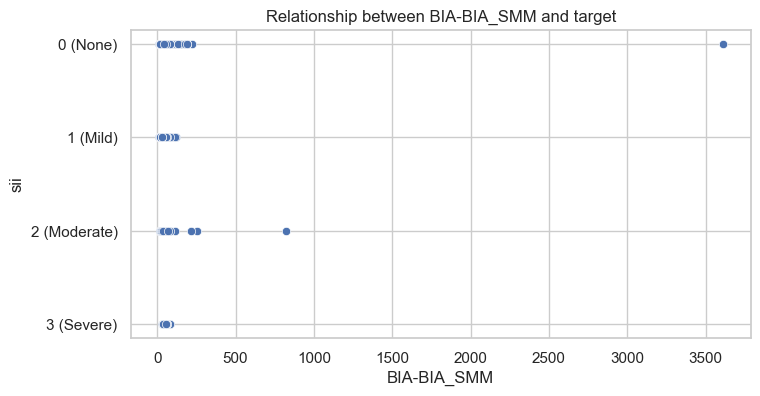

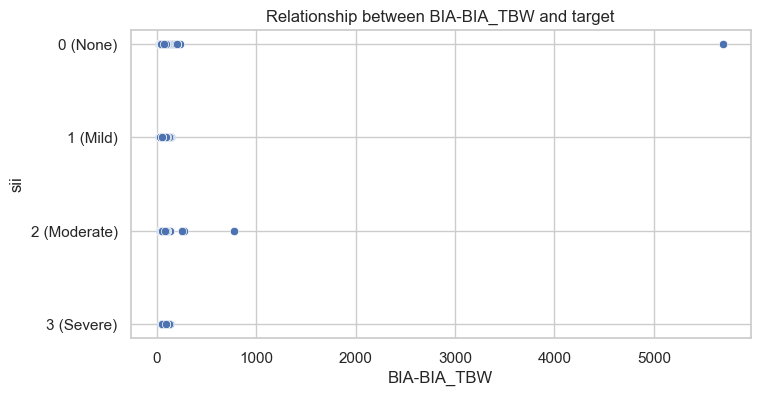

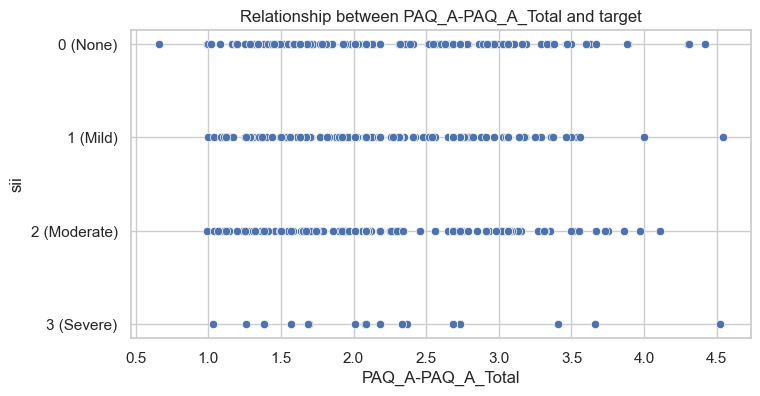

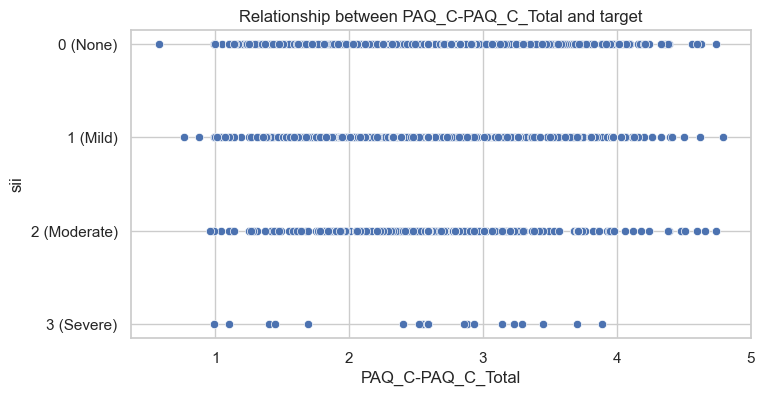

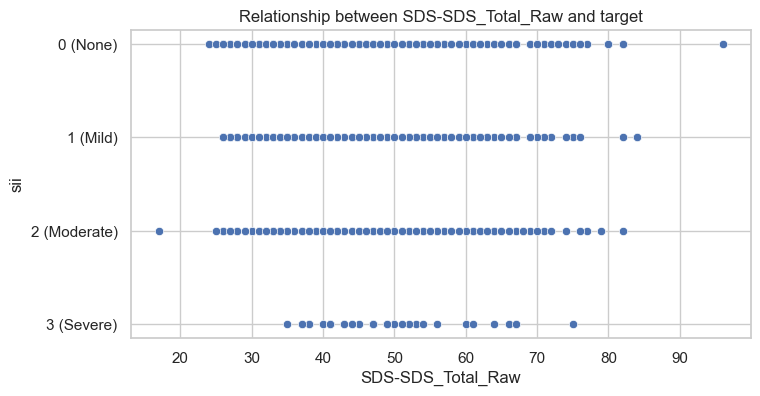

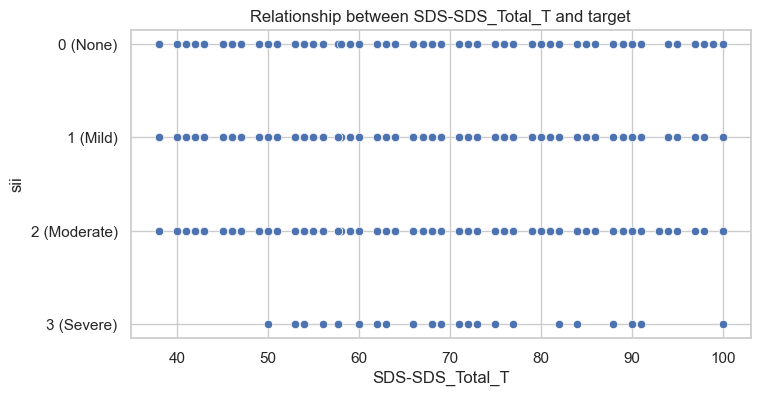

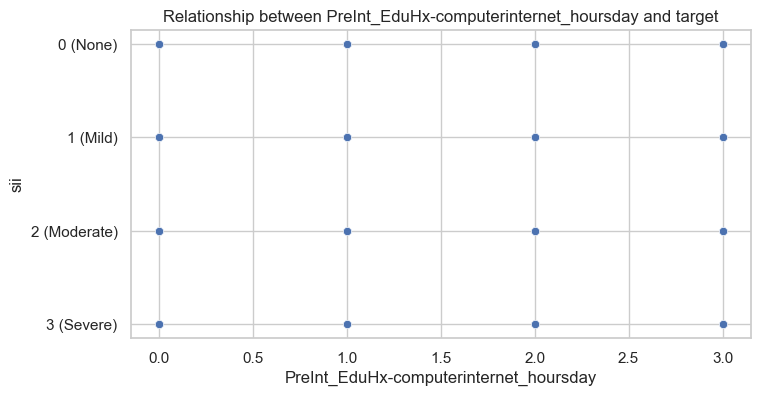

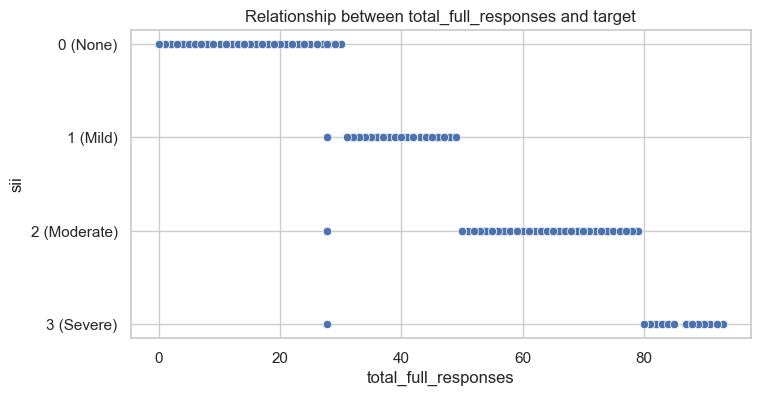

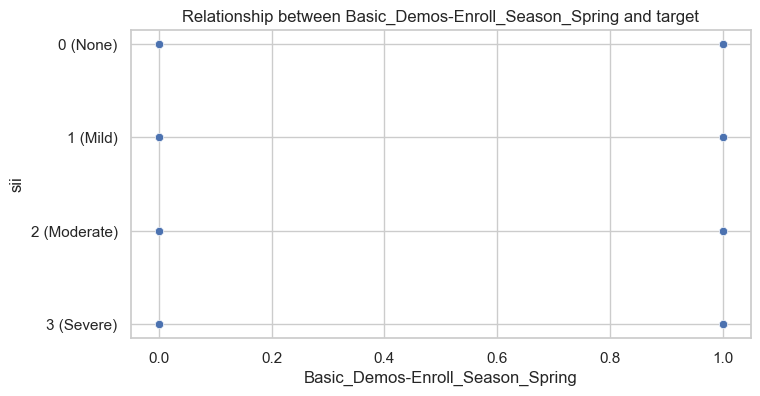

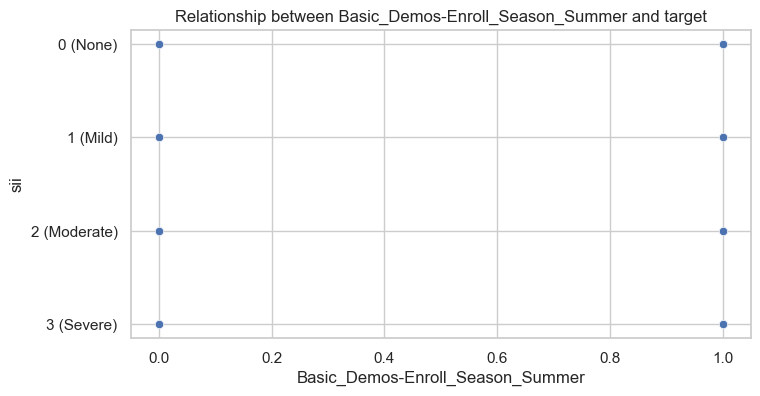

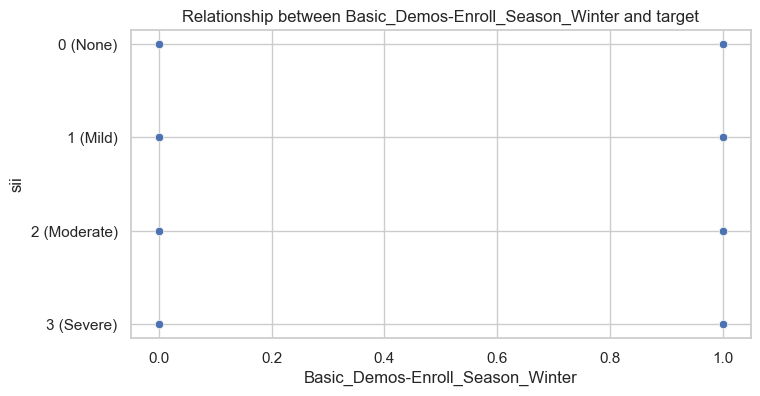

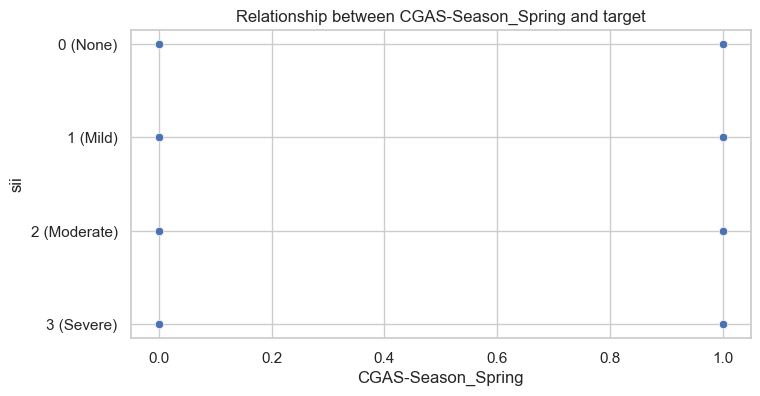

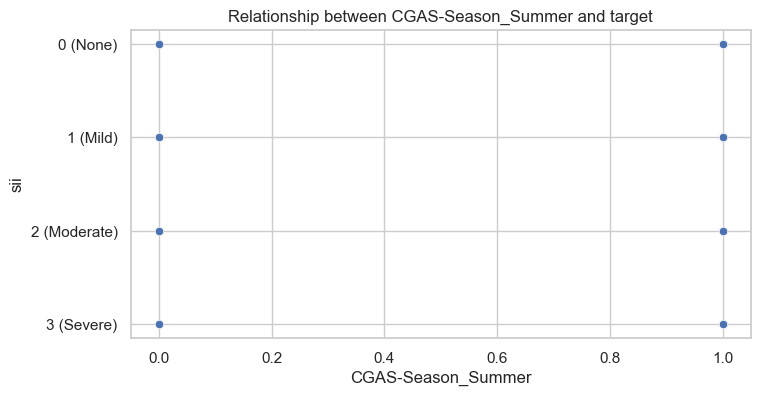

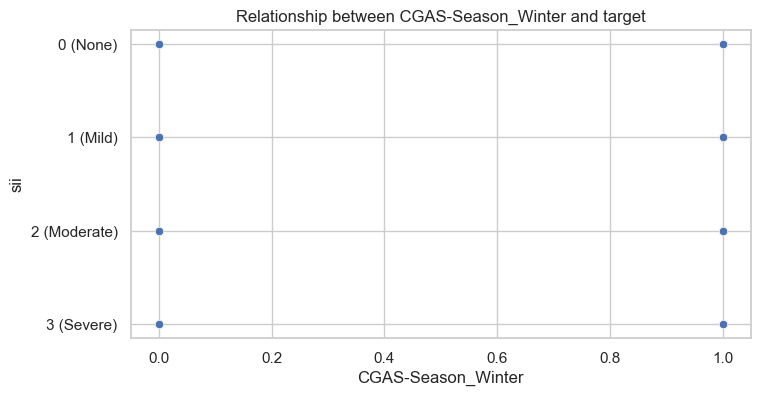

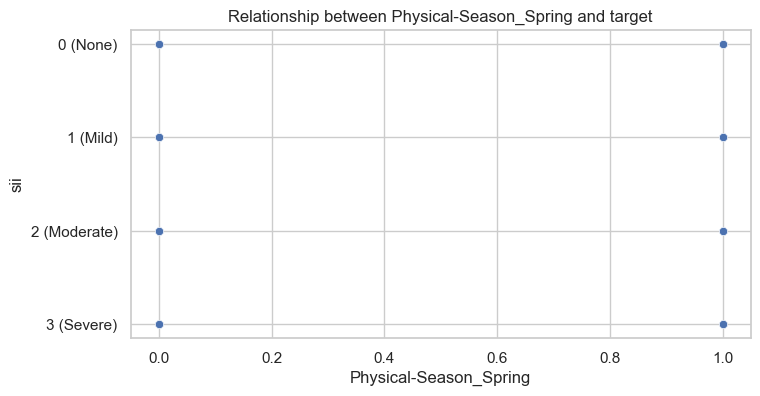

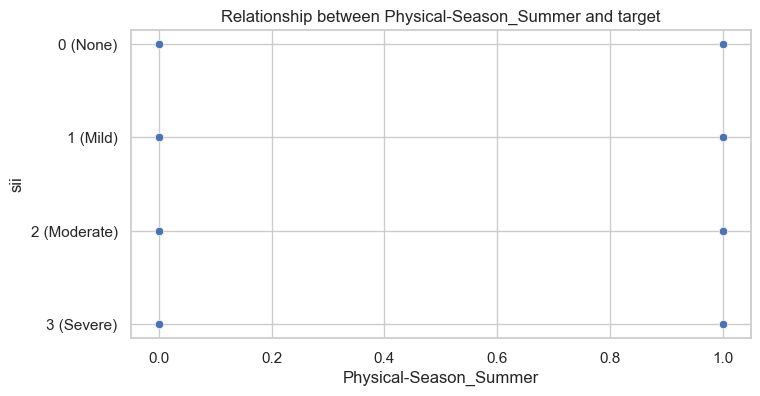

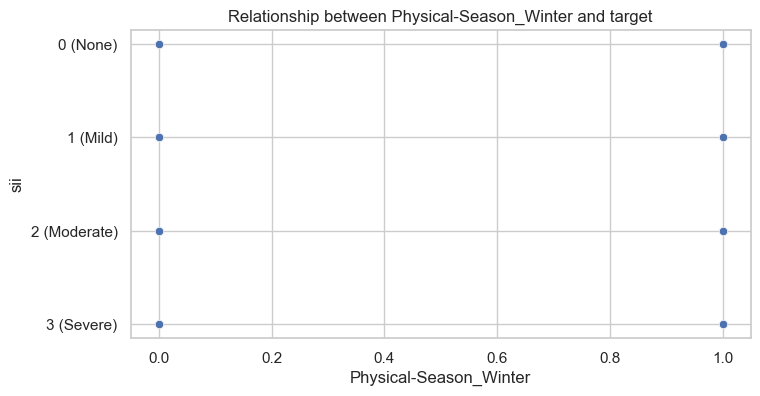

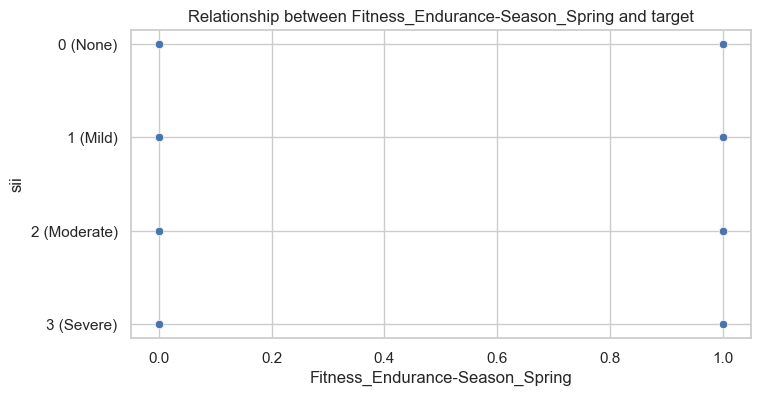

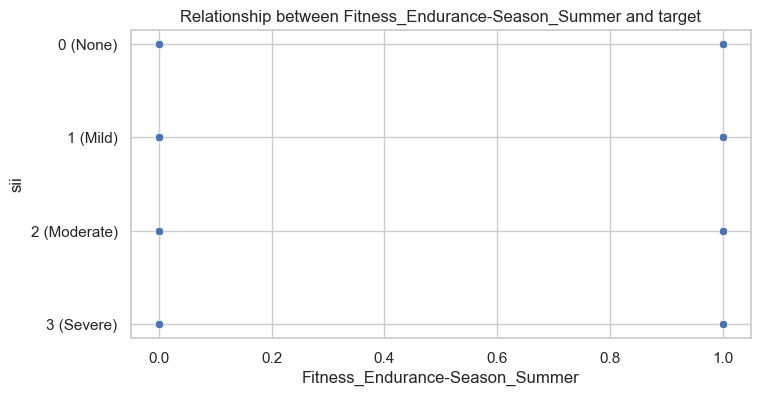

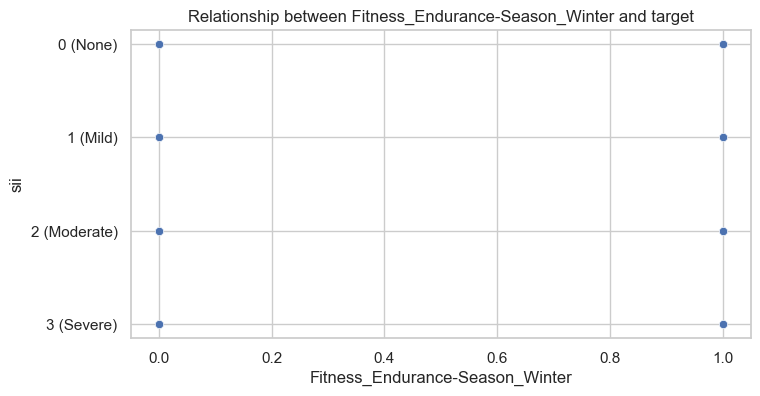

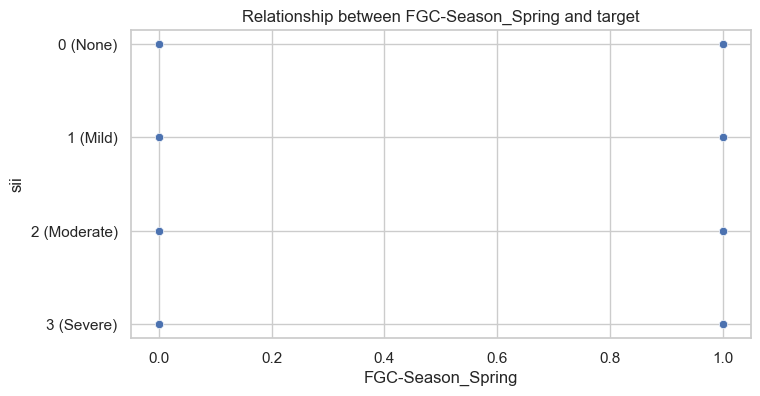

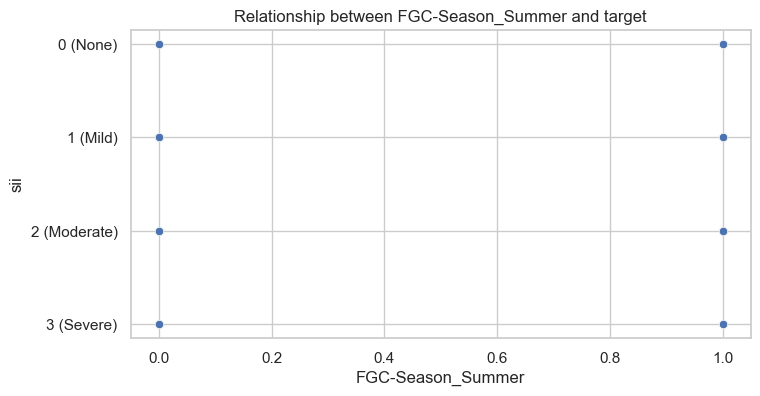

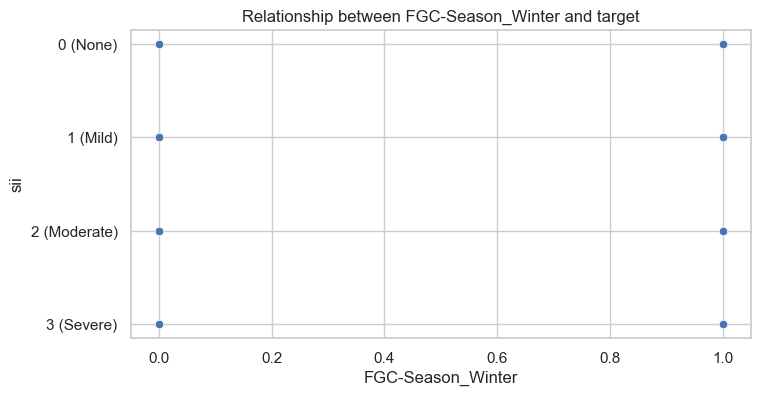

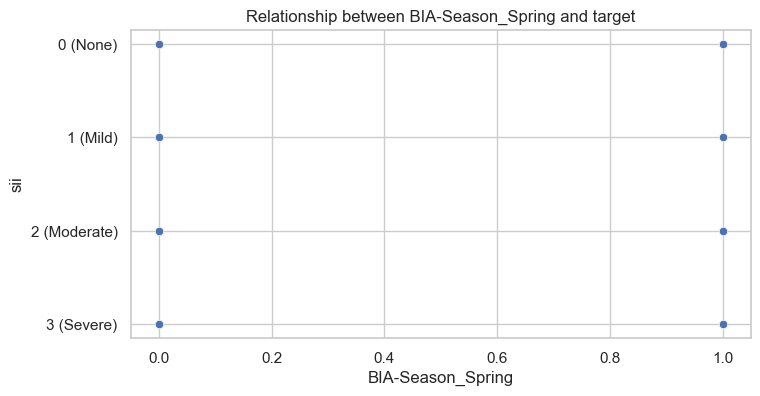

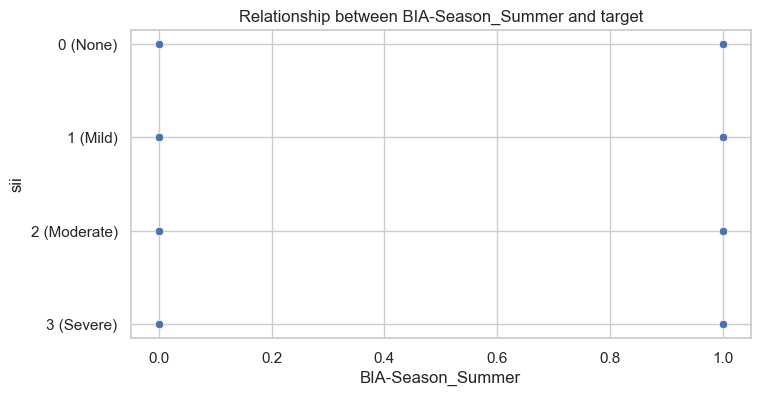

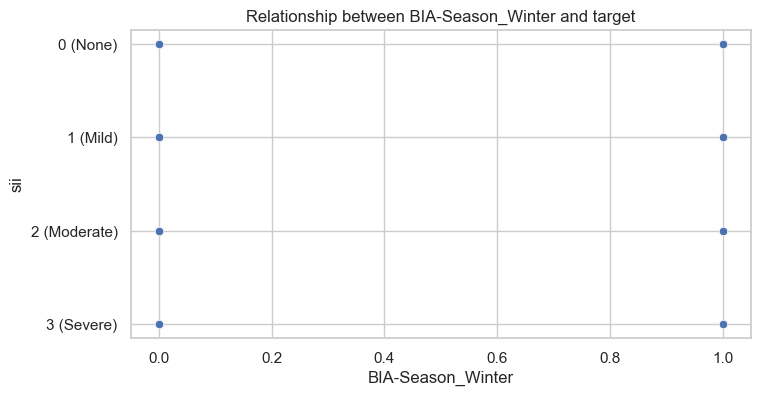

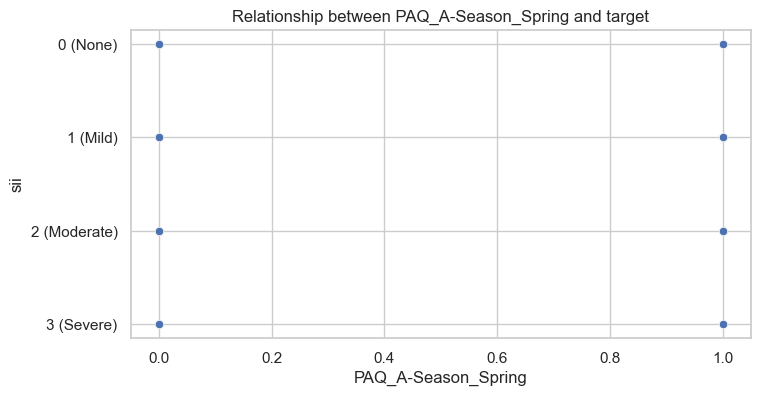

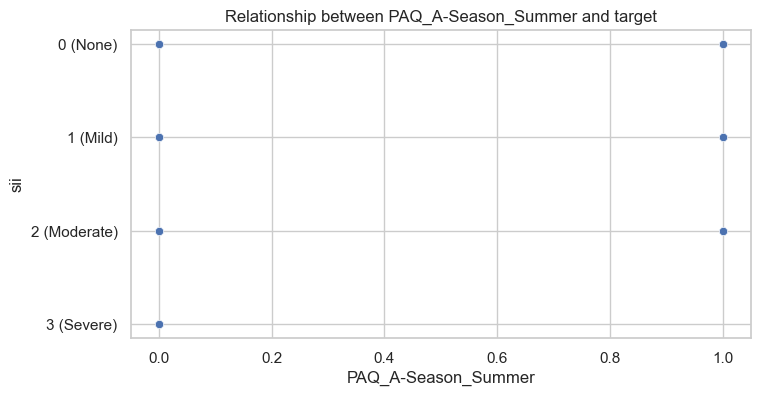

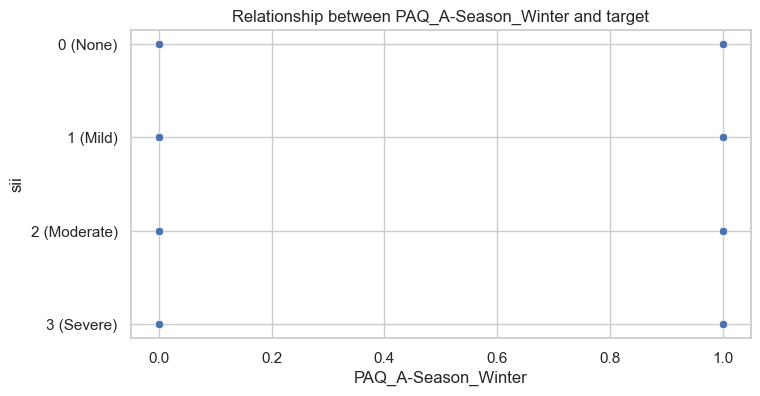

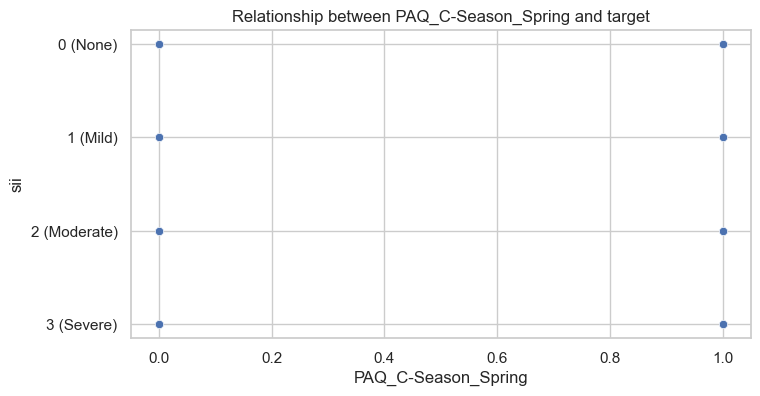

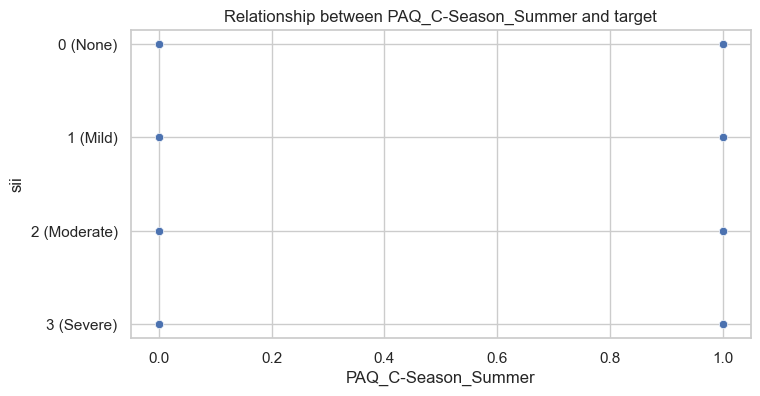

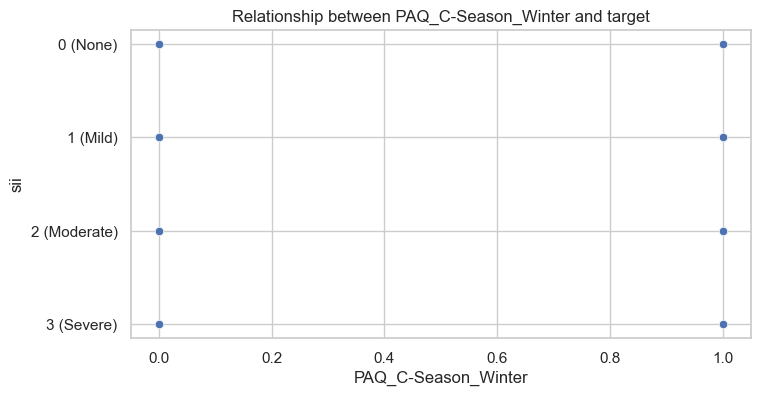

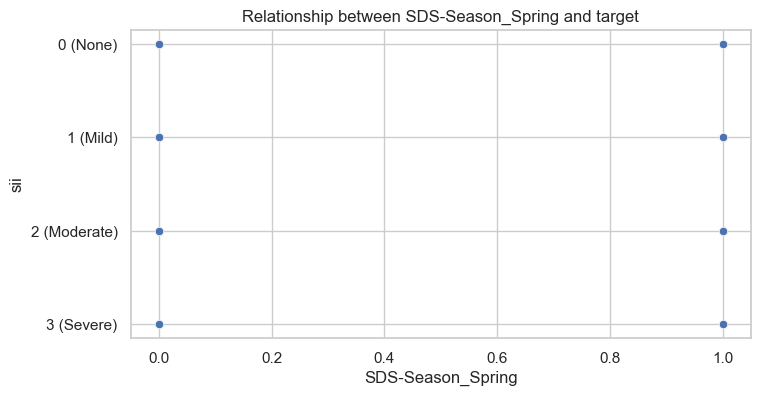

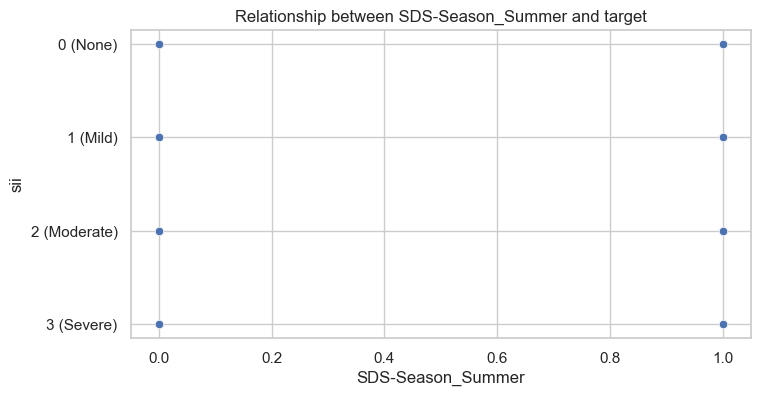

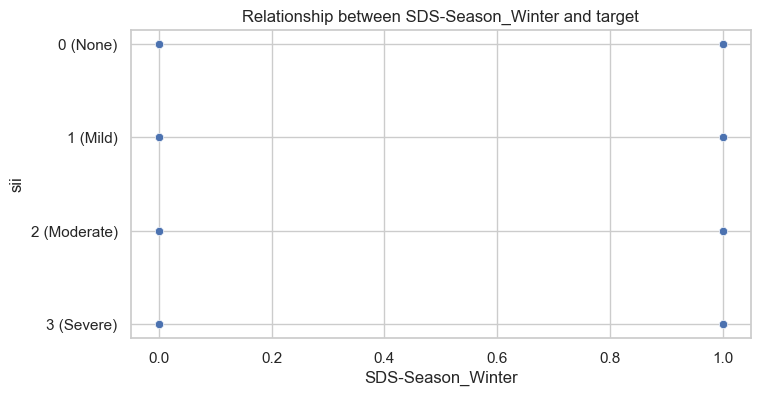

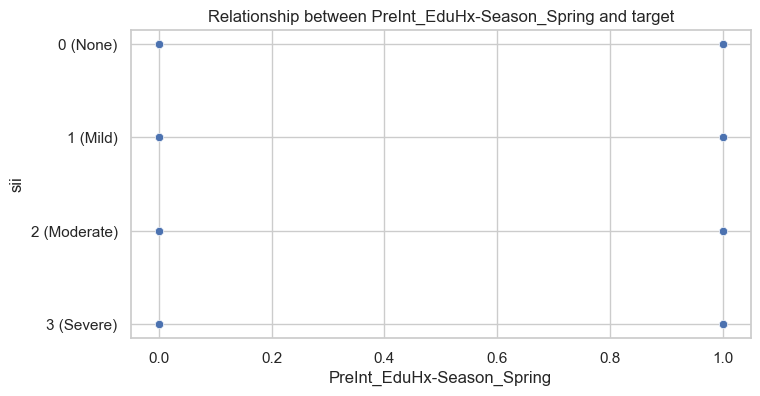

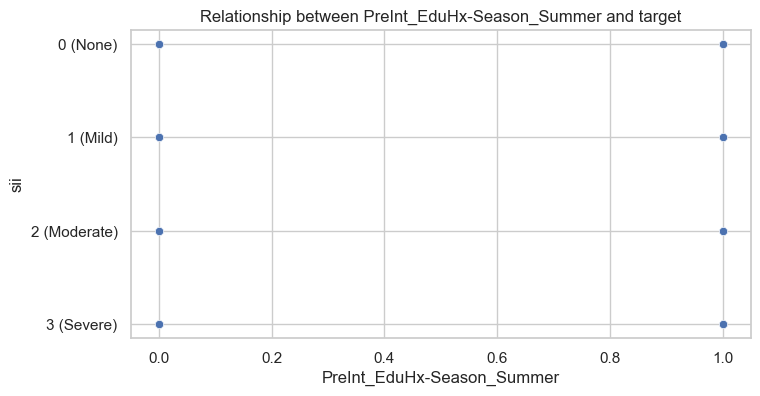

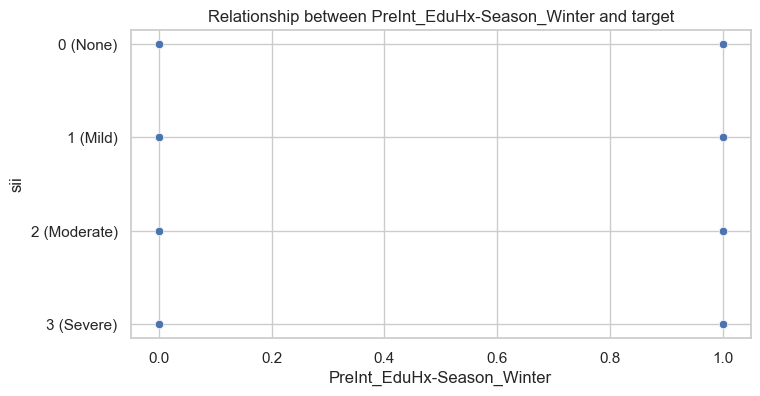

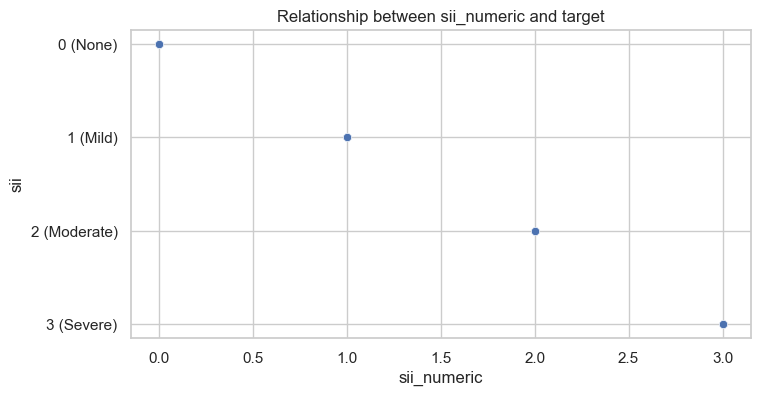

In [ ]:
if 'sii' in train_data.columns:
    for col in train_data.columns:
        if col != 'sii':
            plt.figure(figsize=(8, 4))
            if train_data[col].dtype == 'object':
                sns.boxplot(data=train_data, x=col, y='sii')
            else:
                sns.scatterplot(data=train_data, x=col, y='sii')
            plt.title(f"Relationship between {col} and target")
            plt.show()

## Final Data Prep and Model Training

In [ ]:
from sklearn.model_selection import train_test_split

target = 'sii_numeric'

# I think this was just to check the numeric stuff prior to training but to check with Harsha
# selected_features = [
#     'Basic_Demos-Age', 'Physical-Height',
#     'PreInt_EduHx-computerinternet_hoursday', 'Physical-Weight',
#     'SDS-SDS_Total_T', 'SDS-SDS_Total_Raw', 'Physical-BMI', 'FGC-FGC_CU'
# ]
selected_features = train_data.columns.difference(['total_full_responses', 'sii_numeric', 'sii'])

X = train_data[selected_features]
y = train_data[target]


# We only use the true test set for final evaluation to ensure no data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing data prepared.")

Training and testing data prepared.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)

rf_model.fit(X_train, y_train)

print("Random Forest model trained.")

Random Forest model trained.


Model Evaluation:
Accuracy Score: 0.6029411764705882

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       314
           1       0.36      0.27      0.31       136
           2       0.53      0.10      0.17        89
           3       0.00      0.00      0.00         5

    accuracy                           0.60       544
   macro avg       0.39      0.32      0.31       544
weighted avg       0.56      0.60      0.55       544



/opt/anaconda3/envs/ml_final_project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ml_final_project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ml_final_project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

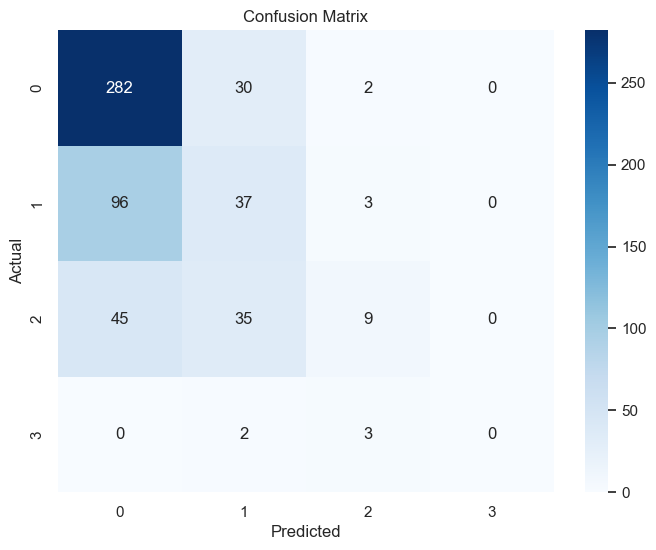

In [ ]:
y_pred = rf_model.predict(X_test)

print("Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# To do -> pull in balanced accuracy potentially for our final table


Feature Importance:
                Feature  Importance
70      SDS-SDS_Total_T    0.042632
69    SDS-SDS_Total_Raw    0.041343
59      Physical-Height    0.039833
64      Physical-Weight    0.039482
19      Basic_Demos-Age    0.038953
..                  ...         ...
16    BIA-Season_Spring    0.002433
18    BIA-Season_Winter    0.002143
50  PAQ_A-Season_Summer    0.002110
51  PAQ_A-Season_Winter    0.001670
49  PAQ_A-Season_Spring    0.001595

[74 rows x 2 columns]


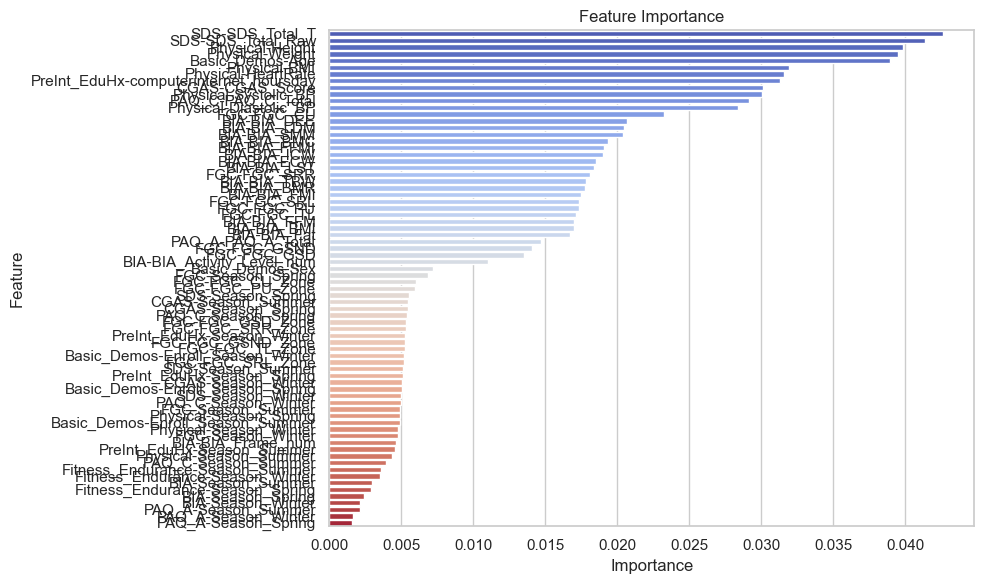

In [ ]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette="coolwarm")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()